# Proyecto: Análisis de mercado inmobiliario

## Proyecto 2

## Ingeniería de features, Modelos avanzados e Interpretación de modelos




##### RESULTADOS proyecto 1:

En el proyecto anterior, se plantearon 3 alternativas para la predicción del precio de un inmueble, según el dataset propuesto. El modelo Bechmark de regreción lineal, se comparó con dos modelos uno el de árbol de decisión y otro de KNN vecinos.

A continuación se resumen los resultados obtenidos, según la metrica RMSE que utilizamos para evaluar los modelos entre sí .

* **Modelo Regresión lineal** **Tenes que actualizar los valores del primer test y despues le agregas abajo las mejoras que hiciste y los resultados finales.
    - Hiperparámetro optimizado: Max Depth.
    - Max Depth seleccionado: 17.
    - RMSE en test: **148943.64**.
    - Dataset utilizado: Dataset original con filtros solicitados (sin tener en cuenta el analisis de los datos).

* **Modelo Árbol de Decisión**  
    * Metología de estimación: Árbol de Decisión.
    * Hiperparámetro optimizado: Max Depth.
    * Max Depth seleccionado: 17.
    * RMSE en test: **148943.64**.
    * Dataset utilizado: Dataset original con filtros solicitados (sin tener en cuenta el analisis de los datos).


* **Modelo KNN vecinos** 
    * Metología de estimación: Árbol de Decisión.
    * Hiperparámetro optimizado: Max Depth.
    * Max Depth seleccionado: 36.
    * RMSE en test: **41675.33**.
    * Dataset utilizado: Dataset resultante del analisis de los datos (eliminando outliers extra de lo solicitado).
    
Luego del cursado del segundo bloque de la carrera, noté las mejoras que pueden realizarse al proyecto implicado, entre los cuales se destaca:
* Imputar los valores faltantes en lugar de limpiarlos, metologias para estimar: knn, promedio condicionado (ej precio promedio por barrio/ tamaño dpto por promedio barrial, etc.), moda, media.
* Agregar una Dummy para notarle al modelo cuales son las instancias con valores faltantes y realizar análsis sobre estos missing.
* Generar un Cross-validation y realizar un Random Search sobre los hiperparámetros óptimos.
* Transformar las variables para que tengan distribucion individual normal.
* Aplicar otros modelos de regresion: regresion lineal polinomica y regularización.

Mejoras que intentaré aplicar a dicho modelo, para **mejorar mi estimación con un RMSE = 41675.33**

#### Consigna Proyecto 2: 
   * En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo de Machine Learning”). El objetivo es aplicar las técnicas incorporadas (Transformación de Datos, Optimización de Hiperparámetros, Modelos Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el modelo generado en el proyecto anterior. Luego, interpreta ese modelo para responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema estudiando el modelo que generamos?

El trabajo se organiza en tres partes:

##### PARTE A - Transformación de Datos

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa:

1. Detección y eliminación de Outliers
1. Encoding
1. Imputación de valores faltantes
1. Escalado de datos
1. Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).
1. Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

##### PARTE B - Modelos Avanzados

1. Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.
1. Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.
1. Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

##### PARTE C - Interpretación de modelos

De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

1. ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?
1. ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

#####  DESAFÍO OPCIONAL

Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

# PARTE A - Transformación de Datos

1. Conociendo los datos a trabajar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
#from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import scipy as sp
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

1. Cargo el dataset usando las funcionalidades de Pandas.

In [2]:
# Carga el dataset usando las funcionalidades de Pandas.
df = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")

In [3]:
# Imprimir cuántas filas y columnas tiene
df.shape

(146660, 19)

In [4]:
# y sus cinco primeras instancias
df.head()

start_date    end_date  created_on        lat        lon         l1  \
0  2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   
1  2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   
2  2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   
3  2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   
4  2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   

                       l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price currency  \
0          140.0            140.0  153000.0      USD   
1           70.0             58.0  159000.0      USD   
2           45.0             45.0  125000.0      USD   
3           85.0             50.0  295000.0      USD   
4           50.0             35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

2. **Valores Faltantes**: cuántos valores faltantes hay por columna.

In [5]:
#cuántos valores faltantes hay por columna.
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?

In [7]:
# ¿Cuántos tipos de propiedad hay publicados según este dataset?
cant_tipos_propiedad = len(df["property_type"].unique())
print("La cantidad de tipos de propiedad es igual a", cant_tipos_propiedad)

La cantidad de tipos de propiedad es igual a 10


In [8]:
# ¿Cuántos instancias por cada tipo de propiedad hay en el dataset?
df["property_type"].value_counts()

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

NameError: name 'chart' is not defined

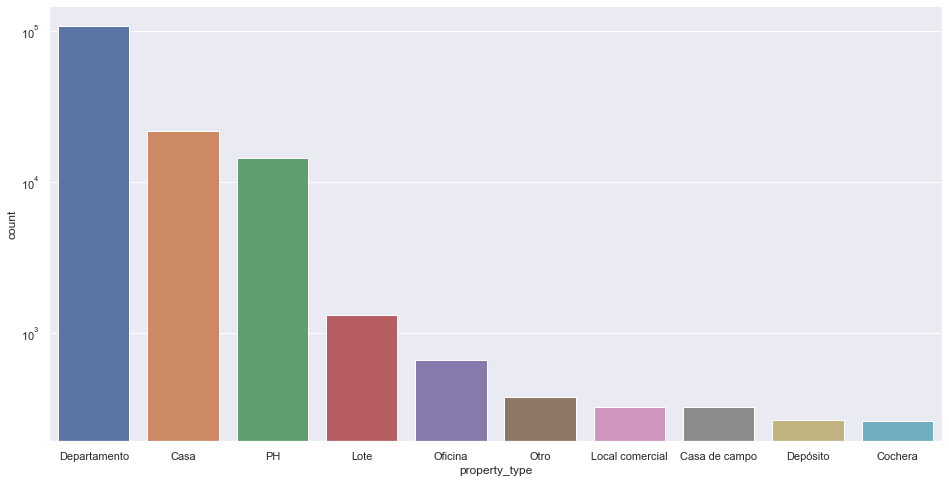

In [9]:
# Un gráfico apropiado de Seaborn.
fig, ax = plt.subplots(figsize=(16,8))
tipo_de_propiedades= sns.countplot(x="property_type", 
                     data = df, 
                     order = df["property_type"].value_counts().index,
                     log=True,
                     ax=ax)

tipo_de_propiedades.set_xticklabels(chart.get_xticklabels(), 
                      rotation = 45, 
                      horizontalalignment = 'right',
                      fontsize = 'medium')

plt.title("Tipo de Propiedades", size=22)

Cómo se observa Departamento, Casas y PH; tienen más valores en la muestra. Y son los tipos de propiedades, donde se debe poner el foco.

4. ¿De qué regiones son las publicaciones?

C:\Users\User\miniconda3\envs\datascience\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: There are no gridspecs with layoutboxes. Possibly did not call parent GridSpec with the figure= keyword
  fig.canvas.print_figure(bytes_io, **kw)


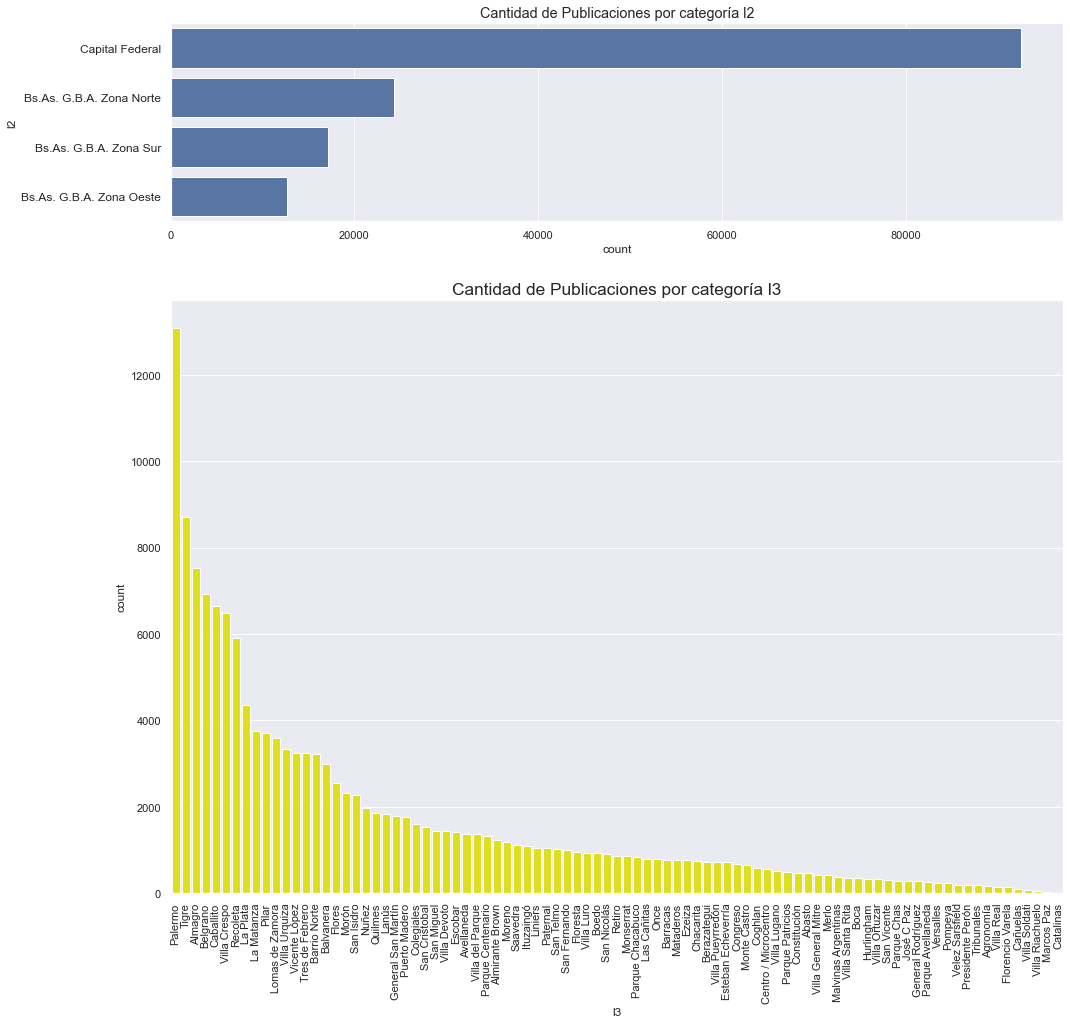

In [10]:
fig = plt.subplots(figsize=(16, 16), constrained_layout=True)
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax1 = plt.subplot(gs[0])
sns.countplot(y= "l2", data= df, order= df["l2"].value_counts().index, color= "b", ax= ax1)
ax1.set_yticklabels(ax1.get_yticklabels(), fontsize= 'medium')
ax1.set_title("Cantidad de Publicaciones por categoría l2", fontsize= 'large')

ax2 = plt.subplot(gs[1])
sns.countplot(x= "l3", data= df, order= df["l3"].value_counts().index, color= "yellow", ax= ax2)
ax2.set_title("Cantidad de Publicaciones por categoría l3", fontsize= 'x-large')
plt.xticks(rotation= 90, fontsize= 11, horizontalalignment= 'center')

plt.show()

In [11]:
df = df[((df['property_type'] == "Departamento") | 
                 (df['property_type'] == "Casa") |
                 (df['property_type'] == "PH"))]             
df.shape

(143145, 19)

#### Eliminar Columnas innecesarias
Voy a eliminar las columnas que considero no son variables representativas a la hora de predecir el precio. Còmo región l1, ya que sabemos que es una muestra de Argentina, la moneda (currency) es el dólares para toa la muestra, end_date, star_date y crated_on, no considero sea un dato que influya en los precios. Tipo de operación, sabemos que son todas ventas no tiene sentido conservar esa columna. Y como no voy a realizar análisis de tesxto, elimino description y titlle.

In [19]:
df = df.drop(columns=["l1","end_date", "start_date","created_on", "currency", "description", "operation_type", "title"])


KeyError: "['l1' 'end_date' 'start_date' 'created_on' 'currency' 'description'\n 'operation_type' 'title'] not found in axis"

#### Expresamos el porcentaje de valores nulos para cada columna.

In [13]:
for col in df.columns:
  nulos = df[col].isna().sum()
  print(col,  "{:.2f}%".format(nulos*100/143145))

lat 6.70%
lon 6.72%
l2 0.00%
l3 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 2.94%
surface_total 13.01%
surface_covered 13.21%
price 0.00%
property_type 0.00%


#### Renombramos las columnas

In [18]:
df.rename({"l2": "Ciudad","l3": "Barrio", "l4"}, axis=1, inplace=True)

SyntaxError: invalid syntax (<ipython-input-18-0eaa099859e7>, line 1)

**Distribuciones individuales:**

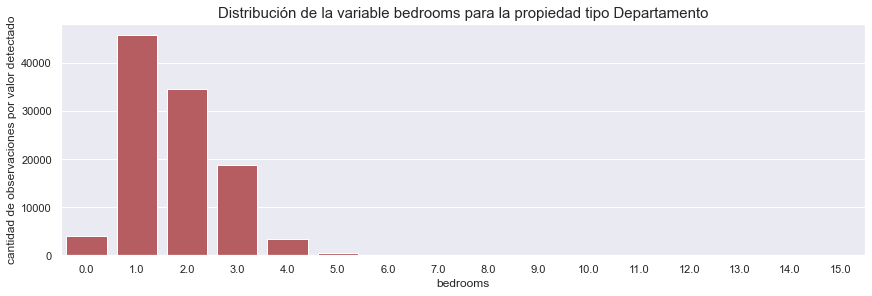

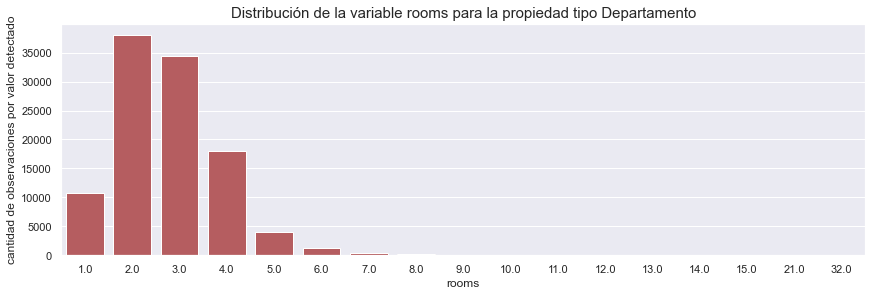

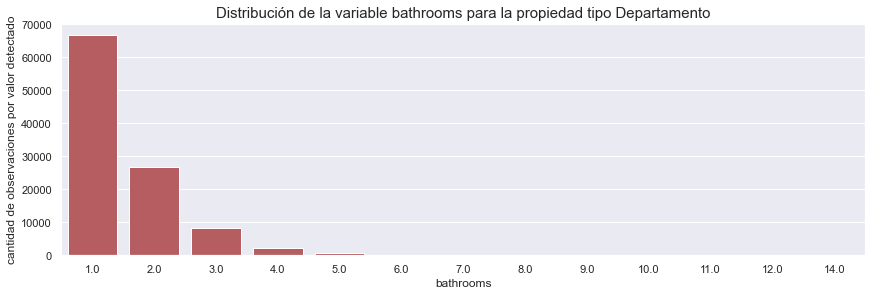

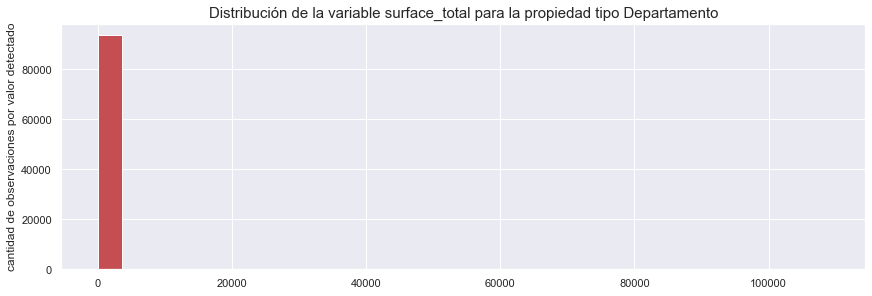

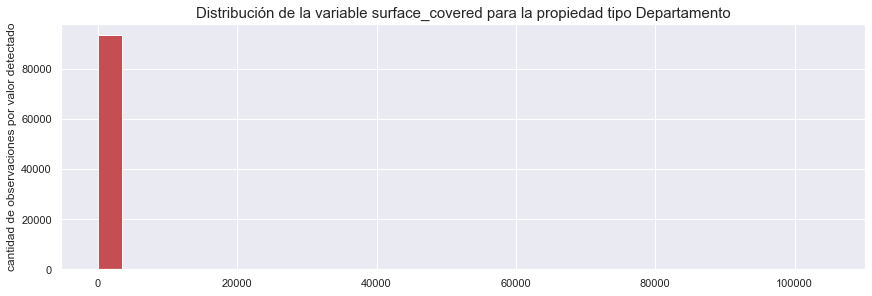

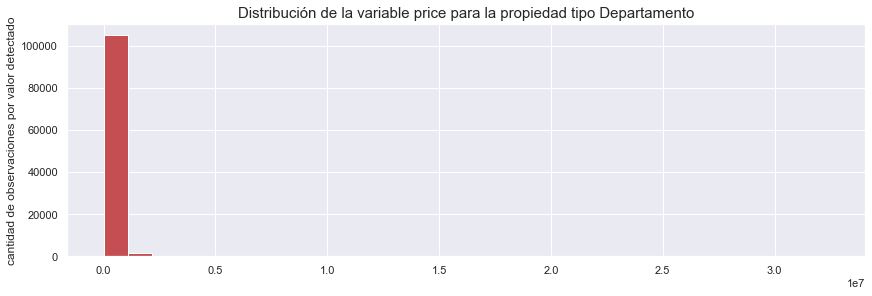

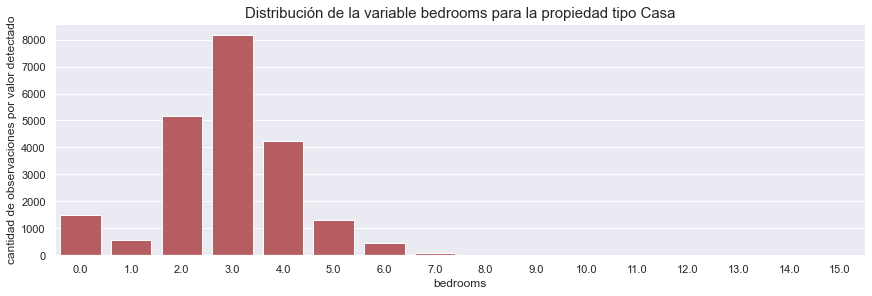

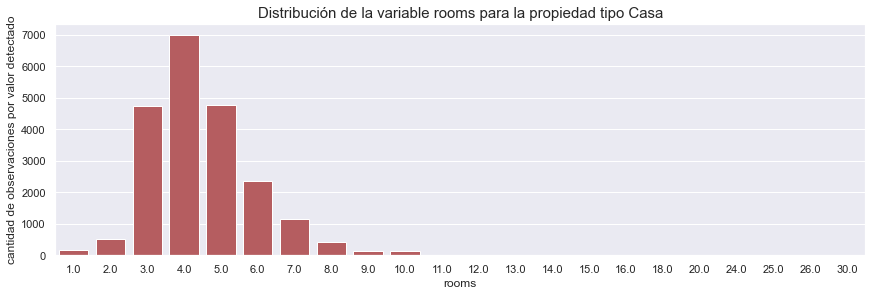

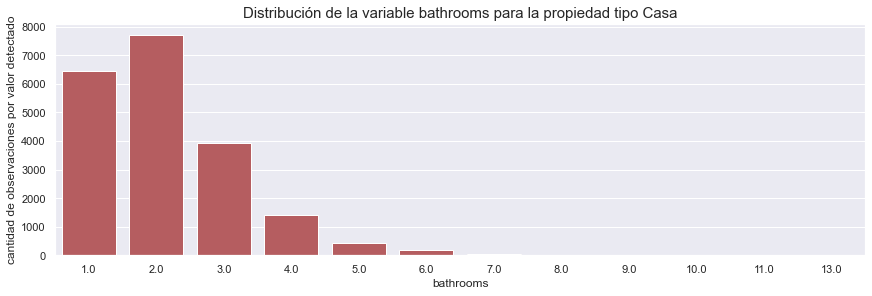

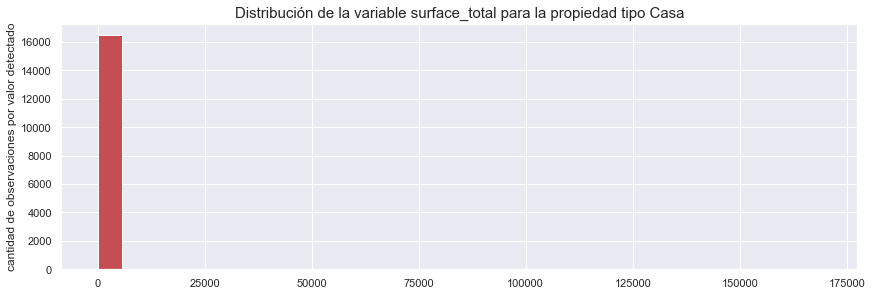

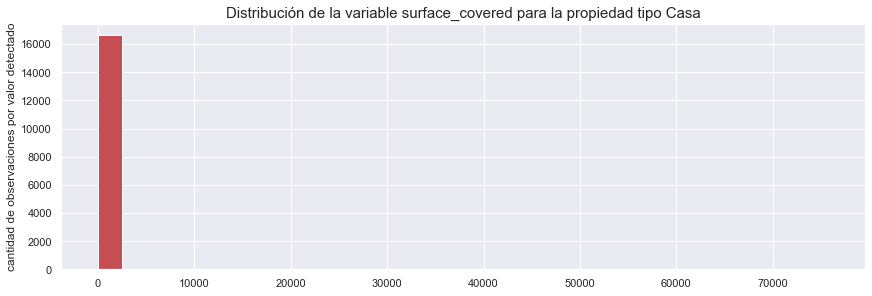

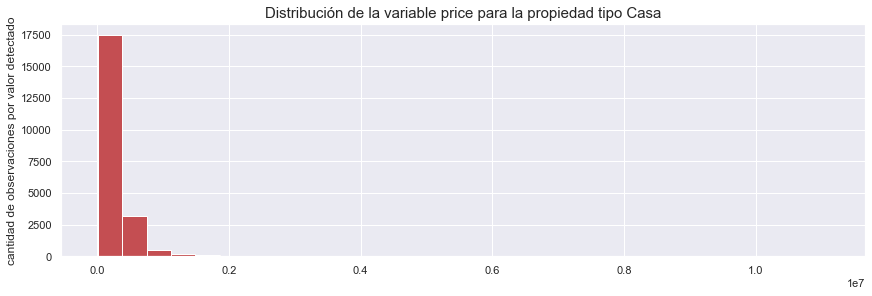

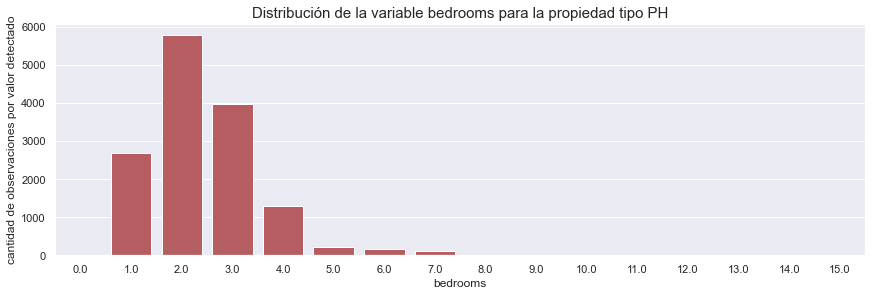

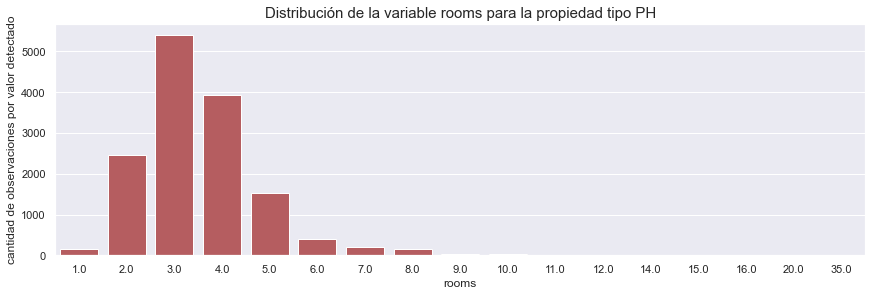

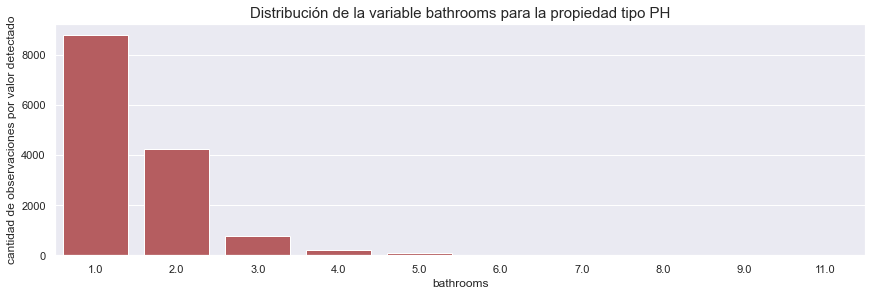

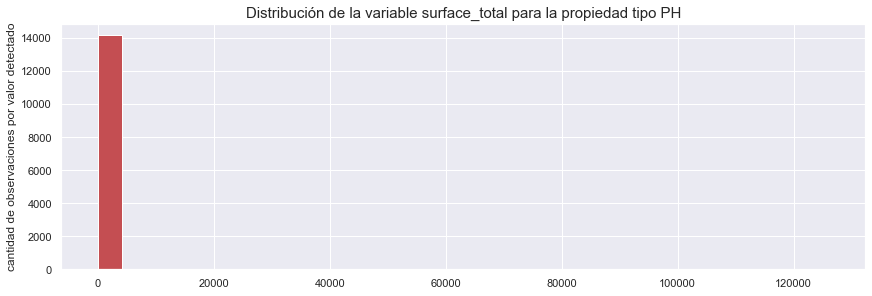

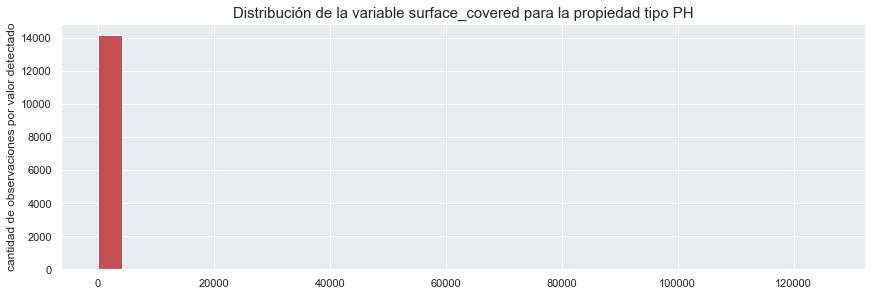

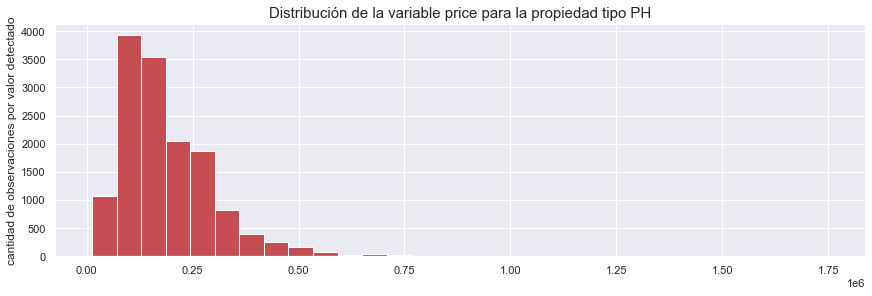

In [14]:
lista2 = ["Departamento", "Casa", "PH"]

for (k) in (lista2):
    for i in ["bedrooms", "rooms", "bathrooms"]:
        fig, ax1 = plt.subplots(1, 1, figsize=(12,4), constrained_layout=True)

        sns.countplot(dataset[dataset["property_type"]==k][i],  color="r", ax=ax1)
        ax1.set_ylabel('cantidad de observaciones por valor detectado')
        ax1.set_title(f"Distribución de la variable {i} para la propiedad tipo {k}", fontdict={"fontsize":15})

        plt.show()

    for i in ["surface_total", "surface_covered", "price"]:
        fig, ax1 = plt.subplots(1, 1, figsize=(12,4), constrained_layout=True)

        ax1.hist(dataset[dataset["property_type"]==k][i], color="r", bins = 30)
        ax1.set_ylabel('cantidad de observaciones por valor detectado')
        ax1.set_title(f"Distribución de la variable {i} para la propiedad tipo {k}", fontdict={"fontsize":15})

        plt.show()

Genero un pairplot para analizar la **distribución de cada variable individualmente**, los cuales se ubican en la **diagonal principal** de la matriz de gráficos. 

Mientras que **fuera de esta**, podremos observar las relaciones entre las variables una a una, es decir, su **distribución conjunta**.

<Figure size 864x864 with 0 Axes>

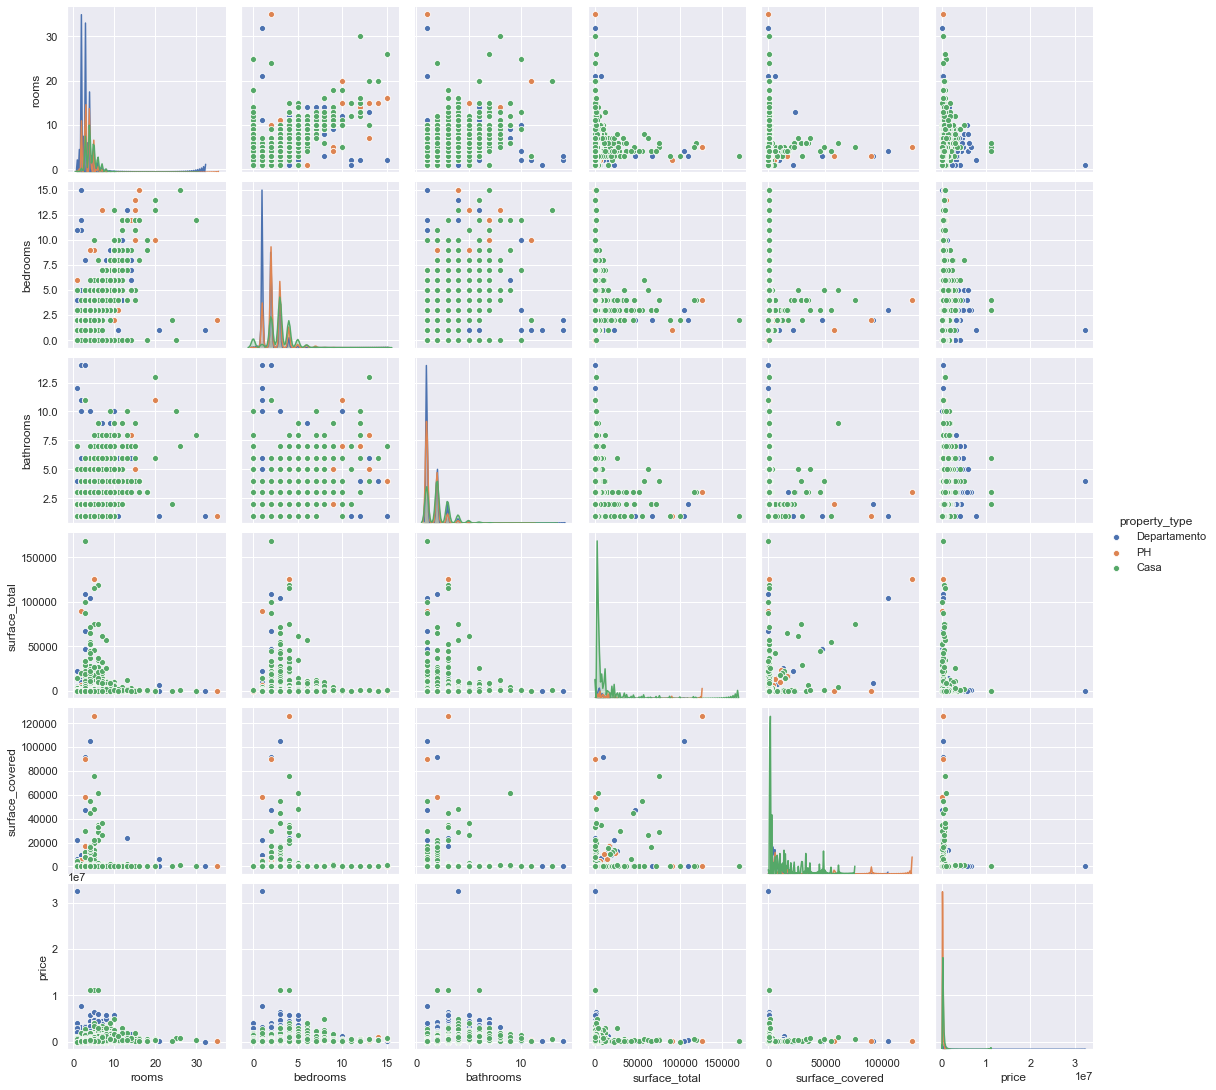

In [15]:
fig = plt.figure(figsize=(12,12))

columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price", "property_type"]
sns.pairplot(dataset[columns], hue="property_type")

plt.show()

Obtengo estadísticos que me sirvan para tener una primera idea de los valores que abarcan estas variables.

In [16]:
columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price"]
dataset[columns].describe()

rooms       bedrooms      bathrooms  surface_total  \
count  143145.000000  143145.000000  138934.000000  124522.000000   
mean        3.096140       1.999490       1.597715     182.381089   
std         1.393088       1.129123       0.885980    1436.708405   
min         1.000000       0.000000       1.000000      10.000000   
25%         2.000000       1.000000       1.000000      52.000000   
50%         3.000000       2.000000       1.000000      78.000000   
75%         4.000000       3.000000       2.000000     138.000000   
max        35.000000      15.000000      14.000000  169000.000000   

       surface_covered         price  
count    124236.000000  1.431450e+05  
mean        112.374159  2.378184e+05  
std         919.025616  2.881004e+05  
min           1.000000  6.000000e+03  
25%          47.000000  1.120000e+05  
50%          68.000000  1.660000e+05  
75%         108.000000  2.644650e+05  
max      126062.000000  3.243423e+07

Voy a analizar lo siguiente:

1. Las propiedades que no tengan bedrooms.
1. Ver si el valor maximo de bathrooms es un outlier.
1. El valor máximo es un valor atipico casi de manera segura para tanto surface_covered como surface_total.
1. Ver si el valor maximo de rooms es un outlier.
1. Ver si el valor maximo de bedrooms es un outlier.
1. Analizar si los missing en surface_total y surface_covered son MAR (la probabilidad de valor faltante depende de otra variable).

In [17]:
# 1. Analizar las propiedades que no tengan bedrooms
dataset[dataset["bedrooms"] == 0]["property_type"].value_counts()

Departamento    3975
Casa            1476
PH                16
Name: property_type, dtype: int64

In [18]:
dataset[dataset["bedrooms"] == 0]["rooms"].value_counts().sort_index()

1.0     2997
2.0      560
3.0      853
4.0      519
5.0      275
6.0      130
7.0       55
8.0       33
9.0       14
10.0      22
11.0       2
12.0       1
13.0       1
14.0       1
18.0       2
25.0       2
Name: rooms, dtype: int64

In [19]:
dataset[dataset["bedrooms"] == 0]["rooms"].value_counts().sort_index()/len(dataset[dataset["bedrooms"] == 0]["rooms"])

1.0     0.548198
2.0     0.102433
3.0     0.156027
4.0     0.094933
5.0     0.050302
6.0     0.023779
7.0     0.010060
8.0     0.006036
9.0     0.002561
10.0    0.004024
11.0    0.000366
12.0    0.000183
13.0    0.000183
14.0    0.000183
18.0    0.000366
25.0    0.000366
Name: rooms, dtype: float64

In [20]:
dataset[(dataset["rooms"] == 1) & (dataset["bedrooms"] == 0)].sample(10)

start_date    end_date  created_on        lat        lon         l1  \
58191   2019-11-13  9999-12-31  2019-11-13 -34.775538 -58.401800  Argentina   
124688  2019-11-22  9999-12-31  2019-11-22 -34.640295 -58.517653  Argentina   
71442   2019-05-08  2019-06-18  2019-05-08 -34.914551 -57.964044  Argentina   
80344   2019-08-13  2019-12-05  2019-08-13 -34.571827 -58.483719  Argentina   
13447   2019-04-28  2019-07-10  2019-04-28 -34.864474 -58.048417  Argentina   
11334   2019-11-19  9999-12-31  2019-11-19 -34.621618 -58.378620  Argentina   
35910   2019-01-11  2019-07-10  2019-01-11 -34.639879 -58.515351  Argentina   
46210   2019-07-01  2019-07-10  2019-07-01 -34.643697 -58.582705  Argentina   
99186   2019-11-12  9999-12-31  2019-11-12 -34.623694 -58.463541  Argentina   
112360  2019-06-05  2019-07-10  2019-06-05 -34.602305 -58.417691  Argentina   

                              l2               l3  rooms  bedrooms  bathrooms  \
58191     Bs.As. G.B.A. Zona Sur  Lomas de Zamora    1.0       0.0        NaN   
124688           Capital Federal          Liniers    1.0       0.0        1.0   
71442     Bs.As. G.B.A. Zona Sur         La Plata    1.0       0.0        NaN   
80344            Capital Federal    Villa Urquiza    1.0       0.0        1.0   
13447     Bs.As. G.B.A. Zona Sur         La Plata    1.0       0.0        1.0   
11334            Capital Federal     Constitución    1.0       0.0        1.0   
35910            Capital Federal          Liniers    1.0       0.0        1.0   
46210   Bs.As. G.B.A. Zona Oeste            Morón    1.0       0.0        1.0   
99186            Capital Federal           Flores    1.0       0.0        1.0   
112360           Capital Federal          Almagro    1.0       0.0        1.0   

        surface_total  surface_covered     price currency  \
58191             NaN              NaN  800000.0      USD   
124688            NaN              NaN  108800.0      USD   
71442            40.0             40.0   70000.0      USD   
80344            35.0             31.0  119000.0      USD   
13447            36.0             36.0   73000.0      USD   
11334             NaN              NaN  107188.0      USD   
35910            37.0             29.0   90000.0      USD   
46210            30.0             30.0   53000.0      USD   
99186             NaN              NaN   85000.0      USD   
112360           33.0             29.0   99000.0      USD   

                                                    title  \
58191   Casa en Venta en Temperley oeste,  temperley  ...   
124688  Departamento en Venta en Liniers, Capital fede...   
71442                               DEPARTAMENTO EN VENTA   
80344                               DEPARTAMENTO EN VENTA   
13447                               DEPARTAMENTO EN VENTA   
11334   Departamento en Venta en San telmo, Capital fe...   
35910                               DEPARTAMENTO EN VENTA   
46210                               DEPARTAMENTO EN VENTA   
99186   Departamento en Venta en Flores, Capital feder...   
112360                              DEPARTAMENTO EN VENTA   

                                              description property_type  \
58191   UBICADA EN EL CORAZÃN DEL BARRIO INGLES DE TE...          Casa   
124688  Departamento de mono-ambiente en pozo. Ideal i...  Departamento   
71442   Xintel (ZON-ZON-3050) Venta de Departamento MO...  Departamento   
80344   Xintel (BRV-BRV-567) Venta de Departamento MON...  Departamento   
13447   Xintel (DRC-DRC-122) Venta de Departamento 2 D...  Departamento   
11334   VENTA DEPARTAMENTO 1 AMBIENTE EN SAN TELMO.\n\...  Departamento   
35910   Xintel (MPI-MPI-1238) Venta de Departamento 1 ...  Departamento   
46210   Xintel (TMN-TMN-9) Venta de Departamento MONOA...  Departamento   
99186   Venta de Departamento 1 AMBIENTE en Flores, Ca...  Departamento   
112360  Xintel (JUM-JUM-254) Venta de Departamento MON...  Departamento   

       operation_type  
58191           Venta  
124688          Venta  
7144

Cuando "rooms" = 1 y "bedrooms" = 0, se tratan de **"monoambientes"** en su mayoría.

Aunque llama la atención las propiedades con mas ambientes y sin bedrooms.

In [21]:
dataset[(dataset["rooms"] > 1) & (dataset["bedrooms"] == 0)].sample(10)

start_date    end_date  created_on        lat        lon         l1  \
124863  2019-11-22  9999-12-31  2019-11-22 -34.798433 -58.384025  Argentina   
101442  2019-11-12  9999-12-31  2019-11-12 -34.759158 -58.402819  Argentina   
100277  2019-11-12  9999-12-31  2019-11-12 -34.746480 -58.406451  Argentina   
124835  2019-11-22  9999-12-31  2019-11-22 -34.801939 -58.394777  Argentina   
105050  2020-01-18  9999-12-31  2020-01-18 -34.923908 -57.964978  Argentina   
63701   2019-11-29  9999-12-31  2019-11-29 -34.774355 -58.419071  Argentina   
123822  2019-11-22  9999-12-31  2019-11-22 -34.775984 -58.405059  Argentina   
59065   2019-11-13  9999-12-31  2019-11-13 -34.785713 -58.383017  Argentina   
123791  2019-11-22  9999-12-31  2019-11-22 -34.753332 -58.410236  Argentina   
98532   2019-11-30  9999-12-31  2019-11-30 -34.778104 -58.400765  Argentina   

                            l2               l3  rooms  bedrooms  bathrooms  \
124863  Bs.As. G.B.A. Zona Sur  Almirante Brown    3.0       0.0        2.0   
101442  Bs.As. G.B.A. Zona Sur  Lomas de Zamora    5.0       0.0        4.0   
100277  Bs.As. G.B.A. Zona Sur  Lomas de Zamora    3.0       0.0        1.0   
124835  Bs.As. G.B.A. Zona Sur  Almirante Brown    2.0       0.0        NaN   
105050  Bs.As. G.B.A. Zona Sur         La Plata    3.0       0.0        1.0   
63701   Bs.As. G.B.A. Zona Sur  Lomas de Zamora    7.0       0.0        4.0   
123822  Bs.As. G.B.A. Zona Sur  Lomas de Zamora    5.0       0.0        NaN   
59065   Bs.As. G.B.A. Zona Sur  Almirante Brown    3.0       0.0        1.0   
123791  Bs.As. G.B.A. Zona Sur  Lomas de Zamora    5.0       0.0        3.0   
98532   Bs.As. G.B.A. Zona Sur  Lomas de Zamora    2.0       0.0        1.0   

        surface_total  surface_covered     price currency  \
124863            NaN              NaN  179000.0      USD   
101442            NaN              NaN  230000.0      USD   
100277            NaN              NaN  140000.0      USD   
124835            NaN              NaN  190000.0      USD   
105050            NaN              NaN  110000.0      USD   
63701             NaN              NaN  240000.0      USD   
123822            NaN              NaN  270000.0      USD   
59065             NaN              NaN  200000.0      USD   
123791            NaN              NaN  205000.0      USD   
98532             NaN              NaN   95000.0      USD   

                                                    title  \
124863  Departamento en Venta en Adrogue,  almirante b...   
101442  Departamento en Venta en Lomas de zamora oeste...   
100277  Departamento en Venta en Lomas de zamora oeste...   
124835  Departamento en Venta en Adrogue,  almirante b...   
105050                           2 DORMITORIOS | CALLE 19   
63701   Casa en Venta en Lomas de zamora,  g.b.a. zona...   
123822  Casa en Venta en Temperley oeste,  temperley  ...   
59065   Casa en Venta en Jose marmol,  almirante brown...   
123791  Casa en Venta en Lomas de zamora,  lomas de za...   
98532   Departamento en Venta y Alquiler en Lomas de z...   

                                              description property_type  \
124863  Imperdible e inmejorable oferta de adquirir un...  Departamento   
101442  AMPLÃSIMO PISO DE 197mts2 PROPIOS \n\nConsta ...  Departamento   
100277  MUY LINDO DEPARTAMENTO DE 3 AMBIENTES (a 3 cua...  Departamento   
124835  DEPARTAMENTO DE 2 AMBIENTES CON COCHERA EN EDI...  Departamento   
105050  XINTEL(MIC-MIC-495)  \r\nVenta de Departamento...  Departamento   
63701   Chalet en 2 plantas + casa al contrafrente. (i...          Casa   
123822  SE ACEPTA PERMUTA POR DPTO EN CABA\nChalet sob...          Casa   
59065   Las fotos publicadas de esta propiedad no nece...          Casa   
123791  Casa construida en dos plantas:\n\nPB: Living ...          Casa   
98532   SEMIPISO CON UNA COCHERA FIJA (descubierta)\n2...  Departamento   

       operation_type  
124863          Venta  
101442          Venta  
100277          Venta  
12

En cambio, cuando la cantidad de rooms es mayor a 1, y la cantidad de bedrooms es 0, ya se pueden notar posibles errores de carga de datos.

In [22]:
# 2. Ver si el valor maximo de bathrooms es un outlier.
dataset["bathrooms"].value_counts().sort_index()

1.0     82056
2.0     38562
3.0     12830
4.0      3878
5.0      1151
6.0       309
7.0        97
8.0        16
9.0        10
10.0        9
11.0        7
12.0        1
13.0        2
14.0        6
Name: bathrooms, dtype: int64

In [23]:
dataset["bathrooms"].value_counts().sort_index()*100/len(dataset["bathrooms"])

1.0     57.323693
2.0     26.939118
3.0      8.962940
4.0      2.709141
5.0      0.804080
6.0      0.215865
7.0      0.067763
8.0      0.011177
9.0      0.006986
10.0     0.006287
11.0     0.004890
12.0     0.000699
13.0     0.001397
14.0     0.004192
Name: bathrooms, dtype: float64

In [24]:
dataset[(dataset["bathrooms"] > 4) & (dataset["property_type"] == "Departamento")].sample(10)

start_date    end_date  created_on        lat        lon         l1  \
135172  2019-07-31  2020-01-17  2019-07-31        NaN        NaN  Argentina   
62949   2019-03-28  2019-06-23  2019-03-28 -34.613391 -58.360716  Argentina   
59726   2019-11-13  9999-12-31  2019-11-13 -34.627735 -58.430333  Argentina   
62488   2019-02-14  2019-06-07  2019-02-14 -34.523777 -58.478487  Argentina   
114671  2019-10-12  2019-12-23  2019-10-12        NaN        NaN  Argentina   
114872  2019-10-12  2019-12-23  2019-10-12        NaN        NaN  Argentina   
42286   2019-05-31  2019-06-08  2019-05-31 -34.561201 -58.447882  Argentina   
105728  2020-01-18  9999-12-31  2020-01-18 -34.615914 -58.415859  Argentina   
141872  2019-07-31  2019-08-14  2019-07-31 -34.617359 -58.362397  Argentina   
36881   2019-10-31  2019-12-23  2019-10-31 -34.565487 -58.435806  Argentina   

                              l2                l3  rooms  bedrooms  \
135172           Capital Federal          Recoleta    6.0       4.0   
62949            Capital Federal     Puerto Madero    4.0       3.0   
59726            Capital Federal  Parque Chacabuco    3.0       2.0   
62488   Bs.As. G.B.A. Zona Norte     Vicente López    5.0       4.0   
114671           Capital Federal           Palermo    4.0       3.0   
114872           Capital Federal     Puerto Madero    4.0       3.0   
42286            Capital Federal          Belgrano    5.0       4.0   
105728           Capital Federal         Balvanera    4.0       3.0   
141872           Capital Federal     Puerto Madero    4.0       3.0   
36881            Capital Federal       Las Cañitas    4.0       3.0   

        bathrooms  surface_total  surface_covered      price currency  \
135172        5.0          280.0            260.0  1200000.0      USD   
62949         5.0          190.0            190.0  1190000.0      USD   
59726         6.0            NaN              NaN   242700.0      USD   
62488         6.0          251.0            195.0   580000.0      USD   
114671        5.0          207.0            207.0  1250000.0      USD   
114872        5.0          253.0            188.0  1600000.0      USD   
42286         5.0          309.0            300.0   950000.0      USD   
105728        5.0            NaN              NaN   269000.0      USD   
141872        5.0          255.0            188.0  2200000.0      USD   
36881         5.0          206.0            196.0  1450007.0      USD   

                                                    title  \
135172  PISO ALTISIMO EN TORRE SANCHEZ ELIA CON MUY BU...   
62949    Puerto Madero - Departamento Venta USD 1.190.000   
59726   Departamento en Venta en Caballito, Capital fe...   
62488                     DUPLEX EN VENTA. VICENTE LOPEZ.   
114671  RETASADO TORRE DECO SEGUI ESPECTACULAR UNIDAD ...   
114872           Torre SLS Piso Alto 4 amb  + dependencia   
42286            Excelente Piso de Categoría C/2 cocheras   
105728  Departamento en Venta en Balvanera, Capital fe...   
141872  Imperdible inversión en lujoso SLS LUX en Puer...   
36881                                   Torre La Imprenta   

                                              description property_type  \
135172  Torre Sanchez Elia, piso alto al frente con 4 ...  Departamento   
62949   RIVER VIEWEspectacular departamento en lujosa ...  Departamento   
59726   VENTA DEPARTAMENTO 3 AMBIENTES CABALLITO\nEdif...  Departamento   
62488   OPORTUNIDAD. Importante Duplex en la mejor Zon...  Departamento   
114671  EXCLUSIVO Torre Deco Seguí Oportunidad de Inve...  Departamento   
114872  SLSExclusiva unidad de 3 dormitorios en suite ...  Departamento   
42286   Todo en esquina, edificio racionalista de gran...  Departamento   
105728  PH CON ENTRADA INDEPENDIENTE Y TERRAZA PROPIA,...  Departamento   
141872  Ubicacion: En el pretigioso barrio de Puerto M...  Departamento   
36881   Excelente unidad de 200m2 al Frente.4 amb más ...  Departamento   

       operation_type  
135172          Venta  
62949 

Claramente cualquier propiedad con una cantidad mayor de 4 baños, son valores outliers que pueden dificultar nuestra estimación, dado que hay errores en cargas de datos y propiedades tipo "torre", "edificio", "piso" clasificadas como "Departamento".

C:\Users\ancar\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


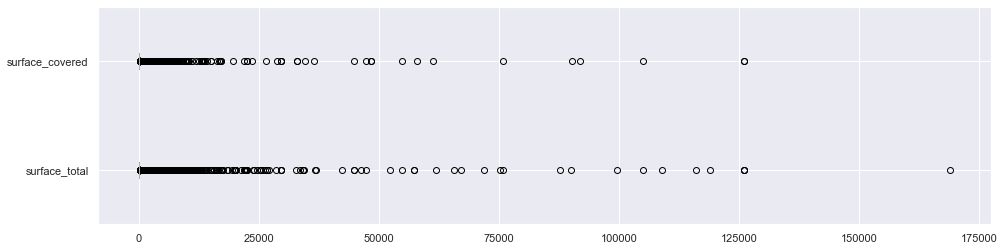

In [25]:
#3. El valor máximo es un valor atipico casi de manera segura para tanto surface_covered como surface_total.
fig = plt.figure(figsize=(16,4))
dataset.boxplot(column=["surface_total", "surface_covered"], vert=False)

Evidentemente, los valores máximos son atipicos tanto para surface_covered como surface_total, dada la información brindada por los boxplots.

In [26]:
#4. Ver si el valor maximo de rooms es un outlier.

dataset["rooms"].value_counts().sort_index()

1.0     11129
2.0     41044
3.0     44573
4.0     28922
5.0     10356
6.0      4008
7.0      1729
8.0       793
9.0       226
10.0      202
11.0       46
12.0       50
13.0       12
14.0       12
15.0       15
16.0        7
18.0        4
20.0        7
21.0        2
24.0        1
25.0        2
26.0        2
30.0        1
32.0        1
35.0        1
Name: rooms, dtype: int64

In [27]:
dataset["rooms"].value_counts().sort_index()*100/len(dataset["rooms"])

1.0      7.774634
2.0     28.673024
3.0     31.138356
4.0     20.204688
5.0      7.234622
6.0      2.799958
7.0      1.207866
8.0      0.553984
9.0      0.157882
10.0     0.141116
11.0     0.032135
12.0     0.034930
13.0     0.008383
14.0     0.008383
15.0     0.010479
16.0     0.004890
18.0     0.002794
20.0     0.004890
21.0     0.001397
24.0     0.000699
25.0     0.001397
26.0     0.001397
30.0     0.000699
32.0     0.000699
35.0     0.000699
Name: rooms, dtype: float64

Las instancias con valores de rooms > 6 son muy poco representativas para nuestra predicción.

In [28]:
#5. Ver si el valor maximo de bedrooms es un outlier.

dataset["bedrooms"].value_counts().sort_index()

0.0      5467
1.0     49083
2.0     45612
3.0     31019
4.0      8881
5.0      1983
6.0       705
7.0       248
8.0        55
9.0        27
10.0       19
11.0       13
12.0       15
13.0        6
14.0        6
15.0        6
Name: bedrooms, dtype: int64

In [29]:
dataset["bedrooms"].value_counts().sort_index()*100/len(dataset["bedrooms"])

0.0      3.819204
1.0     34.289008
2.0     31.864194
3.0     21.669636
4.0      6.204199
5.0      1.385309
6.0      0.492508
7.0      0.173251
8.0      0.038423
9.0      0.018862
10.0     0.013273
11.0     0.009082
12.0     0.010479
13.0     0.004192
14.0     0.004192
15.0     0.004192
Name: bedrooms, dtype: float64

Las instancias con valores de bedrooms > 4 son muy poco representativas para nuestra predicción.

## Imputación de valores faltantes

In [30]:
#6. Analizar si los missing en surface_total 
# y surface_covered son MAR (la probabilidad de valor faltante depende de otra variable).

dataset['surface_covered-intervalos'] = pd.cut(dataset.surface_covered, bins  = 30)

In [31]:
vf_surface_covered_surface_total = dataset.surface_total.isnull().groupby([dataset['surface_covered-intervalos']]).sum().astype(int).reset_index(name='count')

In [32]:
vf_surface_covered_surface_total['freq'] = vf_surface_covered_surface_total['count']/dataset.groupby([dataset['surface_covered-intervalos']]).count()['surface_covered'].values
vf_surface_covered_surface_total['freq'].fillna(0, inplace=True)
vf_surface_covered_surface_total.columns

Index(['surface_covered-intervalos', 'count', 'freq'], dtype='object')

In [33]:
vf_surface_covered_surface_total["bin_centres"] = vf_surface_covered_surface_total["surface_covered-intervalos"].apply(lambda x: x.mid)
vf_surface_covered_surface_total.columns

Index(['surface_covered-intervalos', 'count', 'freq', 'bin_centres'], dtype='object')

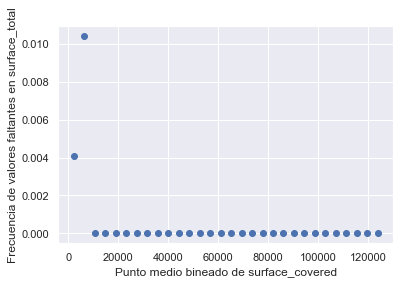

In [34]:
plt.scatter(vf_surface_covered_surface_total['bin_centres'], vf_surface_covered_surface_total['freq'])
plt.xlabel('Punto medio bineado de surface_covered')
plt.ylabel('Frecuencia de valores faltantes en surface_total')
plt.show()

No se encontró relacion de "surface_covered" a "surface_total". 

Analizaremos la causal de "surface_total" a "surface_covered".

In [35]:
dataset['surface_total-intervalos'] = pd.cut(dataset.surface_total, bins  = 30)

In [36]:
vf_surface_total_surface_covered = dataset.surface_covered.isnull().groupby([dataset['surface_total-intervalos']]).sum().astype(int).reset_index(name='count')
vf_surface_total_surface_covered.columns

Index(['surface_total-intervalos', 'count'], dtype='object')

In [37]:
vf_surface_total_surface_covered['freq'] = vf_surface_total_surface_covered['count']/dataset.groupby([dataset['surface_total-intervalos']]).count()['surface_total'].values
vf_surface_total_surface_covered['freq'].fillna(0, inplace=True)
vf_surface_total_surface_covered.columns

Index(['surface_total-intervalos', 'count', 'freq'], dtype='object')

In [38]:
vf_surface_total_surface_covered["bin_centres"] = vf_surface_total_surface_covered["surface_total-intervalos"].apply(lambda x: x.mid)
vf_surface_total_surface_covered.columns

Index(['surface_total-intervalos', 'count', 'freq', 'bin_centres'], dtype='object')

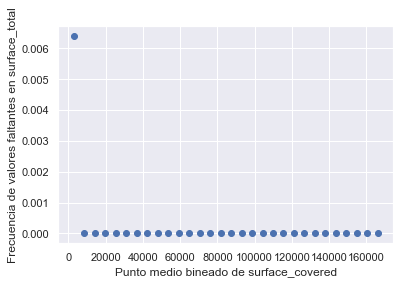

In [39]:
plt.scatter(vf_surface_total_surface_covered['bin_centres'], vf_surface_total_surface_covered['freq'])
plt.xlabel('Punto medio bineado de surface_covered')
plt.ylabel('Frecuencia de valores faltantes en surface_total')
plt.show()

In [40]:
dataset.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type', 'surface_covered-intervalos',
       'surface_total-intervalos'],
      dtype='object')

In [41]:
dataset.drop(['surface_covered-intervalos','surface_total-intervalos'], axis=1, inplace=True)

Tampoco se nota una relacion causal en los missing de "surface_covered" a "surface_total".

Creo que esto se debe a que los cuts no logran captar una verdadera relación dada la existencia de valores atipicos en la cola derecha de la distribución, volveré a hacer este analisis luego de tratar los outliers del dataset para las columnas mencionadas.

## Encoding 1

Para denotar aquellas instancias que cuentan con missing en alguna carateristica, generaré la columna "missing", la cual será una variable binaria de 1 para instancias con missing y 0 en caso contrario.

In [42]:
columnas = ["surface_total", "surface_covered", "bathrooms"]
for col in dataset[columnas]:
    dataset[col+"_missing"] = dataset[col].isnull().astype(int)

In [43]:
dataset["surface_total_missing"].sum()

18623

In [44]:
dataset["bathrooms_missing"].sum()

4211

In [45]:
dataset["surface_covered_missing"].sum()

18909

In [46]:
missing = dataset[(dataset['surface_total_missing'] == 1) | 
                 (dataset['bathrooms_missing'] == 1) |
                 (dataset['surface_covered_missing'] == 1)]
missing.shape

(21095, 22)

In [47]:
missing_surface = dataset[(dataset['surface_total_missing'] == 1) | (dataset['surface_covered_missing'] == 1)]
missing_surface.shape

(19419, 22)

Me surge la duda de calcular cuantos valores "surface_total" = "surface_covered" , para saber si es correcto imputar a los valores fatantes de sufarte covered el valor de sufarce total, o lo mismo con causalidad inversa. Pero no obtuve buenos resultados.

In [48]:
len(dataset[dataset["surface_total"] == dataset["surface_covered"]])/len(dataset["surface_total"])

0.2391281567641203

In [49]:
departamento = dataset[dataset["property_type"]=="Departamento"]
casa = dataset[dataset["property_type"]=="Casa"]
ph = dataset[dataset["property_type"]=="PH"]

In [50]:
len(departamento[departamento["surface_total"] == departamento["surface_covered"]])/len(departamento["surface_total"])

0.2583064681437862

In [51]:
len(casa[casa["surface_total"] == casa["surface_covered"]])/len(casa["surface_total"])

0.08196645137307745

In [52]:
len(ph[ph["surface_total"] == ph["surface_covered"]])/len(ph["surface_total"])

0.3317247167436005

## Imputación Lógica

Los valores "surface_covered" no pueden ser mayores a "surface_total"

In [53]:
dataset_clean_missing = dataset[(dataset["surface_total_missing"]==1) |
                                      (dataset["surface_covered_missing"]==1)]

dataset_clean_not_missing = dataset[~((dataset["surface_total_missing"]==1) |
                                      (dataset["surface_covered_missing"]==1))]

print(dataset_clean_missing.shape)
print(dataset_clean_not_missing.shape)
print(len(dataset_clean_missing)+len(dataset_clean_not_missing))

(19419, 22)
(123726, 22)
143145


In [54]:
dataset_clean_not_missing['surface_covered'] = np.where(dataset_clean_not_missing['surface_covered'] > dataset_clean_not_missing['surface_total'], dataset_clean_not_missing['surface_total'], dataset_clean_not_missing['surface_covered'])

C:\Users\ancar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [55]:
dataset_clean_not_missing.shape

(123726, 22)

In [56]:
dataset = dataset_clean_not_missing
dataset.shape

(123726, 22)

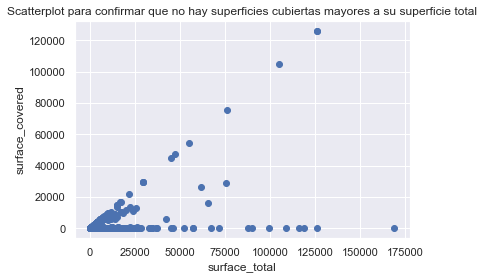

In [57]:
plt.scatter(x= dataset['surface_total'],
            y= dataset['surface_covered'])

plt.ylabel('surface_covered')
plt.xlabel('surface_total')

plt.title("Scatterplot para confirmar que no hay superficies cubiertas mayores a su superficie total")

plt.show()

In [58]:
dataset[dataset['surface_total']<dataset['surface_covered']]

Empty DataFrame
Columns: [start_date, end_date, created_on, lat, lon, l1, l2, l3, rooms, bedrooms, bathrooms, surface_total, surface_covered, price, currency, title, description, property_type, operation_type, surface_total_missing, surface_covered_missing, bathrooms_missing]
Index: []

[0 rows x 22 columns]

## Reescalamiento de los Datos

Trabajaré con cada tipo de propiedad por separado para tener una mejor segmentación de los datos.

También haré un escalado de las columnas a trabajar, la metodología seleccionada en este caso es la mencionada por el libro "Análisis multivariante aplicado con R. 2ª ed. By ALDAS MANZANO, JOAQUIN, URIEL". Quienes presentan la siguiente gráfica en la p.67:
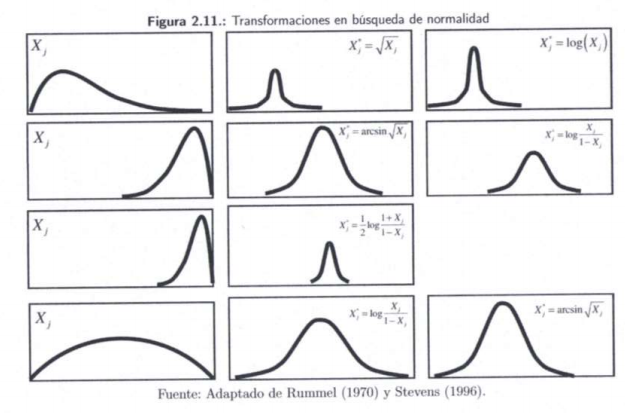
Las varaibles superficie cubierta, superficie total y precio tienen la distribución de la primer fila como se puede notar en mi primer proyecto, por lo que tomaré logaritmos para normalizar las distribuciones.

In [59]:
columnas = ["surface_total", "surface_covered","price"]
for col in columnas:
    dataset[col+"_log"] = np.log(dataset[col])

In [60]:
dataset[dataset['property_type'] == "Departamento"]["surface_total_log"].isna().sum()

0

In [61]:
dataset[dataset['property_type'] == "Departamento"]["surface_covered_log"].isna().sum()

0

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123726 entries, 0 to 146659
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_date               123726 non-null  object 
 1   end_date                 123726 non-null  object 
 2   created_on               123726 non-null  object 
 3   lat                      115313 non-null  float64
 4   lon                      115313 non-null  float64
 5   l1                       123726 non-null  object 
 6   l2                       123726 non-null  object 
 7   l3                       123726 non-null  object 
 8   rooms                    123726 non-null  float64
 9   bedrooms                 123726 non-null  float64
 10  bathrooms                122050 non-null  float64
 11  surface_total            123726 non-null  float64
 12  surface_covered          123726 non-null  float64
 13  price                    123726 non-null  float64
 14  curr

Una vez realizado este reescalado de los datos, normalizaré las variables.

In [63]:
departamento = dataset[dataset['property_type'] == "Departamento"]

casa = dataset[dataset['property_type'] == "Casa"]

ph = dataset[dataset['property_type'] == "PH"]

In [64]:
for i in [departamento, casa, ph]:
    for col in ["surface_total_log", "surface_covered_log", "price_log"]:
        i[col+"_norm"] = (i[col] - i[col].mean()) / i[col].std()

C:\Users\ancar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
lista = [departamento, casa, ph]
dataset = pd.concat(lista)
dataset.isna().sum()

start_date                     0
end_date                       0
created_on                     0
lat                         8413
lon                         8413
l1                             0
l2                             0
l3                             0
rooms                          0
bedrooms                       0
bathrooms                   1676
surface_total                  0
surface_covered                0
price                          0
currency                       0
title                          0
description                    0
property_type                  0
operation_type                 0
surface_total_missing          0
surface_covered_missing        0
bathrooms_missing              0
surface_total_log              0
surface_covered_log            0
price_log                      0
surface_total_log_norm         0
surface_covered_log_norm       0
price_log_norm                 0
dtype: int64

In [66]:
dataset = dataset.rename({'surface_total_log_norm': 'surface_total_norm',
                          'surface_covered_log_norm': 'surface_covered_norm',
                          'price_log_norm': 'price_norm'}, axis=1)

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123726 entries, 0 to 146653
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_date               123726 non-null  object 
 1   end_date                 123726 non-null  object 
 2   created_on               123726 non-null  object 
 3   lat                      115313 non-null  float64
 4   lon                      115313 non-null  float64
 5   l1                       123726 non-null  object 
 6   l2                       123726 non-null  object 
 7   l3                       123726 non-null  object 
 8   rooms                    123726 non-null  float64
 9   bedrooms                 123726 non-null  float64
 10  bathrooms                122050 non-null  float64
 11  surface_total            123726 non-null  float64
 12  surface_covered          123726 non-null  float64
 13  price                    123726 non-null  float64
 14  curr

In [68]:
departamento = dataset[dataset['property_type'] == "Departamento"]

casa = dataset[dataset['property_type'] == "Casa"]

ph = dataset[dataset['property_type'] == "PH"]

In [69]:
departamento["surface_total_norm"].isna().sum()

0

In [70]:
departamento["surface_covered_norm"].isna().sum()

0

In [71]:
departamento["price"].isna().sum()

0

In [72]:
departamento["price_norm"].mean()

-9.92200454441385e-13

In [73]:
departamento["price_norm"].std()

1.0000000000000258

In [74]:
casa["price_norm"].mean()

-9.447865441870707e-14

In [75]:
casa["price_norm"].std()

0.9999999999999939

In [76]:
ph["price_norm"].mean()

-2.1418181251944466e-13

In [77]:
ph["price_norm"].std()

1.0000000000000038

## Filtro de valores Outliers

Filtraré los valores outliers que estén fuera de lovalores límites por Boxplots, separados por tipo de propiedad.

#### 1. Superficie total:

In [78]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset[dataset["property_type"]==i]["surface_total"].quantile(0.75) - dataset["surface_total"].quantile(0.25))
    limite_min = dataset[dataset["property_type"]==i]["surface_total"].quantile(0.25) - (ric * 1.5)
    limite_max = dataset[dataset["property_type"]==i]["surface_total"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"RIC:{ric}")
    print(f"Limite máximo surface_total: {limite_max}")
    print(f"Limite mínimo surface_total: {limite_min}")

Departamento
RIC:46.0
Limite máximo surface_total: 167.0
Limite mínimo surface_total: -21.0
Casa
RIC:516.5
Limite máximo surface_total: 1343.25
Limite mínimo surface_total: -574.75
PH
RIC:100.0
Limite máximo surface_total: 302.0
Limite mínimo surface_total: -80.0


El limite mínimo bajo cálculo del boxplot es negativo, por lo cual, no filtrará valores bajos. Entonces pasaré a filtrar por el cuantil 0.01 a los valores inferiores.

In [79]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset[dataset["property_type"]==i]["surface_total"].quantile(0.75) - dataset["surface_total"].quantile(0.25))
    limite_min = dataset[dataset["property_type"]==i]["surface_total"].quantile(0.01)
    limite_max = dataset[dataset["property_type"]==i]["surface_total"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"Limite máximo surface_total: {limite_max}")
    print(f"Limite mínimo surface_total: {limite_min}")
    print(f"RIC:{ric}")

Departamento
Limite máximo surface_total: 167.0
Limite mínimo surface_total: 26.0
RIC:46.0
Casa
Limite máximo surface_total: 1343.25
Limite mínimo surface_total: 66.06
RIC:516.5
PH
Limite máximo surface_total: 302.0
Limite mínimo surface_total: 33.0
RIC:100.0


Almacenaré estos límites en una lista y filtraré la base de acuerdo al tipo de propiedad bajo su respectivo límite.

In [80]:
limite_min = []
limite_max = []

for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset[dataset["property_type"]==i]["surface_total"].quantile(0.75) - dataset["surface_total"].quantile(0.25))
    limite_min.append(dataset[dataset["property_type"]==i]["surface_total"].quantile(0.01))
    limite_max.append(dataset[dataset["property_type"]==i]["surface_total"].quantile(0.75) + (ric * 1.5))

print(limite_min)
print(limite_max)

[26.0, 66.06, 33.0]
[167.0, 1343.25, 302.0]


Separo a la base por cada tipo de propiedad.

In [81]:
departamentos = dataset[dataset["property_type"]=="Departamento"]
casas = dataset[dataset["property_type"]=="Casa"]
PHs = dataset[dataset["property_type"]=="PH"]

In [82]:
departamentos_missing = dataset_clean_missing[dataset_clean_missing["property_type"]=="Departamento"]
casas_missing = dataset_clean_missing[dataset_clean_missing["property_type"]=="Casa"]
PHs_missing = dataset_clean_missing[dataset_clean_missing["property_type"]=="PH"]

Filtro a cada propiedad y analizo su nueva distribución.

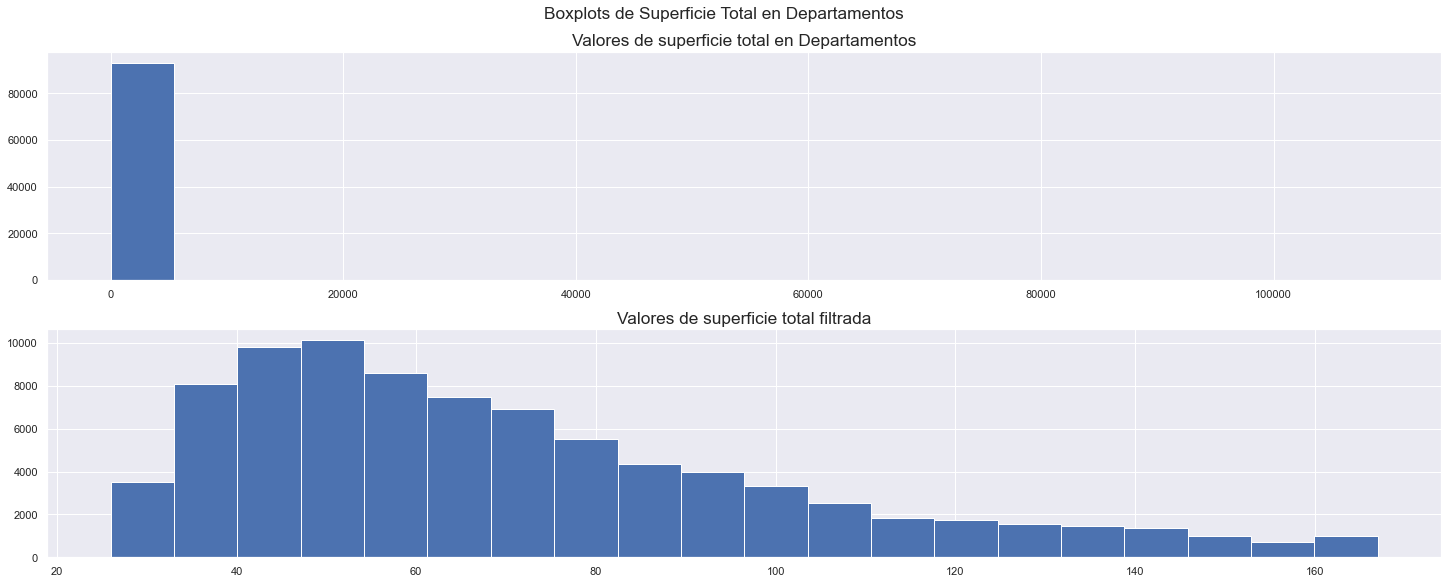

In [83]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

departamentos_clean = departamentos[((departamentos["surface_total"] <= limite_max[0]) &
                                    (departamentos["surface_total"] >= limite_min[0]))]

fig.suptitle('Boxplots de Superficie Total en Departamentos', fontsize='x-large')

ax1.hist(x = departamentos["surface_total"],bins=20)

ax2.hist(x = departamentos_clean["surface_total"],bins=20)

ax1.set_title("Valores de superficie total en Departamentos", fontsize='x-large')
ax2.set_title("Valores de superficie total filtrada",
              fontsize='x-large')
plt.show()

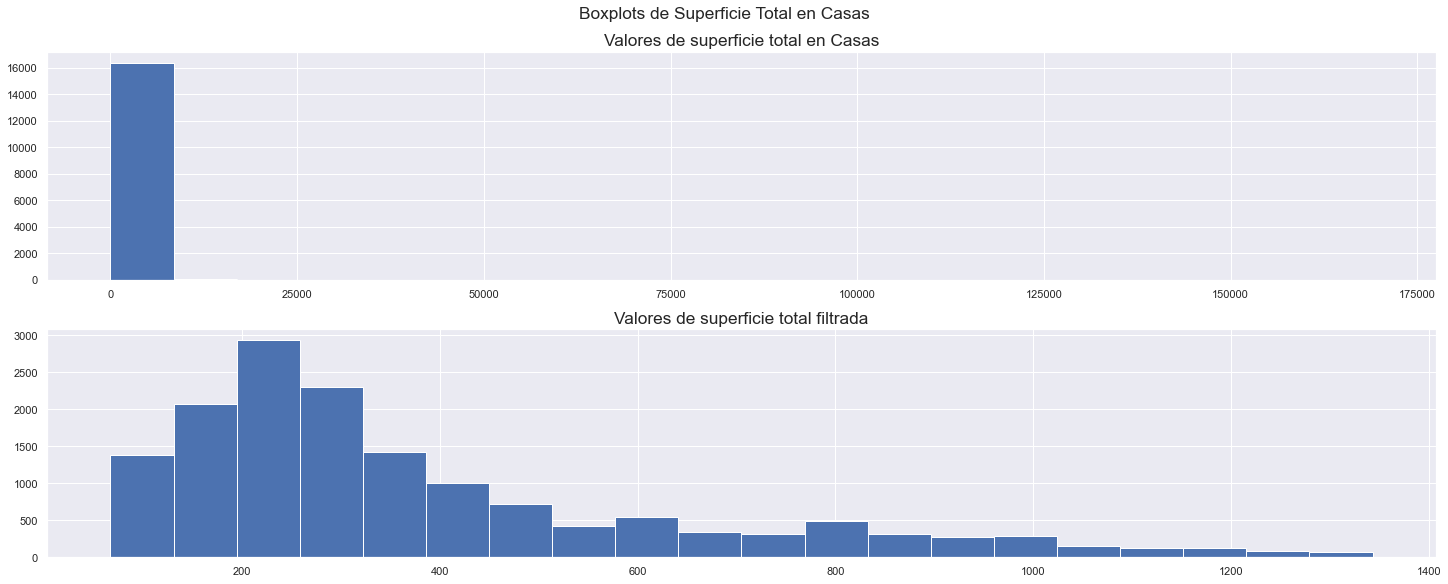

In [84]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

casas_clean = casas[((casas["surface_total"] <= limite_max[1]) &
                    (casas["surface_total"] >= limite_min[1]))]

fig.suptitle('Boxplots de Superficie Total en Casas', fontsize='x-large')

ax1.hist(x = casas["surface_total"],bins=20)

ax2.hist(x = casas_clean["surface_total"],bins=20)

ax1.set_title("Valores de superficie total en Casas", fontsize='x-large')
ax2.set_title("Valores de superficie total filtrada",
              fontsize='x-large')
plt.show()

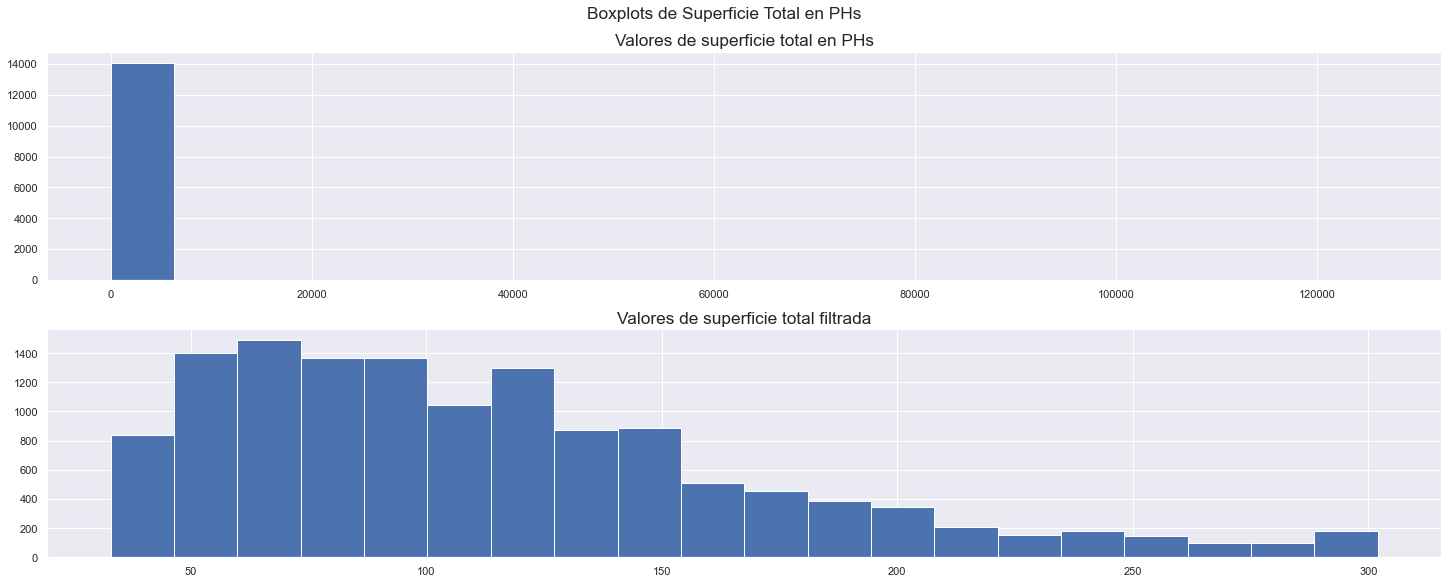

In [85]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

PHs_clean = PHs[((PHs["surface_total"] <= limite_max[2]) &
                (PHs["surface_total"] >= limite_min[2]))]

fig.suptitle('Boxplots de Superficie Total en PHs', fontsize='x-large')

ax1.hist(x = PHs["surface_total"],bins=20)

ax2.hist(x = PHs_clean["surface_total"],bins=20)

ax1.set_title("Valores de superficie total en PHs", fontsize='x-large')
ax2.set_title("Valores de superficie total filtrada",
              fontsize='x-large')
plt.show()

In [86]:
departamentos_clean = departamentos[((departamentos["surface_total"] <= limite_max[0]) &
                                    (departamentos["surface_total"] >= limite_min[0]))]

casas_clean = casas[((casas["surface_total"] <= limite_max[1]) &
                    (casas["surface_total"] >= limite_min[1]))]

PHs_clean = PHs[((PHs["surface_total"] <= limite_max[2]) &
                (PHs["surface_total"] >= limite_min[2]))]

departamentos_missing_clean = departamentos_missing[((departamentos_missing["surface_total"] <= limite_max[0]) &
                                    (departamentos_missing["surface_total"] >= limite_min[0])) | (departamentos_missing["surface_total_missing"]==1)]

casas_missing_clean = casas_missing[((casas_missing["surface_total"] <= limite_max[0]) &
                                    (casas_missing["surface_total"] >= limite_min[0])) | (casas_missing["surface_total_missing"]==1)]

PHs_missing_clean = PHs_missing[((PHs_missing["surface_total"] <= limite_max[0]) &
                                    (PHs_missing["surface_total"] >= limite_min[0])) | (PHs_missing["surface_total_missing"]==1)]

In [87]:
lista = [departamentos_clean, casas_clean, PHs_clean]
dataset = pd.concat(lista)
dataset.shape

(113573, 28)

In [88]:
lista = [departamentos_missing_clean, casas_missing_clean, PHs_missing_clean]
dataset_clean_missing = pd.concat(lista)
dataset_clean_missing.shape

(19293, 22)

#### 2. Superficie covered:

In [89]:
departamentos = dataset[dataset["property_type"]=="Departamento"]
casas = dataset[dataset["property_type"]=="Casa"]
PHs = dataset[dataset["property_type"]=="PH"]

In [90]:
departamentos_missing = dataset_clean_missing[dataset_clean_missing["property_type"]=="Departamento"]
casas_missing = dataset_clean_missing[dataset_clean_missing["property_type"]=="Casa"]
PHs_missing = dataset_clean_missing[dataset_clean_missing["property_type"]=="PH"]

In [91]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset[dataset["property_type"]==i]["surface_covered"].quantile(0.75) - dataset["surface_covered"].quantile(0.25))
    limite_min = dataset[dataset["property_type"]==i]["surface_covered"].quantile(0.25) - (ric * 1.5)
    limite_max = dataset[dataset["property_type"]==i]["surface_covered"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"Limite máximo surface_covered: {limite_max}")
    print(f"Limite mínimo surface_covered: {limite_min}")
    print(f"RIC:{ric}")

Departamento
Limite máximo surface_covered: 123.5
Limite mínimo surface_covered: -3.5
RIC:31.0
Casa
Limite máximo surface_covered: 493.5
Limite mínimo surface_covered: -158.5
RIC:179.0
PH
Limite máximo surface_covered: 213.5
Limite mínimo surface_covered: -44.5
RIC:67.0


El limite mínimo bajo cálculo del boxplot es negativo, por lo cual, no filtrará valores bajos. Entonces pasaré a filtrar por el cuantil 0.01 a los valores inferiores.

In [92]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset[dataset["property_type"]==i]["surface_covered"].quantile(0.75) - dataset["surface_covered"].quantile(0.25))
    limite_min = dataset[dataset["property_type"]==i]["surface_covered"].quantile(0.01)
    limite_max = dataset[dataset["property_type"]==i]["surface_covered"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"Limite máximo surface_covered: {limite_max}")
    print(f"Limite mínimo surface_covered: {limite_min}")
    print(f"RIC:{ric}")

Departamento
Limite máximo surface_covered: 123.5
Limite mínimo surface_covered: 27.0
RIC:31.0
Casa
Limite máximo surface_covered: 493.5
Limite mínimo surface_covered: 53.0
RIC:179.0
PH
Limite máximo surface_covered: 213.5
Limite mínimo surface_covered: 33.0
RIC:67.0


In [93]:
limite_min = []
limite_max = []

for i in ["Departamento", "Casa", "PH"]:
    limite_min.append(dataset[dataset["property_type"]==i]["surface_covered"].quantile(0.01))
    limite_max.append(dataset[dataset["property_type"]==i]["surface_covered"].quantile(0.75) + (ric * 1.5))

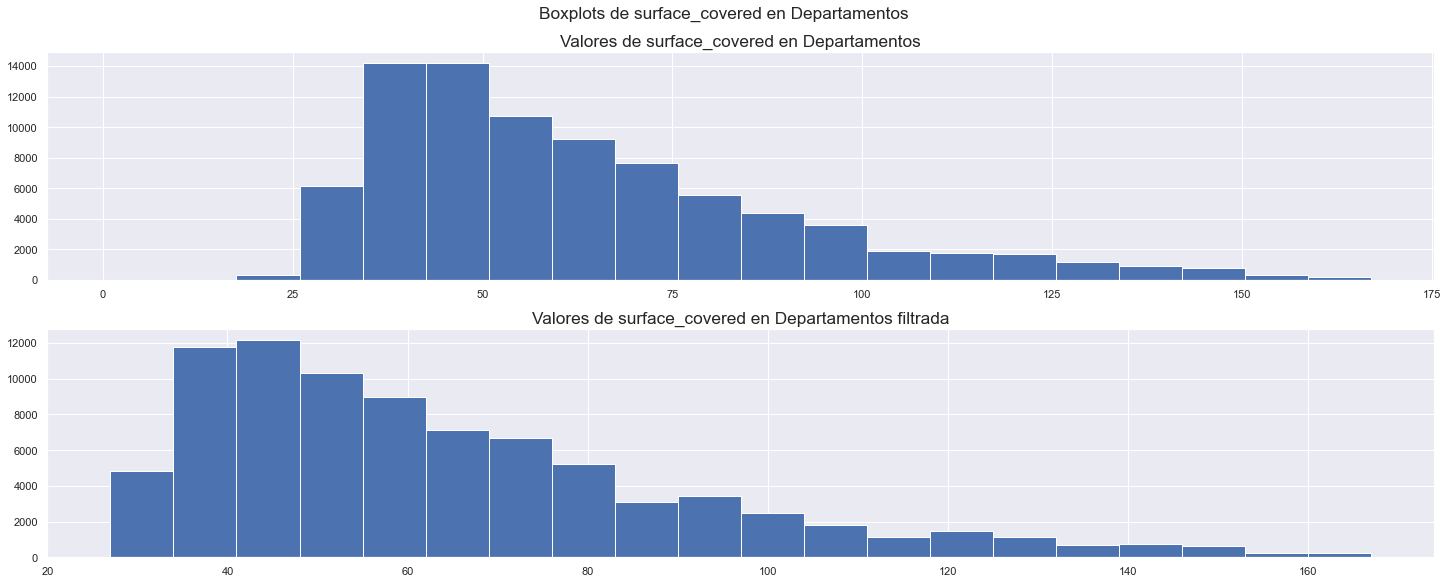

In [94]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

departamentos_clean = departamentos[((departamentos["surface_covered"] <= limite_max[0]) &
                                    (departamentos["surface_covered"] >= limite_min[0]))]

fig.suptitle('Boxplots de surface_covered en Departamentos', fontsize='x-large')

ax1.hist(x = departamentos["surface_covered"],bins=20)

ax2.hist(x = departamentos_clean["surface_covered"],bins=20)

ax1.set_title("Valores de surface_covered en Departamentos", fontsize='x-large')
ax2.set_title("Valores de surface_covered en Departamentos filtrada",
              fontsize='x-large')
plt.show()

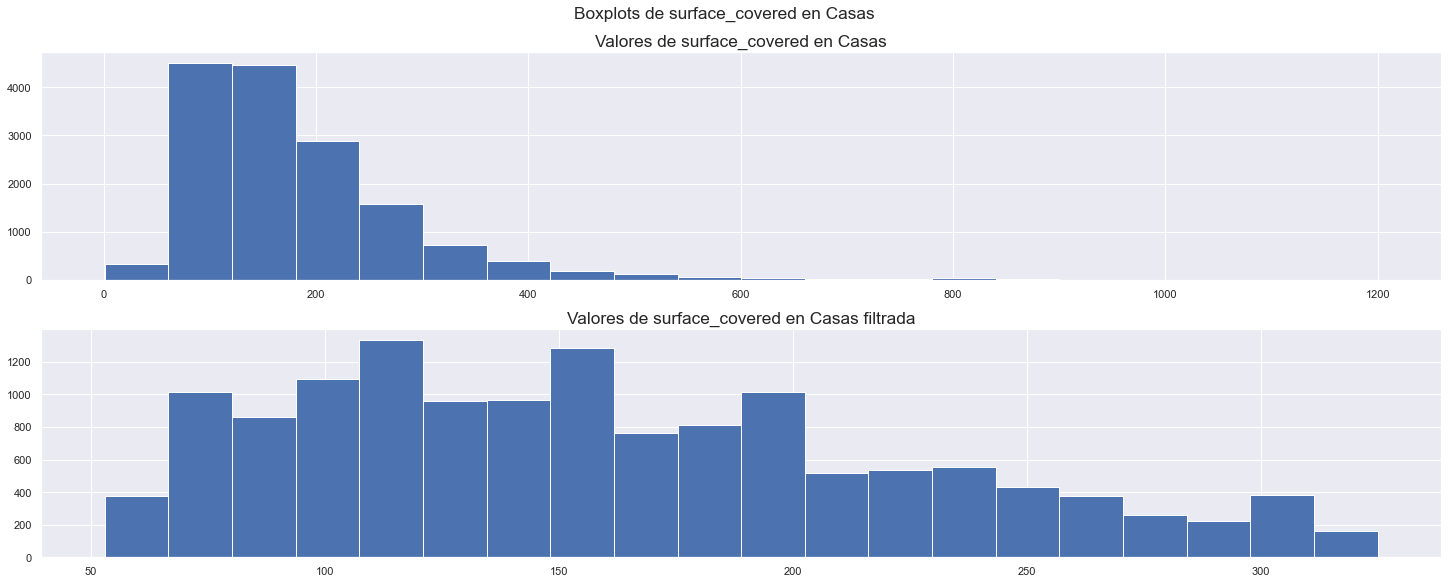

In [95]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

casas_clean = casas[((casas["surface_covered"] <= limite_max[1]) &
                    (casas["surface_covered"] >= limite_min[1]))]

fig.suptitle('Boxplots de surface_covered en Casas', fontsize='x-large')

ax1.hist(x = casas["surface_covered"],bins=20)

ax2.hist(x = casas_clean["surface_covered"],bins=20)

ax1.set_title("Valores de surface_covered en Casas", fontsize='x-large')
ax2.set_title("Valores de surface_covered en Casas filtrada",
              fontsize='x-large')
plt.show()

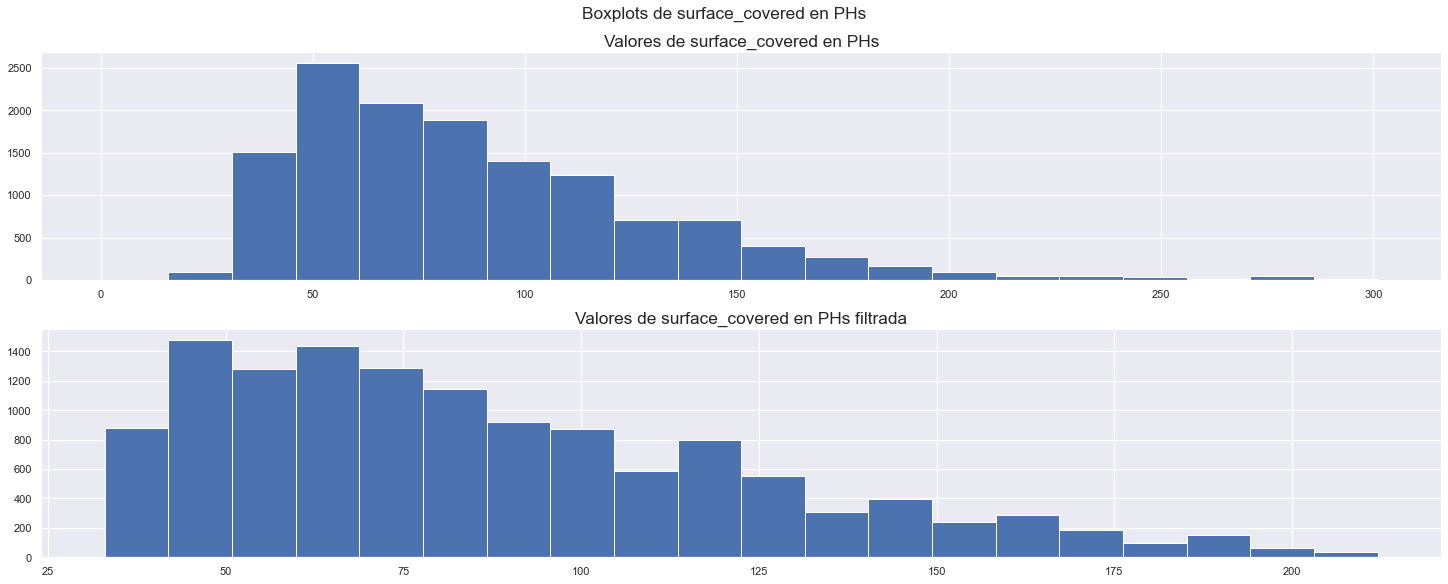

In [96]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

PHs_clean = PHs[((PHs["surface_covered"] <= limite_max[2]) &
                (PHs["surface_covered"] >= limite_min[2]))]

fig.suptitle('Boxplots de surface_covered en PHs', fontsize='x-large')

ax1.hist(x = PHs["surface_covered"],bins=20)

ax2.hist(x = PHs_clean["surface_covered"],bins=20)

ax1.set_title("Valores de surface_covered en PHs", fontsize='x-large')
ax2.set_title("Valores de surface_covered en PHs filtrada",
              fontsize='x-large')
plt.show()

In [97]:
departamentos_clean = departamentos_clean[((departamentos_clean["surface_covered"] <= limite_max[0]) &
                                    (departamentos_clean["surface_covered"] >= limite_min[0]))]

casas_clean = casas_clean[((casas_clean["surface_covered"] <= limite_max[1]) &
                    (casas_clean["surface_covered"] >= limite_min[1]))]

PHs_clean = PHs_clean[((PHs_clean["surface_covered"] <= limite_max[2]) &
                (PHs_clean["surface_covered"] >= limite_min[2]))]

departamentos_missing_clean = departamentos_missing[((departamentos_missing["surface_covered"] <= limite_max[0]) &
                                    (departamentos_missing["surface_covered"] >= limite_min[0])) | (departamentos_missing["surface_covered_missing"]==1)]

casas_missing_clean = casas_missing[((casas_missing["surface_covered"] <= limite_max[0]) &
                                    (casas_missing["surface_covered"] >= limite_min[0])) | (casas_missing["surface_covered_missing"]==1)]

PHs_missing_clean = PHs_missing[((PHs_missing["surface_covered"] <= limite_max[0]) &
                                    (PHs_missing["surface_covered"] >= limite_min[0])) | (PHs_missing["surface_covered_missing"]==1)]

In [98]:
lista = [departamentos_missing_clean, casas_missing_clean, PHs_missing_clean]
dataset_clean_missing = pd.concat(lista)
dataset_clean_missing.shape

(19160, 22)

In [99]:
lista = [departamentos_clean, casas_clean, PHs_clean]
dataset = pd.concat(lista)
dataset.shape

(111140, 28)

In [100]:
lista = [dataset,dataset_clean_missing]
dataset2 = pd.concat(lista)
dataset2.shape

(130300, 28)

In [101]:
dataset = dataset2

#### 3 Precios:

In [102]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset[dataset["property_type"]==i]["price"].quantile(0.75) - dataset["price"].quantile(0.25)) 
    limite_min = dataset[dataset["property_type"]==i]["price"].quantile(0.25) - (ric * 1.5)
    limite_max = dataset[dataset["property_type"]==i]["price"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"RIC:{ric}")
    print(f"Limite máximo:{limite_max}")
    print(f"Limite mínimo:{limite_min}")

Departamento
RIC:120000.0
Limite máximo:410000.0
Limite mínimo:-71000.0
Casa
RIC:190000.0
Limite máximo:585000.0
Limite mínimo:-155000.0
PH
RIC:127000.0
Limite máximo:427500.0
Limite mínimo:-81500.0


El limite mínimo bajo cálculo del boxplot es negativo, por lo cual, no filtrará valores bajos. Entonces pasaré a filtrar por el cuantil 0.01 a los valores inferiores.

In [103]:
for i in ["Departamento", "Casa", "PH"]:
    ric = (dataset[dataset["property_type"]==i]["price"].quantile(0.75) - dataset["price"].quantile(0.25)) 
    limite_min = dataset[dataset["property_type"]==i]["price"].quantile(0.01)
    limite_max = dataset[dataset["property_type"]==i]["price"].quantile(0.75) + (ric * 1.5)
    print(i)
    print(f"RIC:{ric}")
    print(f"Limite máximo:{limite_max}")
    print(f"Limite mínimo:{limite_min}")

Departamento
RIC:120000.0
Limite máximo:410000.0
Limite mínimo:50165.950000000004
Casa
RIC:190000.0
Limite máximo:585000.0
Limite mínimo:50000.0
PH
RIC:127000.0
Limite máximo:427500.0
Limite mínimo:48000.0


In [104]:
limite_min = []
limite_max = []

for i in ["Departamento", "Casa", "PH"]:
    limite_min.append(dataset[dataset["property_type"]==i]["price"].quantile(0.01))
    limite_max.append(dataset[dataset["property_type"]==i]["price"].quantile(0.75) + (ric * 1.5))

In [105]:
departamentos = dataset[dataset["property_type"]=="Departamento"]
casas = dataset[dataset["property_type"]=="Casa"]
PHs = dataset[dataset["property_type"]=="PH"]

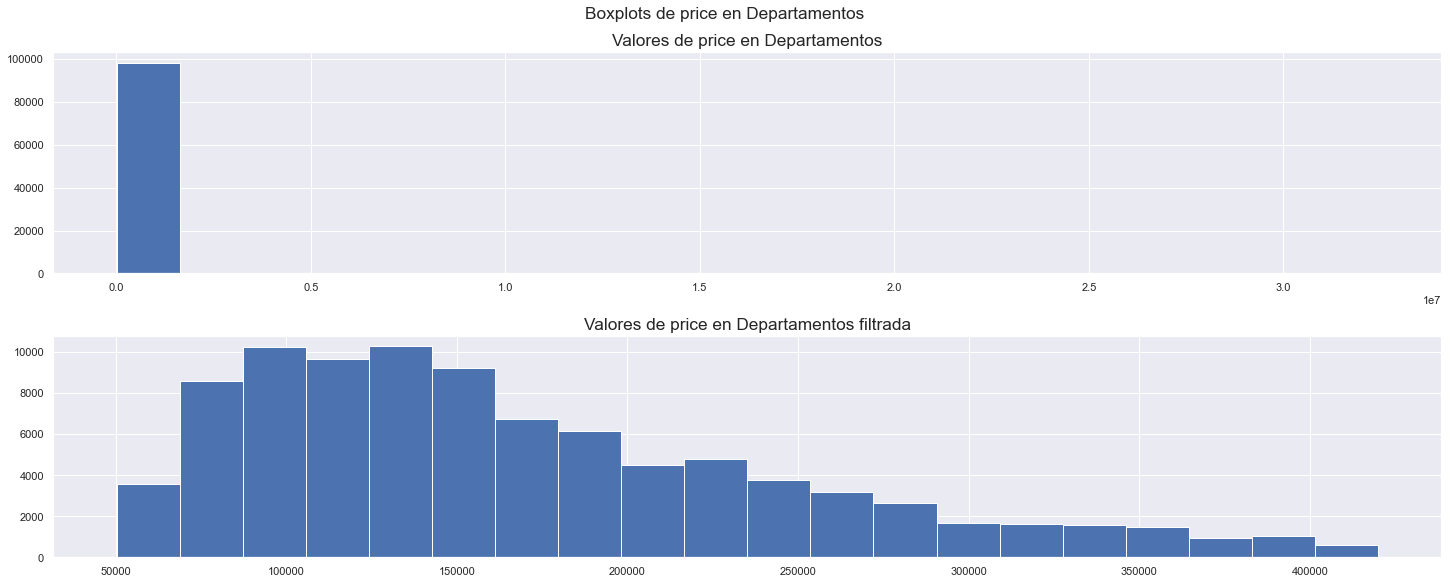

In [106]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

departamentos_clean = departamentos[((departamentos["price"] <= limite_max[0]) &
                                    (departamentos["price"] >= limite_min[0]))]

fig.suptitle('Boxplots de price en Departamentos', fontsize='x-large')

ax1.hist(x = departamentos["price"],bins=20)

ax2.hist(x = departamentos_clean["price"],bins=20)

ax1.set_title("Valores de price en Departamentos", fontsize='x-large')
ax2.set_title("Valores de price en Departamentos filtrada",
              fontsize='x-large')
plt.show()

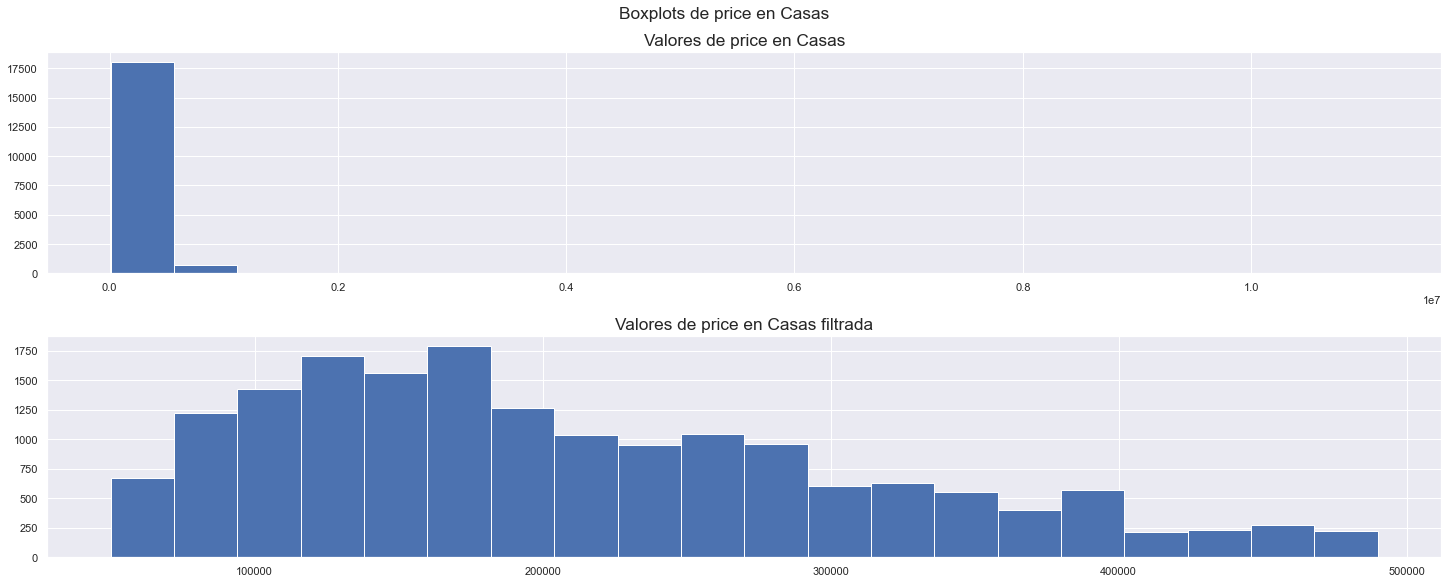

In [107]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

casas_clean = casas[((casas["price"] <= limite_max[1]) &
                    (casas["price"] >= limite_min[1]))]

fig.suptitle('Boxplots de price en Casas', fontsize='x-large')

ax1.hist(x = casas["price"],bins=20)

ax2.hist(x = casas_clean["price"],bins=20)

ax1.set_title("Valores de price en Casas", fontsize='x-large')
ax2.set_title("Valores de price en Casas filtrada",
              fontsize='x-large')
plt.show()

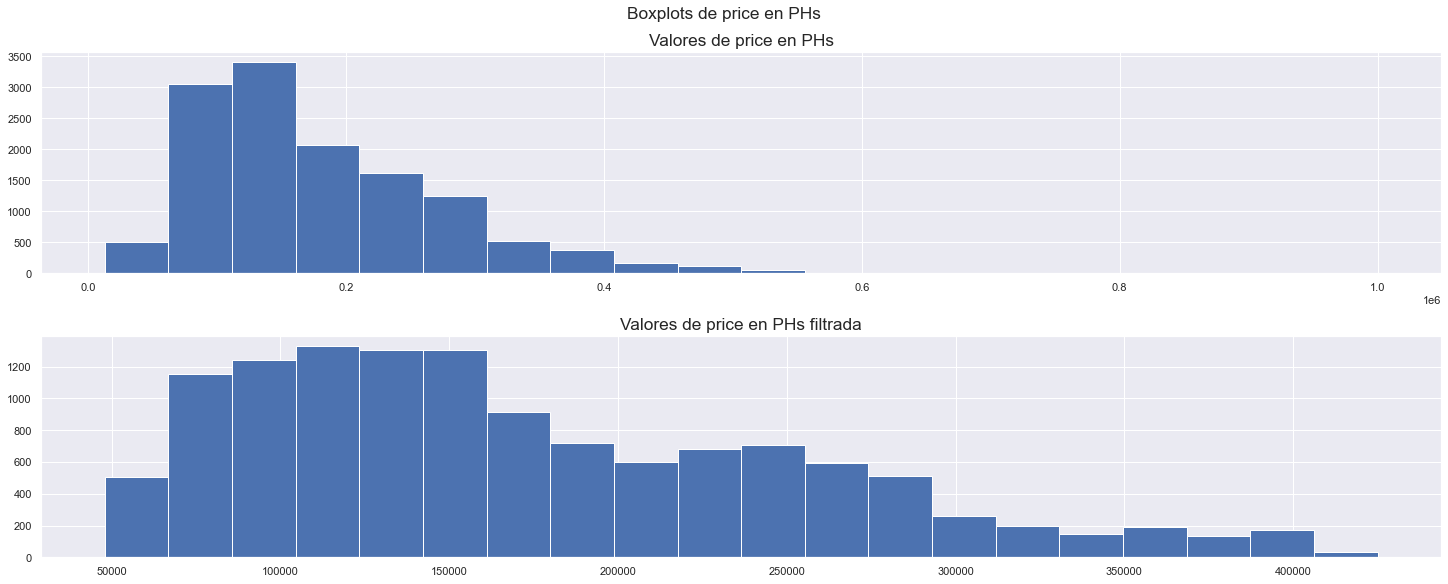

In [108]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), constrained_layout=True)

PHs_clean = PHs[((PHs["price"] <= limite_max[2]) &
                (PHs["price"] >= limite_min[2]))]

fig.suptitle('Boxplots de price en PHs', fontsize='x-large')

ax1.hist(x = PHs["price"],bins=20)

ax2.hist(x = PHs_clean["price"],bins=20)

ax1.set_title("Valores de price en PHs", fontsize='x-large')
ax2.set_title("Valores de price en PHs filtrada",
              fontsize='x-large')
plt.show()

In [109]:
departamentos = departamentos_clean[((departamentos_clean["price"] <= limite_max[0]) &
                                    (departamentos_clean["price"] >= limite_min[0]))]

casas = casas_clean[((casas_clean["price"] <= limite_max[1]) &
                    (casas_clean["price"] >= limite_min[1]))]

PHs = PHs_clean[((PHs_clean["price"] <= limite_max[2]) &
                (PHs_clean["price"] >= limite_min[2]))]

Concateno a las bases filtradas anteriormente.

In [110]:
lista = [departamentos, casas, PHs]

dataset_clean = pd.concat(lista)
dataset_clean.shape

(122207, 28)

F. Una vez filtrado el dataset, puedes utilizar la función pairplot de Seaborn.

<Figure size 864x864 with 0 Axes>

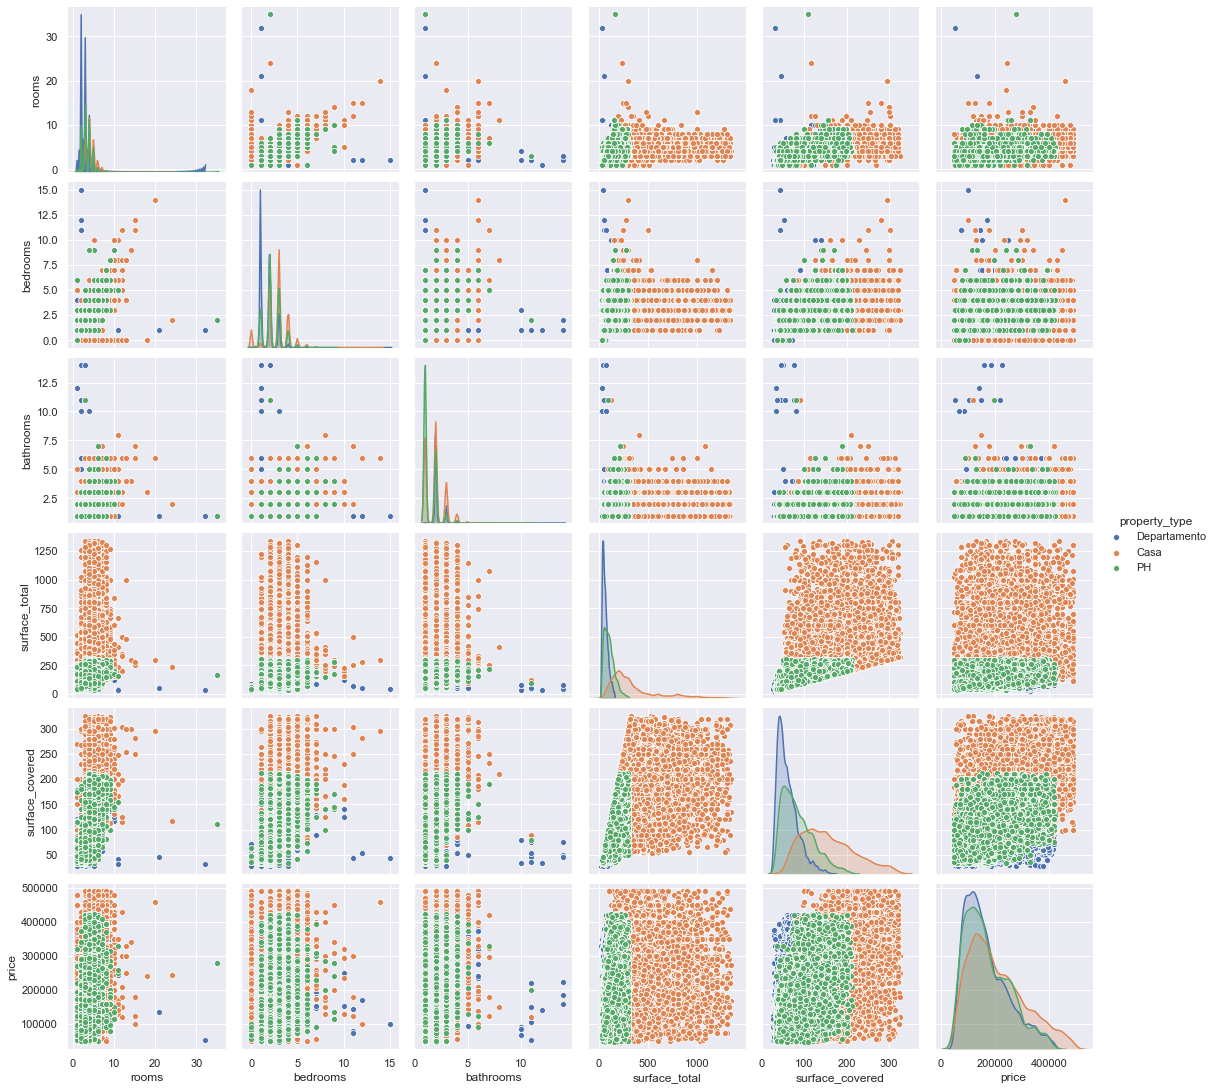

In [111]:
fig = plt.figure(figsize=(12,12))

columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price", "property_type"]
sns.pairplot(dataset_clean[columns], hue="property_type")

plt.show()

#### 4. Rooms, Bedrooms y Bathrooms:

In [112]:
dataset_clean.shape

(122207, 28)

In [113]:
dataset_clean_personal = dataset_clean.copy()
dataset_clean_personal.shape

(122207, 28)

Las instancias con bedrooms = 0 y rooms > 1 las consideramos anteriormente como outliers.

In [114]:
dataset_clean_personal.drop(dataset_clean_personal[(dataset_clean_personal["bedrooms"] == 0) &
                                                   (dataset_clean_personal["rooms"] > 1)].index, 
                            inplace= True)
dataset_clean_personal.shape

(119969, 28)

Las instancias con bathrooms > 4 las consideramos anteriormente como outliers.

In [115]:
dataset_clean_personal.drop(dataset_clean_personal[dataset_clean_personal["bathrooms"] > 4].index, 
                            inplace= True)
dataset_clean_personal.shape

(119787, 28)

Las instancias con rooms > 6 las consideramos anteriormente como outliers.

In [116]:
dataset_clean_personal.drop(dataset_clean_personal[dataset_clean_personal["rooms"] > 6].index, 
                            inplace= True)
dataset_clean_personal.shape

(118698, 28)

Las instancias con bedrooms > 4 las consideramos anteriormente como outliers.

In [117]:
dataset_clean_personal.drop(dataset_clean_personal[dataset_clean_personal["bedrooms"] > 4].index, 
                            inplace= True)
dataset_clean_personal.shape

(117961, 28)

Las instancias con bathrooms > 1 mientras bedrooms = 0, las consideramos anteriormente como outliers.

In [118]:
dataset_clean_personal.drop(dataset_clean_personal[(dataset_clean_personal["bedrooms"]==0) &
                                                   (dataset_clean_personal["bathrooms"]>1)].index,
                           inplace= True)
dataset_clean_personal.shape

(117891, 28)

In [119]:
dataset_clean_personal.drop(dataset_clean_personal[(dataset_clean_personal["rooms"]==1) &
                                                   (dataset_clean_personal["bathrooms"]>1)].index,
                           inplace= True)
dataset_clean_personal.shape

(117826, 28)

In [120]:
dataset_clean_personal.drop(dataset_clean_personal[(dataset_clean_personal["rooms"]==1) &
                                                   (dataset_clean_personal["bedrooms"]>1)].index,
                           inplace= True)
dataset_clean_personal.shape

(117803, 28)

## Distribución luego de Filtro de Outliers:

<Figure size 864x864 with 0 Axes>

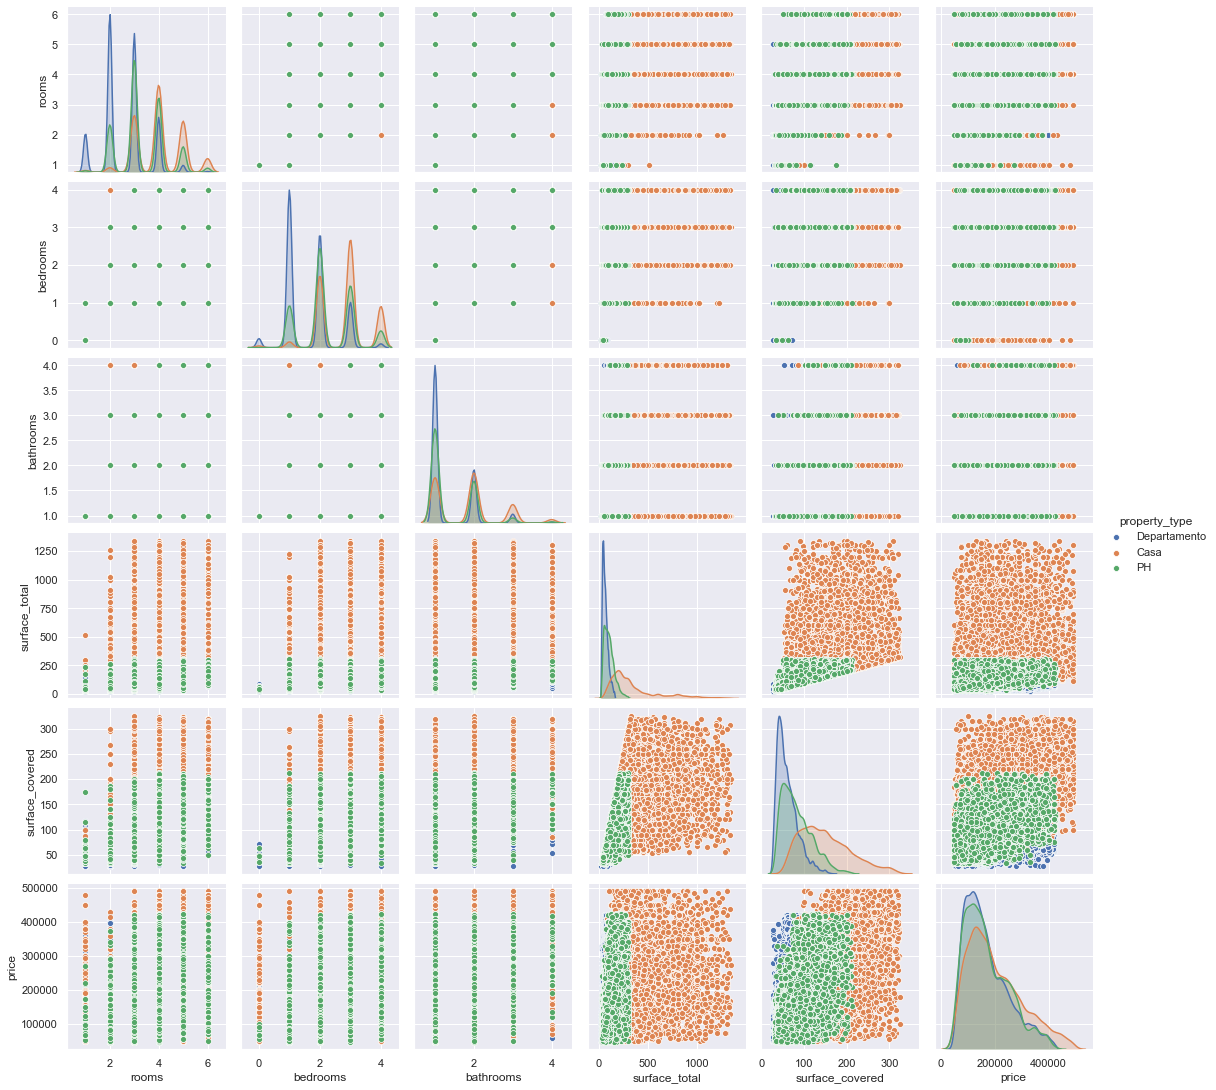

In [121]:
fig = plt.figure(figsize=(12,12))

columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price", "property_type"]
sns.pairplot(dataset_clean_personal[columns], hue="property_type")

plt.show()
#plt.savefig('pairplot_filtro_personal.png')

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

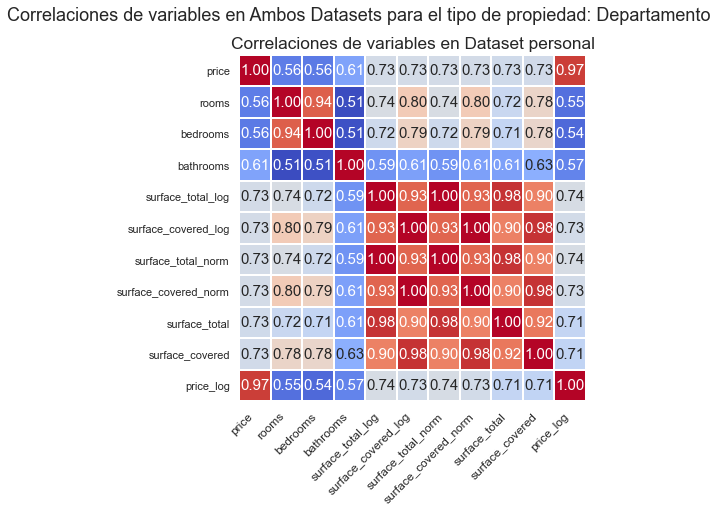

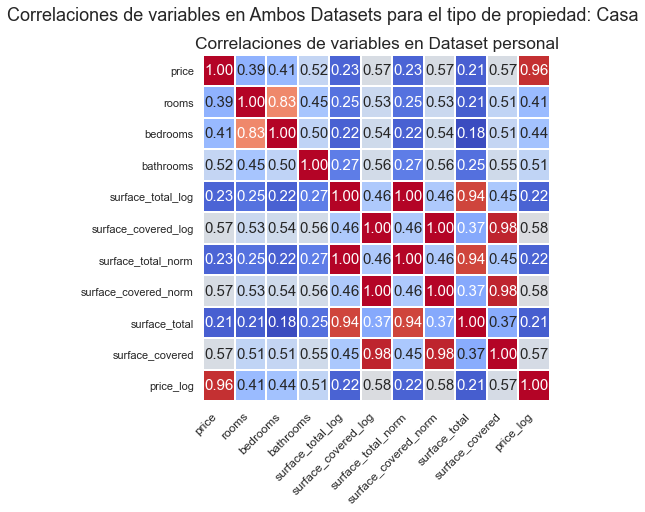

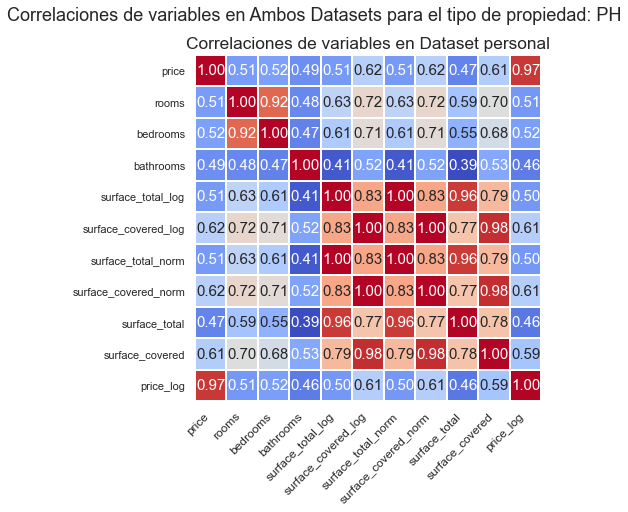

In [122]:
columns = ["price", "rooms", "bedrooms", "bathrooms", "surface_total_log",
           "surface_covered_log", "surface_total_norm", "surface_covered_norm", "surface_total", "surface_covered","price_log"]

for tipo in ["Departamento", "Casa", "PH"]:
    fig, ax1 = plt.subplots(1,1, figsize=(7,7), constrained_layout=True)
    
    data = dataset_clean_personal[dataset_clean_personal["property_type"] == tipo]
    corr = data[columns].corr(method="pearson")
    sns.heatmap(corr, cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
               cmap= 'coolwarm', linewidths=1, ax=ax1)
    ax1.set_xticklabels(data[columns].columns,rotation = 45, fontsize = 12,horizontalalignment= 'right')
    ax1.set_title("Correlaciones de variables en Dataset personal", fontsize='x-large')

    plt.suptitle(f"Correlaciones de variables en Ambos Datasets para el tipo de propiedad: {tipo}", fontsize=18)

Gracias a la matriz de correlacion vemos como es relativamente mas fácil predecir el valor de los departamentos por estas varibles en comparación con las casas y los PH. Esto se deduce por el mayor valor de correlación entre la variable "price_thousands" y el resto de las mismas.

Todas las correlaciones son positivas, lo cual es esperable dado que no tenemos variables del tipo "entre mas de x, menor es el precio".

La mayor correlación entre varaibles independientes para los departamentos se da en las variables "surface_total" y "surface_covered", lo cual es esperable dado que los departamentos suelen dejar mínimo el espacio no cubierto. 

## Imputación de valores faltantes 2

#### Caso Bathrooms:
    
Implementé una imputación por promedio condicional al número de rooms de cada propiedad, me pareció la metodología más lógica. 

In [123]:
dataset_clean_personal.isna().sum()

start_date                     0
end_date                       0
created_on                     0
lat                         7218
lon                         7247
l1                             0
l2                             0
l3                             0
rooms                          0
bedrooms                       0
bathrooms                   3578
surface_total              14282
surface_covered            14565
price                          0
currency                       0
title                          0
description                    0
property_type                  0
operation_type                 0
surface_total_missing          0
surface_covered_missing        0
bathrooms_missing              0
surface_total_log          14928
surface_covered_log        14928
price_log                  14928
surface_total_norm         14928
surface_covered_norm       14928
price_norm                 14928
dtype: int64

Imputo los bathrooms por la variable rooms, que es la variable mas correlacionada.

In [124]:
dataset_clean_personal['rooms-intervalos'] = pd.cut(dataset_clean_personal.rooms, bins  = 6)
dataset_clean_personal.head()

start_date    end_date  created_on        lat        lon         l1  \
11  2019-10-17  2019-10-26  2019-10-17 -34.603683 -58.381557  Argentina   
12  2019-10-17  2019-12-19  2019-10-17 -34.630349 -58.417223  Argentina   
15  2019-10-17  2019-12-23  2019-10-17 -34.395413 -58.649914  Argentina   
16  2019-10-17  2019-12-23  2019-10-17 -34.425087 -58.579659  Argentina   
17  2019-10-17  2019-10-22  2019-10-17        NaN        NaN  Argentina   

                          l2     l3  rooms  bedrooms  ...  \
11           Capital Federal  Boedo    2.0       1.0  ...   
12           Capital Federal  Boedo    2.0       1.0  ...   
15  Bs.As. G.B.A. Zona Norte  Tigre    2.0       1.0  ...   
16  Bs.As. G.B.A. Zona Norte  Tigre    2.0       1.0  ...   
17  Bs.As. G.B.A. Zona Norte  Tigre    2.0       1.0  ...   

    surface_total_missing  surface_covered_missing  bathrooms_missing  \
11                      0                        0                  0   
12                      0                        0                  0   
15                      0                        0                  0   
16                      0                        0                  0   
17                      0                        0                  0   

    surface_total_log surface_covered_log  price_log surface_total_norm  \
11           4.219508            4.077537  11.911702          -0.098183   
12           3.912023            3.784190  11.652687          -0.630128   
15           4.595120            4.430817  12.278393           0.551622   
16           3.912023            3.912023  11.599103          -0.630128   
17           3.970292            3.737670  11.884489          -0.529324   

   surface_covered_norm price_norm  rooms-intervalos  
11            -0.140864  -0.289390    (1.833, 2.667]  
12            -0.683366  -0.664720    (1.833, 2.667]  
15             0.512472   0.241974    (1.833, 2.667]  
16            -0.446957  -0.742368    (1.833, 2.667]  
17            -0.769397  -0.328823    (1.833, 2.667]  

[5 rows x 29 columns]

In [125]:
data_medias_bathroom = pd.DataFrame(dataset_clean_personal.groupby('rooms-intervalos').agg({'bathrooms': lambda x: round(x.mean(skipna=True))}))

data_medias_bathroom["count"] = dataset_clean_personal.bathrooms.isnull().groupby([dataset_clean_personal['rooms-intervalos']]).sum().astype(int)

data_medias_bathroom

bathrooms  count
rooms-intervalos                  
(0.995, 1.833]          1.0    641
(1.833, 2.667]          1.0    994
(2.667, 3.5]            1.0   1126
(3.5, 4.333]            2.0    591
(4.333, 5.167]          2.0    219
(5.167, 6.0]            2.0      7

In [126]:
#dataset_clean_personal.loc[dataset_clean_personal.bathrooms.isna() & dataset_clean_personal.rooms<=3, "bathrooms"] = 1
#dataset_clean_personal.loc[dataset_clean_personal.bathrooms.isna() & dataset_clean_personal.rooms<=5, "bathrooms"] = 2
#dataset_clean_personal.loc[dataset_clean_personal.bathrooms.isna() & dataset_clean_personal.rooms>=6, "bathrooms"] = 3

# define conditions and values
conditions = [dataset_clean_personal['rooms'] < 4, dataset_clean_personal['rooms'] >= 4]

values = [1, 2]

# apply logic where company_type is null
dataset_clean_personal['bathrooms'] = np.where(dataset_clean_personal['bathrooms'].isnull(),
                                      np.select(conditions, values),
                                      dataset_clean_personal['bathrooms'])

In [127]:
dataset_clean_personal["bathrooms"].value_counts()

1.0    78835
2.0    31906
3.0     6203
4.0      859
Name: bathrooms, dtype: int64

In [128]:
dataset_clean_personal.isna().sum()

start_date                     0
end_date                       0
created_on                     0
lat                         7218
lon                         7247
l1                             0
l2                             0
l3                             0
rooms                          0
bedrooms                       0
bathrooms                      0
surface_total              14282
surface_covered            14565
price                          0
currency                       0
title                          0
description                    0
property_type                  0
operation_type                 0
surface_total_missing          0
surface_covered_missing        0
bathrooms_missing              0
surface_total_log          14928
surface_covered_log        14928
price_log                  14928
surface_total_norm         14928
surface_covered_norm       14928
price_norm                 14928
rooms-intervalos               0
dtype: int64

In [129]:
dataset_clean_personal.shape

(117803, 29)

<Figure size 864x864 with 0 Axes>

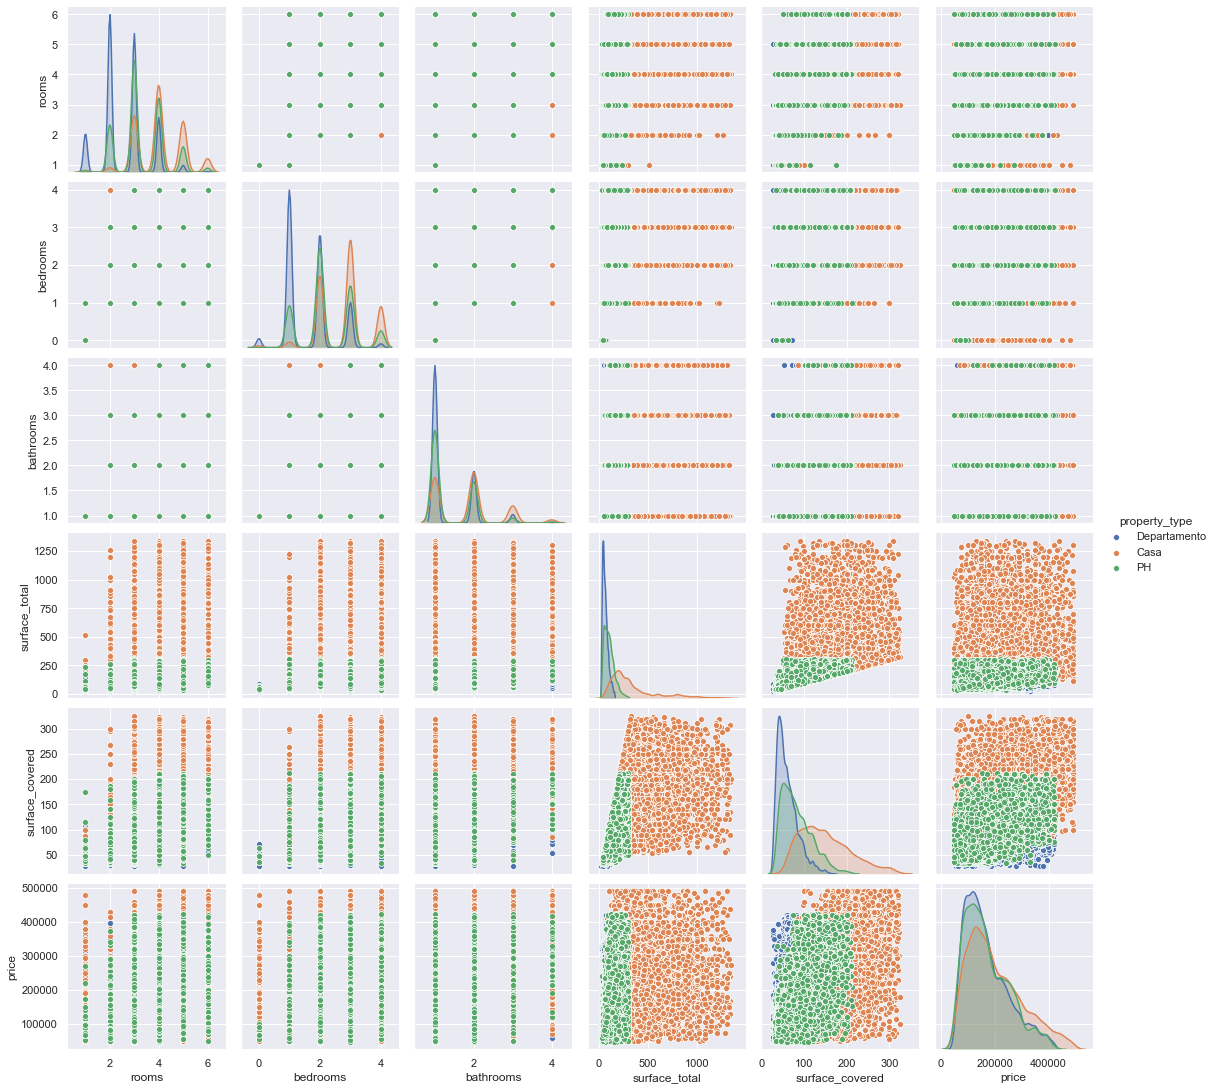

In [130]:
fig = plt.figure(figsize=(12,12))

columns = ["rooms", "bedrooms", "bathrooms", "surface_total", "surface_covered", "price", "property_type"]
sns.pairplot(dataset_clean_personal[columns], hue="property_type")

plt.show()

#### Caso Surface Total and Covered:

Imputé a estos valores faltantes con la clase [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html), luego de analizar si los casos de missing eran MAR, MNAR o MCAR.

In [131]:
dataset_clean_personal['surface_covered-intervalos'] = pd.cut(dataset_clean_personal.surface_covered, bins  = 30)

In [132]:
vf_surface_covered_surface_total = dataset_clean_personal.surface_total.isnull().groupby([dataset_clean_personal['surface_covered-intervalos']]).sum().astype(int).reset_index(name='count')
vf_surface_covered_surface_total.columns


Index(['surface_covered-intervalos', 'count'], dtype='object')

In [133]:
vf_surface_covered_surface_total['freq'] = vf_surface_covered_surface_total['count']/dataset_clean_personal.groupby([dataset_clean_personal['surface_covered-intervalos']]).count()['surface_covered'].values
vf_surface_covered_surface_total['freq'].fillna(0, inplace=True)
vf_surface_covered_surface_total.columns

Index(['surface_covered-intervalos', 'count', 'freq'], dtype='object')

In [134]:
vf_surface_covered_surface_total["bin_centres"] = vf_surface_covered_surface_total["surface_covered-intervalos"].apply(lambda x: x.mid)
vf_surface_covered_surface_total.columns

Index(['surface_covered-intervalos', 'count', 'freq', 'bin_centres'], dtype='object')

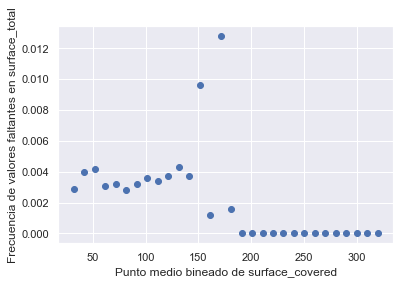

In [135]:
plt.scatter(vf_surface_covered_surface_total['bin_centres'], vf_surface_covered_surface_total['freq'])
plt.xlabel('Punto medio bineado de surface_covered')
plt.ylabel('Frecuencia de valores faltantes en surface_total')
plt.show()

No se encontró relacion de "surface_covered" a "surface_total". 

Analizaremos la causal de "surface_total" a "surface_covered".

In [136]:
dataset_clean_personal['surface_total-intervalos'] = pd.cut(dataset_clean_personal.surface_total, bins  = 30)
dataset_clean_personal.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type', 'surface_total_missing', 'surface_covered_missing',
       'bathrooms_missing', 'surface_total_log', 'surface_covered_log',
       'price_log', 'surface_total_norm', 'surface_covered_norm', 'price_norm',
       'rooms-intervalos', 'surface_covered-intervalos',
       'surface_total-intervalos'],
      dtype='object')

In [137]:
vf_surface_total_surface_covered = dataset_clean_personal.surface_covered.isnull().groupby([dataset_clean_personal['surface_total-intervalos']]).sum().astype(int).reset_index(name='count')
vf_surface_total_surface_covered

surface_total-intervalos  count
0          (25.687, 70.767]    421
1         (70.767, 114.533]    166
2          (114.533, 158.3]     46
3          (158.3, 202.067]     13
4        (202.067, 245.833]      0
5          (245.833, 289.6]      0
6          (289.6, 333.367]      0
7        (333.367, 377.133]      0
8          (377.133, 420.9]      0
9          (420.9, 464.667]      0
10       (464.667, 508.433]      0
11         (508.433, 552.2]      0
12         (552.2, 595.967]      0
13       (595.967, 639.733]      0
14         (639.733, 683.5]      0
15         (683.5, 727.267]      0
16       (727.267, 771.033]      0
17         (771.033, 814.8]      0
18         (814.8, 858.567]      0
19       (858.567, 902.333]      0
20         (902.333, 946.1]      0
21         (946.1, 989.867]      0
22      (989.867, 1033.633]      0
23       (1033.633, 1077.4]      0
24       (1077.4, 1121.167]      0
25     (1121.167, 1164.933]      0
26       (1164.933, 1208.7]      0
27       (1208.7, 1252.467]      0
28     (1252.467, 1296.233]      0
29       (1296.233, 1340.0]      0

In [138]:
vf_surface_total_surface_covered['freq'] = vf_surface_total_surface_covered['count']/dataset_clean_personal.groupby([dataset_clean_personal['surface_total-intervalos']]).count()['surface_total'].values
vf_surface_total_surface_covered['freq'].fillna(0, inplace=True)
vf_surface_total_surface_covered

surface_total-intervalos  count      freq
0          (25.687, 70.767]    421  0.008019
1         (70.767, 114.533]    166  0.005742
2          (114.533, 158.3]     46  0.004569
3          (158.3, 202.067]     13  0.003754
4        (202.067, 245.833]      0  0.000000
5          (245.833, 289.6]      0  0.000000
6          (289.6, 333.367]      0  0.000000
7        (333.367, 377.133]      0  0.000000
8          (377.133, 420.9]      0  0.000000
9          (420.9, 464.667]      0  0.000000
10       (464.667, 508.433]      0  0.000000
11         (508.433, 552.2]      0  0.000000
12         (552.2, 595.967]      0  0.000000
13       (595.967, 639.733]      0  0.000000
14         (639.733, 683.5]      0  0.000000
15         (683.5, 727.267]      0  0.000000
16       (727.267, 771.033]      0  0.000000
17         (771.033, 814.8]      0  0.000000
18         (814.8, 858.567]      0  0.000000
19       (858.567, 902.333]      0  0.000000
20         (902.333, 946.1]      0  0.000000
21         (946.1, 989.867]      0  0.000000
22      (989.867, 1033.633]      0  0.000000
23       (1033.633, 1077.4]      0  0.000000
24       (1077.4, 1121.167]      0  0.000000
25     (1121.167, 1164.933]      0  0.000000
26       (1164.933, 1208.7]      0  0.000000
27       (1208.7, 1252.467]      0  0.000000
28     (1252.467, 1296.233]      0  0.000000
29       (1296.233, 1340.0]      0  0.000000

In [139]:
vf_surface_total_surface_covered["bin_centres"] = vf_surface_total_surface_covered["surface_total-intervalos"].apply(lambda x: x.mid)
vf_surface_total_surface_covered.columns

Index(['surface_total-intervalos', 'count', 'freq', 'bin_centres'], dtype='object')

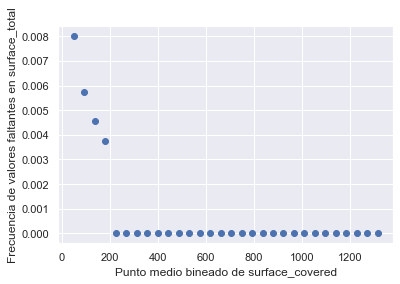

In [140]:
plt.scatter(vf_surface_total_surface_covered['bin_centres'], vf_surface_total_surface_covered['freq'])
plt.xlabel('Punto medio bineado de surface_covered')
plt.ylabel('Frecuencia de valores faltantes en surface_total')
plt.show()


No puedo encontrar una causalidad de  "surface_total" a "surface_covered".

In [141]:
dataset_clean_personal_ml = dataset_clean_personal.copy()

dataset_clean_personal_ml.shape

(117803, 31)

In [142]:
dataset_clean_personal_ml["created_on"] = pd.to_datetime(dataset_clean_personal_ml["created_on"])
dataset_clean_personal_ml["created_on"].dt.year.value_counts()

2019    106448
2020     11355
Name: created_on, dtype: int64

In [143]:
dataset_clean_personal_ml["created_on"].dt.month.value_counts().sort_index()

1     18243
2      7182
3      8357
4      7747
5      7733
6      8191
7     14005
8      9409
9      5750
10     8392
11    15360
12     7434
Name: created_on, dtype: int64

In [144]:
dataset_clean_personal_ml["currency"].value_counts()

USD    117803
Name: currency, dtype: int64

In [145]:
dataset_clean_personal_ml["operation_type"].value_counts()

Venta    117803
Name: operation_type, dtype: int64

In [146]:
dataset_clean_personal_ml.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type', 'surface_total_missing', 'surface_covered_missing',
       'bathrooms_missing', 'surface_total_log', 'surface_covered_log',
       'price_log', 'surface_total_norm', 'surface_covered_norm', 'price_norm',
       'rooms-intervalos', 'surface_covered-intervalos',
       'surface_total-intervalos'],
      dtype='object')

In [147]:
dataset_clean_personal_ml.drop(["start_date","end_date", "lat", "lon", "currency", "operation_type", "l1",
                               "title", "description", "price_log", "price_norm",'rooms-intervalos',
                                'surface_covered-intervalos', 'surface_total-intervalos'], axis=1, inplace=True)

In [148]:
dataset_clean_personal_ml.columns

Index(['created_on', 'l2', 'l3', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'property_type',
       'surface_total_missing', 'surface_covered_missing', 'bathrooms_missing',
       'surface_total_log', 'surface_covered_log', 'surface_total_norm',
       'surface_covered_norm'],
      dtype='object')

Deje de lado las variables:
* "currency": por ser el 100% en USD.
* "operation_type": el total de las instancias eran del tipo venta.
* "price thousands": es una simple transformacion de price.
* "l1" ya que solo se encuentran propiedades en Argentina.
* "title", "description": no tengo las herramientas para tenerlas en cuenta en la regresión.
* "start_date","end_date": al generar dummies para los meses y los años de "created_on" ya no considero necesario tener en cuenta estas variables.

In [149]:
dataset_clean_personal_ml.isna().sum()

created_on                     0
l2                             0
l3                             0
rooms                          0
bedrooms                       0
bathrooms                      0
surface_total              14282
surface_covered            14565
price                          0
property_type                  0
surface_total_missing          0
surface_covered_missing        0
bathrooms_missing              0
surface_total_log          14928
surface_covered_log        14928
surface_total_norm         14928
surface_covered_norm       14928
dtype: int64

In [150]:
left = dataset_clean_personal_ml[["created_on","l2","l3", "price"]]

dataset_clean_personal_ml.drop(["created_on","l2", "l3", "price","surface_total_log","surface_covered_log",
                               "surface_total_norm", "surface_covered_norm"], axis=1, inplace=True)

dataset_clean_personal_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117803 entries, 11 to 132061
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   rooms                    117803 non-null  float64
 1   bedrooms                 117803 non-null  float64
 2   bathrooms                117803 non-null  float64
 3   surface_total            103521 non-null  float64
 4   surface_covered          103238 non-null  float64
 5   property_type            117803 non-null  object 
 6   surface_total_missing    117803 non-null  int32  
 7   surface_covered_missing  117803 non-null  int32  
 8   bathrooms_missing        117803 non-null  int32  
dtypes: float64(5), int32(3), object(1)
memory usage: 12.6+ MB


## Encoding 2:

#### Caso: Property_type:

Genero variables dummy por cada tipo de propiedad para mejorar mi estimación por KNNImputer.

In [151]:
dataset_clean_personal_ml = pd.concat([dataset_clean_personal_ml.drop('property_type', axis=1),
                                       pd.get_dummies(dataset_clean_personal_ml['property_type'])], axis=1)

In [152]:
dataset_clean_personal_ml.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered  \
11    2.0       1.0        1.0           68.0             59.0   
12    2.0       1.0        1.0           50.0             44.0   
15    2.0       1.0        2.0           99.0             84.0   
16    2.0       1.0        1.0           50.0             50.0   
17    2.0       1.0        1.0           53.0             42.0   

    surface_total_missing  surface_covered_missing  bathrooms_missing  Casa  \
11                      0                        0                  0     0   
12                      0                        0                  0     0   
15                      0                        0                  0     0   
16                      0                        0                  0     0   
17                      0                        0                  0     0   

    Departamento  PH  
11             1   0  
12             1   0  
15             1   0  
16             1   0  
17             1   0

In [153]:
(dataset_clean_personal_ml["surface_covered"]<10).sum()

0

In [154]:
imputer = KNNImputer(n_neighbors=3)

X_transf = imputer.fit_transform(dataset_clean_personal_ml)

In [155]:
X_dataframe = pd.DataFrame(X_transf, columns=dataset_clean_personal_ml.columns,index=dataset_clean_personal_ml.index)
X_dataframe.shape

(117803, 11)

In [156]:
X_dataframe["ID"] = np.arange(len(X_dataframe))
left["ID"] = np.arange(len(left))

In [157]:
left.shape

(117803, 5)

In [158]:
X = pd.merge(X_dataframe, left, how='inner', on="ID")
X.shape

(117803, 16)

In [159]:
X.drop("ID", axis=1, inplace=True)

In [160]:
dataset_clean_personal_ml = X

In [161]:
dataset_clean_personal_ml.isna().sum()

rooms                      0
bedrooms                   0
bathrooms                  0
surface_total              0
surface_covered            0
surface_total_missing      0
surface_covered_missing    0
bathrooms_missing          0
Casa                       0
Departamento               0
PH                         0
created_on                 0
l2                         0
l3                         0
price                      0
dtype: int64

## Imputación Lógica 2:

Ya que estimamos valores faltantes tanto en "surface_covered" como en "surface_total", vuelvo a tener la restricción de que "surface_covered" NUNCA puede ser mayor a "surface_total".

In [162]:
dataset_clean_personal_ml['surface_covered'] = np.where(dataset_clean_personal_ml['surface_covered'] > dataset_clean_personal_ml['surface_total'], dataset_clean_personal_ml['surface_total'], dataset_clean_personal_ml['surface_covered'])

## Encoding 3:

#### Caso "l2", "l3", "created_on": 

El siguiente bloque genera dummies por cada barrio observado en la variable "l3".

In [163]:
dataset_clean_personal_ml = pd.concat([dataset_clean_personal_ml.drop('l3', axis=1),
                                       pd.get_dummies(dataset_clean_personal_ml['l3'])], axis=1)
dataset_clean_personal_ml.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered  \
0    2.0       1.0        1.0           68.0             59.0   
1    2.0       1.0        1.0           50.0             44.0   
2    2.0       1.0        2.0           99.0             84.0   
3    2.0       1.0        1.0           50.0             50.0   
4    2.0       1.0        1.0           53.0             42.0   

   surface_total_missing  surface_covered_missing  bathrooms_missing  Casa  \
0                    0.0                      0.0                0.0   0.0   
1                    0.0                      0.0                0.0   0.0   
2                    0.0                      0.0                0.0   0.0   
3                    0.0                      0.0                0.0   0.0   
4                    0.0                      0.0                0.0   0.0   

   Departamento  ...  Villa Lugano Villa Luro Villa Ortuzar  Villa Pueyrredón  \
0           1.0  ...             0          0             0                 0   
1           1.0  ...             0          0             0                 0   
2           1.0  ...             0          0             0                 0   
3           1.0  ...             0          0             0                 0   
4           1.0  ...             0          0             0                 0   

   Villa Real  Villa Riachuelo  Villa Santa Rita  Villa Soldati  \
0           0                0                 0              0   
1           0                0                 0              0   
2           0                0                 0              0   
3           0                0                 0              0   
4           0                0                 0              0   

   Villa Urquiza  Villa del Parque  
0              0                 0  
1              0                 0  
2              0                 0  
3              0                 0  
4              0                 0  

[5 rows x 103 columns]

In [164]:
dataset_clean_personal_ml = pd.concat([dataset_clean_personal_ml.drop('l2', axis=1),
                                       pd.get_dummies(dataset_clean_personal_ml['l2'])], axis=1)
dataset_clean_personal_ml.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered  \
0    2.0       1.0        1.0           68.0             59.0   
1    2.0       1.0        1.0           50.0             44.0   
2    2.0       1.0        2.0           99.0             84.0   
3    2.0       1.0        1.0           50.0             50.0   
4    2.0       1.0        1.0           53.0             42.0   

   surface_total_missing  surface_covered_missing  bathrooms_missing  Casa  \
0                    0.0                      0.0                0.0   0.0   
1                    0.0                      0.0                0.0   0.0   
2                    0.0                      0.0                0.0   0.0   
3                    0.0                      0.0                0.0   0.0   
4                    0.0                      0.0                0.0   0.0   

   Departamento  ...  Villa Real Villa Riachuelo  Villa Santa Rita  \
0           1.0  ...           0               0                 0   
1           1.0  ...           0               0                 0   
2           1.0  ...           0               0                 0   
3           1.0  ...           0               0                 0   
4           1.0  ...           0               0                 0   

   Villa Soldati  Villa Urquiza  Villa del Parque  Bs.As. G.B.A. Zona Norte  \
0              0              0                 0                         0   
1              0              0                 0                         0   
2              0              0                 0                         1   
3              0              0                 0                         1   
4              0              0                 0                         1   

   Bs.As. G.B.A. Zona Oeste  Bs.As. G.B.A. Zona Sur  Capital Federal  
0                         0                       0                1  
1                         0                       0                1  
2                         0                       0                0  
3                         0                       0                0  
4                         0                       0                0  

[5 rows x 106 columns]

In [165]:
dataset_clean_personal_ml.columns.tolist()

['rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'surface_total_missing',
 'surface_covered_missing',
 'bathrooms_missing',
 'Casa',
 'Departamento',
 'PH',
 'created_on',
 'price',
 'Abasto',
 'Agronomía',
 'Almagro',
 'Almirante Brown',
 'Avellaneda',
 'Balvanera',
 'Barracas',
 'Barrio Norte',
 'Belgrano',
 'Berazategui',
 'Boca',
 'Boedo',
 'Caballito',
 'Catalinas',
 'Cañuelas',
 'Centro / Microcentro',
 'Chacarita',
 'Coghlan',
 'Colegiales',
 'Congreso',
 'Constitución',
 'Escobar',
 'Esteban Echeverría',
 'Ezeiza',
 'Florencio Varela',
 'Flores',
 'Floresta',
 'General Rodríguez',
 'General San Martín',
 'Hurlingham',
 'Ituzaingó',
 'José C Paz',
 'La Matanza',
 'La Plata',
 'Lanús',
 'Las Cañitas',
 'Liniers',
 'Lomas de Zamora',
 'Malvinas Argentinas',
 'Marcos Paz',
 'Mataderos',
 'Merlo',
 'Monserrat',
 'Monte Castro',
 'Moreno',
 'Morón',
 'Nuñez',
 'Once',
 'Palermo',
 'Parque Avellaneda',
 'Parque Centenario',
 'Parque Chacabuco',
 'Parque Chas

El siguiente bloque genera dummies por cada año y mes observado en la variable "created_on".

In [166]:
dataset_clean_personal_ml = pd.concat([dataset_clean_personal_ml,
                                       pd.get_dummies(dataset_clean_personal_ml['created_on'].dt.year)], axis=1)
dataset_clean_personal_ml.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered  \
0    2.0       1.0        1.0           68.0             59.0   
1    2.0       1.0        1.0           50.0             44.0   
2    2.0       1.0        2.0           99.0             84.0   
3    2.0       1.0        1.0           50.0             50.0   
4    2.0       1.0        1.0           53.0             42.0   

   surface_total_missing  surface_covered_missing  bathrooms_missing  Casa  \
0                    0.0                      0.0                0.0   0.0   
1                    0.0                      0.0                0.0   0.0   
2                    0.0                      0.0                0.0   0.0   
3                    0.0                      0.0                0.0   0.0   
4                    0.0                      0.0                0.0   0.0   

   Departamento  ...  Villa Santa Rita Villa Soldati  Villa Urquiza  \
0           1.0  ...                 0             0              0   
1           1.0  ...                 0             0              0   
2           1.0  ...                 0             0              0   
3           1.0  ...                 0             0              0   
4           1.0  ...                 0             0              0   

   Villa del Parque  Bs.As. G.B.A. Zona Norte  Bs.As. G.B.A. Zona Oeste  \
0                 0                         0                         0   
1                 0                         0                         0   
2                 0                         1                         0   
3                 0                         1                         0   
4                 0                         1                         0   

   Bs.As. G.B.A. Zona Sur  Capital Federal  2019  2020  
0                       0                1     1     0  
1                       0                1     1     0  
2                       0                0     1     0  
3                       0                0     1     0  
4                       0                0     1     0  

[5 rows x 108 columns]

In [167]:
dataset_clean_personal_ml = pd.concat([dataset_clean_personal_ml.drop('created_on', axis=1),
                                       pd.get_dummies(dataset_clean_personal_ml['created_on'].dt.month)], axis=1)
dataset_clean_personal_ml.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered  \
0    2.0       1.0        1.0           68.0             59.0   
1    2.0       1.0        1.0           50.0             44.0   
2    2.0       1.0        2.0           99.0             84.0   
3    2.0       1.0        1.0           50.0             50.0   
4    2.0       1.0        1.0           53.0             42.0   

   surface_total_missing  surface_covered_missing  bathrooms_missing  Casa  \
0                    0.0                      0.0                0.0   0.0   
1                    0.0                      0.0                0.0   0.0   
2                    0.0                      0.0                0.0   0.0   
3                    0.0                      0.0                0.0   0.0   
4                    0.0                      0.0                0.0   0.0   

   Departamento  ...  3  4  5  6  7  8  9  10  11  12  
0           1.0  ...  0  0  0  0  0  0  0   1   0   0  
1           1.0  ...  0  0  0  0  0  0  0   1   0   0  
2           1.0  ...  0  0  0  0  0  0  0   1   0   0  
3           1.0  ...  0  0  0  0  0  0  0   1   0   0  
4           1.0  ...  0  0  0  0  0  0  0   1   0   0  

[5 rows x 119 columns]

## Cración de Nuevas Variables / Reescalamiento de Datos 2:

#### Caso de Rooms, Bedrooms, Bathrooms:

Genero columnas con los valores observados en dichas columnas al cuadrado y al cubo para analizar si pueden ser mejores predictoras.

In [168]:
dataset_clean_personal_ml[['rooms2', 'bedrooms2', "bathrooms2"]] = dataset_clean_personal_ml[['rooms','bedrooms', 'bathrooms']]**2

dataset_clean_personal_ml[['rooms3', 'bedrooms3', "bathrooms3"]] = dataset_clean_personal_ml[['rooms','bedrooms', 'bathrooms']]**3

#### Caso de Surface total y covered:

Vuelvo a generar columnas con el logaritmo de estas columnas para obtener una distribución normal (o linealizar la distribución en su defecto).

In [169]:
for col in ["surface_total", "surface_covered"]:
    dataset_clean_personal_ml[col+"_log"] = np.log(dataset_clean_personal_ml[col])

departamento = dataset_clean_personal_ml[dataset_clean_personal_ml["Departamento"] == 1]
casa = dataset_clean_personal_ml[dataset_clean_personal_ml["Casa"] == 1]
ph = dataset_clean_personal_ml[dataset_clean_personal_ml["PH"] == 1]

for i in [departamento, casa, ph]:
    for col in ["surface_total_log", "surface_covered_log"]:
        i[col+"_norm"] = (i[col] - i[col].mean()) / i[col].std()

lista = [departamento, casa, ph]
dataset_clean_personal_ml = pd.concat(lista)

dataset_clean_personal_ml = dataset_clean_personal_ml.rename({'surface_total_log_norm': 'surface_total_norm',
                          'surface_covered_log_norm': 'surface_covered_norm'}, axis=1)

C:\Users\ancar\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [170]:
dataset_clean_personal_ml.shape

(117803, 129)

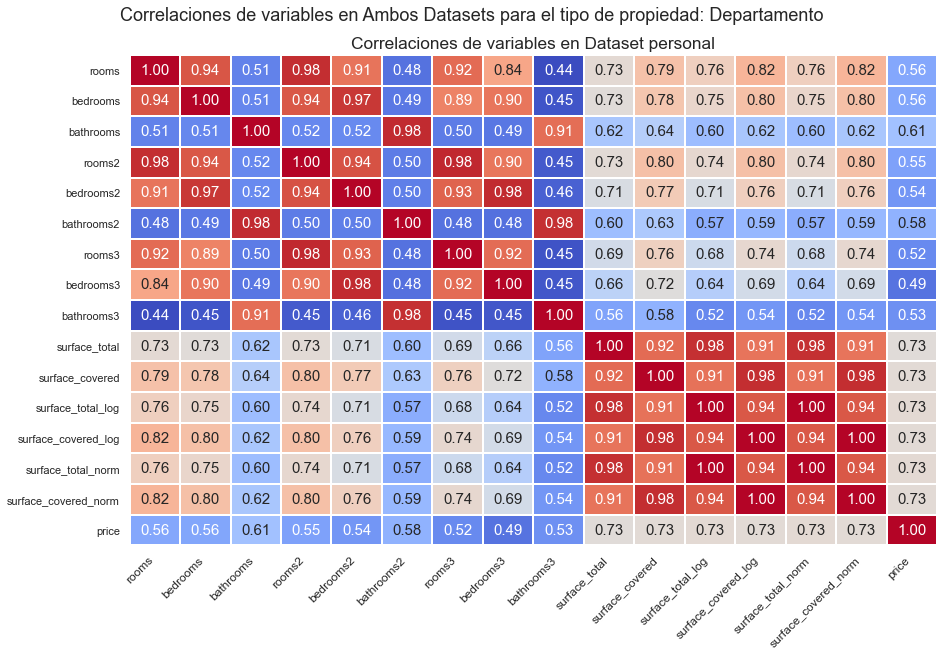

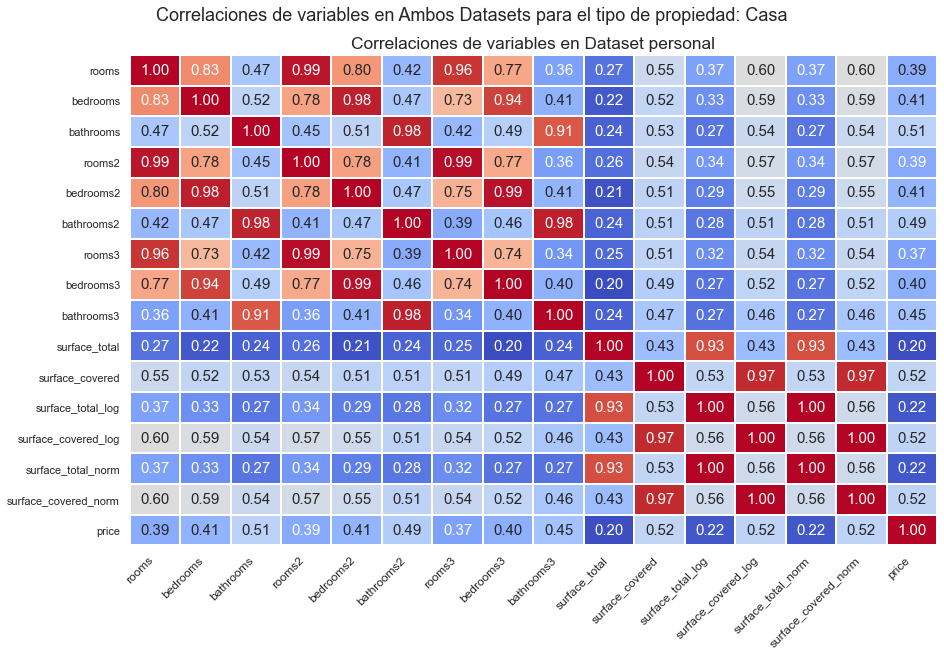

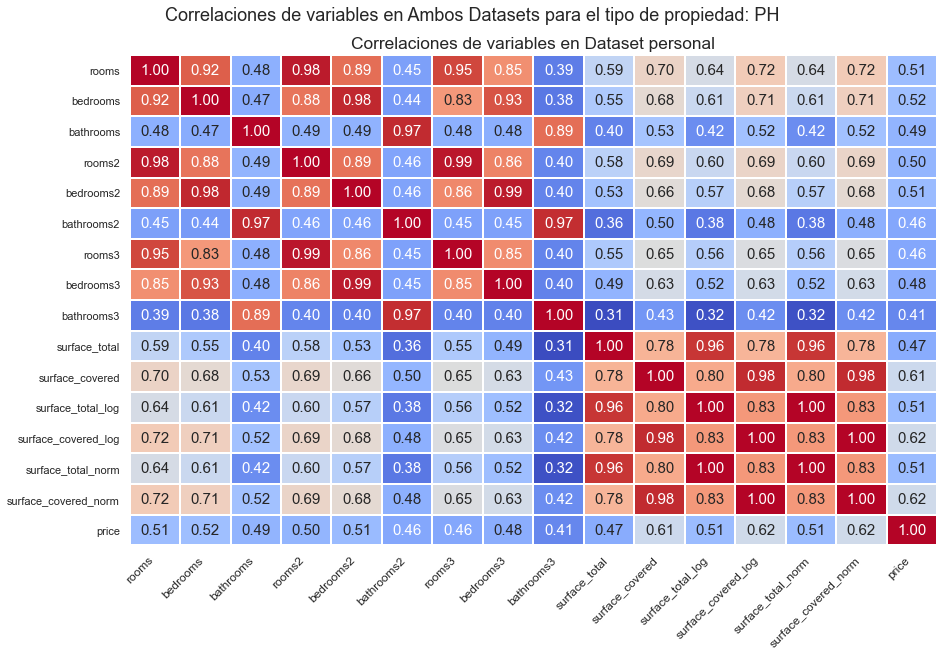

In [171]:
columns = ["rooms", "bedrooms", "bathrooms", "rooms2", "bedrooms2", "bathrooms2",'rooms3', 'bedrooms3', "bathrooms3",
            "surface_total", "surface_covered",'surface_total_log', 'surface_covered_log','surface_total_norm',
           'surface_covered_norm', "price"]

for tipo in ["Departamento", "Casa", "PH"]:
    fig, ax1 = plt.subplots(1,1, figsize=(13,9), constrained_layout=True)
    
    data = dataset_clean_personal_ml[dataset_clean_personal_ml[tipo] == 1]
    corr = data[columns].corr(method="pearson")
    sns.heatmap(corr, cbar = False,  square = False, annot=True, fmt= '.2f',annot_kws={'size': 15},
               cmap= 'coolwarm', linewidths=1, ax=ax1)
    ax1.set_xticklabels(data[columns].columns,rotation = 45, fontsize = 12,horizontalalignment= 'right')
    ax1.set_title("Correlaciones de variables en Dataset personal", fontsize='x-large')

    plt.suptitle(f"Correlaciones de variables en Ambos Datasets para el tipo de propiedad: {tipo}", fontsize=18)

## Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

In [172]:
X = dataset_clean_personal_ml.drop(["price"], axis=1)
y = dataset_clean_personal_ml.price

In [173]:
scl = StandardScaler()
X2 = pd.DataFrame(scl.fit_transform(X), columns=X.columns)

In [175]:
pca = PCA(n_components=0.999)
X_trans = pca.fit_transform(X)

In [176]:
X_trans.shape

(117803, 5)

# Parte B: Machine Learning

### Selección de variables y separación de dataset en train & test

Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`).

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(82462, 128) (82462,) (35341, 128) (35341,)


In [178]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_trans, y, test_size=0.3, random_state=55)

print(X_pca_train.shape, X_pca_test.shape, y_pca_train.shape, y_pca_test.shape)

(82462, 5) (35341, 5) (82462,) (35341,)


In [179]:
X_pca_train

array([[ 1.59460494e+02, -1.78663327e+02, -4.61946303e+01,
         5.70170605e-01,  1.51097496e+01],
       [ 9.16759112e+00, -3.70596138e+01, -9.57927731e+00,
         3.12439580e+00, -3.73539936e+00],
       [-8.68418084e+01,  2.95025354e+01, -5.82211093e+00,
         1.80715760e+00, -1.30697605e+00],
       ...,
       [-1.96536321e+01, -5.16511043e+00,  1.05298667e+01,
         2.09261408e+00,  2.55663248e+00],
       [-8.55737879e+01,  2.42440030e+01, -1.02953264e+01,
         5.57158420e-01,  6.77853982e-01],
       [-7.95790472e+01,  2.28253964e+01, -6.85193842e+00,
         5.39086975e-02,  6.05020094e-01]])

In [180]:
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X2, y, test_size=0.3, random_state=55)

print(X_std_train.shape, X_std_test.shape, y_std_train.shape, y_std_test.shape)

(82462, 128) (35341, 128) (82462,) (35341,)


In [181]:
X_std_train.head()

rooms  bedrooms  bathrooms  surface_total  surface_covered  \
90876   3.003002  2.412110   2.569611       0.840324         2.606192   
65962   1.103712  1.295943   0.965580      -0.011580         0.388172   
13469  -1.745222 -0.936391  -0.638451      -0.601359        -1.049884   
110602  0.154067  0.179776   0.965580       0.299692         0.656285   
50638   0.154067  0.179776  -0.638451      -0.339235        -0.367417   

        surface_total_missing  surface_covered_missing  bathrooms_missing  \
90876               -0.371433                -0.375609          -0.176986   
65962               -0.371433                -0.375609          -0.176986   
13469               -0.371433                -0.375609          -0.176986   
110602              -0.371433                -0.375609          -0.176986   
50638               -0.371433                -0.375609          -0.176986   

            Casa  Departamento  ...    rooms2  bedrooms2  bathrooms2  \
90876   2.643226     -1.829693  ...  4.061041   3.121001    2.802008   
65962  -0.378326      0.546540  ...  1.034731   1.272011    0.697403   
13469  -0.378326      0.546540  ... -1.235001  -0.841121   -0.565360   
110602 -0.378326     -1.829693  ... -0.024477  -0.048697    0.697403   
50638  -0.378326      0.546540  ... -0.024477  -0.048697   -0.565360   

          rooms3  bedrooms3  bathrooms3  surface_total_log  \
90876   5.112800   3.703883    2.785826           1.516019   
65962   0.871138   1.119030    0.409660           0.415613   
13469  -0.886919  -0.697354   -0.465770          -1.500227   
110602 -0.161372  -0.208327    0.409660           0.911364   
50638  -0.161372  -0.208327   -0.465770          -0.363761   

        surface_covered_log  surface_total_norm  surface_covered_norm  
90876              2.185832           -0.310465              0.788248  
65962              0.678052            1.265262              1.256686  
13469             -1.649892           -1.917338             -1.749402  
110602             0.927523            0.777731              0.650735  
50638             -0.238606           -0.029437              0.072999  

[5 rows x 128 columns]

### Estimaciones del Modelo Benchmark:

Intentaré mejorar mi estimación con un RMSE en test de **41675.33**

#### Modelos utilizados:

In [182]:
linear_model = LinearRegression()
bagging = BaggingRegressor()
forest = RandomForestRegressor()
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=10), n_estimators=250)
xgb = XGBRegressor()
tree = DecisionTreeRegressor()
ridge = Ridge()

#### Primer modelo: DecisionTreeRegressor del Proyecto Anterior

In [183]:
proyecto1 = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=38,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

proyecto1.fit(X_train, y_train)

y_train_pred_proyecto1 = proyecto1.predict(X_train)
y_test_pred_proyecto1 = proyecto1.predict(X_test)

rmse_train_proyecto1 = np.sqrt(mean_squared_error(y_train, y_train_pred_proyecto1))
rmse_test_proyecto1 = np.sqrt(mean_squared_error(y_test, y_test_pred_proyecto1))
print("El error cuadrático medio del modelo benchmark para train normal es:",rmse_train_proyecto1)
print("El error cuadrático medio del modelo benchmark para test normal es:",rmse_test_proyecto1)

El error cuadrático medio del modelo benchmark para train normal es: 16961.969156118575
El error cuadrático medio del modelo benchmark para test normal es: 46890.56171803258


In [184]:
proyecto1_pca = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=38,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

proyecto1_pca.fit(X_pca_train, y_pca_train)

y_pca_train_pred_proyecto1 = proyecto1_pca.predict(X_pca_train)
y_pca_test_pred_proyecto1 = proyecto1_pca.predict(X_pca_test)

rmse_pca_train_proyecto1 = np.sqrt(mean_squared_error(y_pca_train, y_pca_train_pred_proyecto1))
rmse_pca_test_proyecto1 = np.sqrt(mean_squared_error(y_pca_test, y_pca_test_pred_proyecto1))
print("El error cuadrático medio del modelo benchmark para train pca es:",rmse_pca_train_proyecto1)
print("El error cuadrático medio del modelo benchmark para test pca es:",rmse_pca_test_proyecto1)

El error cuadrático medio del modelo benchmark para train pca es: 15547.697124194627
El error cuadrático medio del modelo benchmark para test pca es: 58165.15085975292


In [185]:
proyecto1_std = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=38,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

proyecto1_std.fit(X_std_train, y_std_train)

y_std_train_pred_proyecto1 = proyecto1_std.predict(X_std_train)
y_std_test_pred_proyecto1 = proyecto1_std.predict(X_std_test)

rmse_std_train_proyecto1 = np.sqrt(mean_squared_error(y_std_train, y_std_train_pred_proyecto1))
rmse_std_test_proyecto1 = np.sqrt(mean_squared_error(y_std_test, y_std_test_pred_proyecto1))
print("El error cuadrático medio del modelo benchmark para train std es:",rmse_std_train_proyecto1)
print("El error cuadrático medio del modelo benchmark para test std es:",rmse_std_test_proyecto1)

El error cuadrático medio del modelo benchmark para train std es: 16961.969156118575
El error cuadrático medio del modelo benchmark para test std es: 46890.152236279646


**Consigna**: 
* Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe.

El modelo del proyecto 1 es mas eficiente para los datos del primer proyecto ya que los hiperparametros estan optimizados acorde a los datos anteriores.

#### Segundo modelo: DecisionTreeRegressor optimizado mediante RandomSearchCV

In [186]:
param_tree = {"criterion": ["mse", "friedman_mse"],
             "max_depth": sp.stats.randint(2, 20),
             "min_samples_split": sp.stats.randint(2, 20)}

In [187]:
tree_opt = RandomizedSearchCV(tree, param_tree, n_iter=100, random_state=42, cv=5)

tree_opt.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'criterion': ['mse', 'friedman_mse'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000141E4F4E708>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000141CF5C8608>},
                   random_state=42)

In [188]:
y_train_pred_tree_opt = tree_opt.predict(X_train)
y_test_pred_tree_opt = tree_opt.predict(X_test)

rmse_train_tree_opt = np.sqrt(mean_squared_error(y_train, y_train_pred_tree_opt))
rmse_test_tree_opt = np.sqrt(mean_squared_error(y_test, y_test_pred_tree_opt))
print("El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para train normal es:",rmse_train_tree_opt)
print("El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para test normal es:",rmse_test_tree_opt)

El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para train normal es: 36395.3156132171
El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para test normal es: 44868.00866587137


In [189]:
tree_opt2 = RandomizedSearchCV(tree, param_tree, n_iter=100, random_state=42, cv=5)

tree_opt2.fit(X_pca_train, y_pca_train)

y_pca_train_pred_tree_opt2 = tree_opt2.predict(X_pca_train)
y_pca_test_pred_tree_opt2 = tree_opt2.predict(X_pca_test)

rmse_pca_train_tree_opt2 = np.sqrt(mean_squared_error(y_pca_train, y_pca_train_pred_tree_opt2))
rmse_pca_test_tree_opt2 = np.sqrt(mean_squared_error(y_pca_test, y_pca_test_pred_tree_opt2))
print("El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para train pca es:",rmse_pca_train_tree_opt2)
print("El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para test pca es:",rmse_pca_test_tree_opt2)

El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para train pca es: 47425.42368913856
El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para test pca es: 55696.37304584163


In [190]:
tree_opt3 = RandomizedSearchCV(tree, param_tree, n_iter=100, random_state=42, cv=5)

tree_opt3.fit(X_std_train, y_std_train)

y_std_train_pred_tree_opt3 = tree_opt3.predict(X_std_train)
y_std_test_pred_tree_opt3 = tree_opt3.predict(X_std_test)

rmse_std_train_tree_opt3 = np.sqrt(mean_squared_error(y_std_train, y_std_train_pred_tree_opt3))
rmse_std_test_tree_opt3 = np.sqrt(mean_squared_error(y_std_test, y_std_test_pred_tree_opt3))
print("El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para train std es:",rmse_std_train_tree_opt3)
print("El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para test std es:",rmse_std_test_tree_opt3)

El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para train std es: 36395.3156132171
El error cuadrático medio del modelo DecisionTreeRegressor optimizado mediante RandomSearchCV para test std es: 44861.47362667252


#### Tercer modelo: BaggingRegressor con DecisionTreeRegressor

In [191]:
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        bootstrap = True,
                        bootstrap_features= False,
                        n_estimators = 1000,
                        n_jobs = -1)
bagging2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        bootstrap = True,
                        bootstrap_features= False,
                        n_estimators = 1000,
                        n_jobs = -1)
bagging3 = BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                        bootstrap = True,
                        bootstrap_features= False,
                        n_estimators = 1000,
                        n_jobs = -1)

In [192]:
bagging.fit(X_train, y_train)
bagging2.fit(X_pca_train, y_pca_train)
bagging3.fit(X_std_train, y_std_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                 n_jobs=-1)

In [193]:
y_train_pred_bagging = bagging.predict(X_train)
y_test_pred_bagging = bagging.predict(X_test)

rmse_train_bagging = np.sqrt(mean_squared_error(y_train, y_train_pred_bagging))
rmse_test_bagging = np.sqrt(mean_squared_error(y_test, y_test_pred_bagging))
print("El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para train normal es:",rmse_train_bagging)
print("El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para test normal es:",rmse_test_bagging)

El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para train normal es: 19360.282254399535
El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para test normal es: 37351.45436621695


In [194]:
y_pca_train_pred_bagging2 = bagging2.predict(X_pca_train)
y_pca_test_pred_bagging2 = bagging2.predict(X_pca_test)

rmse_pca_train_bagging2 = np.sqrt(mean_squared_error(y_pca_train, y_pca_train_pred_bagging2))
rmse_pca_test_bagging2 = np.sqrt(mean_squared_error(y_pca_test, y_pca_test_pred_bagging2))
print("El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para train pca es:",rmse_pca_train_bagging2)
print("El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para test pca es:",rmse_pca_test_bagging2)

El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para train pca es: 22295.41440547389
El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para test pca es: 47752.62407801662


In [195]:
y_std_train_pred_bagging3 = bagging3.predict(X_std_train)
y_std_test_pred_bagging3 = bagging3.predict(X_std_test)

rmse_std_train_bagging3 = np.sqrt(mean_squared_error(y_std_train, y_std_train_pred_bagging3))
rmse_std_test_bagging3 = np.sqrt(mean_squared_error(y_std_test, y_std_test_pred_bagging3))
print("El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para train std es:",rmse_std_train_bagging3)
print("El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para test std es:",rmse_std_test_bagging3)

El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para train std es: 19362.483173127734
El error cuadrático medio del BaggingRegressor con DecisionTreeRegressor para test std es: 37356.8952924944


#### Cuarto modelo: RandomForest (Modelo Ganador)

In [196]:
forest = RandomForestRegressor(n_estimators=1000, 
                             max_features="sqrt", 
                             n_jobs=-1, 
                             oob_score = False, 
                             random_state = 42)

forest.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [197]:
y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)

rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_pred_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_pred_forest))
print("El error cuadrático medio del RandomForest para train normal es:",rmse_train_forest)
print("El error cuadrático medio del RandomForest para test normal es:",rmse_test_forest)

El error cuadrático medio del RandomForest para train normal es: 19324.970251233033
El error cuadrático medio del RandomForest para test normal es: 37282.399991250655


In [198]:
forest2 = RandomForestRegressor(n_estimators=1000, 
                             max_features="sqrt", 
                             n_jobs=-1, 
                             oob_score = False, 
                             random_state = 42)

forest2.fit(X_pca_train, y_pca_train)

y_pca_train_pred_forest2 = forest2.predict(X_pca_train)
y_pca_test_pred_forest2 = forest2.predict(X_pca_test)

rmse_pca_train_forest2 = np.sqrt(mean_squared_error(y_pca_train, y_pca_train_pred_forest2))
rmse_pca_test_forest2 = np.sqrt(mean_squared_error(y_pca_test, y_pca_test_pred_forest2))
print("El error cuadrático medio del RandomForest para train pca es:",rmse_pca_train_forest2)
print("El error cuadrático medio del RandomForest para test pca es:",rmse_pca_test_forest2)

El error cuadrático medio del RandomForest para train pca es: 22249.36917511563
El error cuadrático medio del RandomForest para test pca es: 47557.59808629047


In [199]:
forest3 = RandomForestRegressor(n_estimators=1000, 
                             max_features="sqrt", 
                             n_jobs=-1, 
                             oob_score = False, 
                             random_state = 42)

forest3.fit(X_std_train, y_std_train)

y_std_train_pred_forest3 = forest3.predict(X_std_train)
y_std_test_pred_forest3 = forest3.predict(X_std_test)

rmse_std_train_forest3 = np.sqrt(mean_squared_error(y_std_train, y_std_train_pred_forest3))
rmse_std_test_forest3 = np.sqrt(mean_squared_error(y_std_test, y_std_test_pred_forest3))
print("El error cuadrático medio del RandomForest para train std es:",rmse_std_train_forest3)
print("El error cuadrático medio del RandomForest para test std es:",rmse_std_test_forest3)

El error cuadrático medio del RandomForest para train std es: 19325.33863109355
El error cuadrático medio del RandomForest para test std es: 37284.77897195723


#### Quinto modelo: AdaBoost optimizado con RandomSearchCV

In [200]:
param_ada = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

In [201]:
adaboost = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_ada,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

adaboost2 = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_ada,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

adaboost3 = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_ada,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

In [202]:
adaboost.fit(X_train, y_train)
adaboost2.fit(X_pca_train, y_pca_train)
adaboost3.fit(X_std_train, y_std_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [203]:
y_train_pred_adaboost = adaboost.predict(X_train)
y_test_pred_adaboost = adaboost.predict(X_test)

rmse_train_adaboost = np.sqrt(mean_squared_error(y_train, y_train_pred_adaboost))
rmse_test_adaboost = np.sqrt(mean_squared_error(y_test, y_test_pred_adaboost))
print("El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para train normal es:",rmse_train_adaboost)
print("El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para test normal es:",rmse_test_adaboost)

El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para train normal es: 57557.995995014346
El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para test normal es: 57968.64118190369


In [204]:
y_pca_train_pred_adaboost2 = adaboost2.predict(X_pca_train)
y_pca_test_pred_adaboost2 = adaboost2.predict(X_pca_test)

rmse_pca_train_adaboost2 = np.sqrt(mean_squared_error(y_pca_train, y_pca_train_pred_adaboost2))
rmse_pca_test_adaboost2 = np.sqrt(mean_squared_error(y_pca_test, y_pca_test_pred_adaboost2))
print("El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para train pca es:",rmse_pca_train_adaboost2)
print("El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para test pca es:",rmse_pca_test_adaboost2)

El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para train pca es: 62599.59065281209
El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para test pca es: 62812.13049347601


In [205]:
y_std_train_pred_adaboost3 = adaboost3.predict(X_std_train)
y_std_test_pred_adaboost3 = adaboost3.predict(X_std_test)

rmse_std_train_adaboost3 = np.sqrt(mean_squared_error(y_std_train, y_std_train_pred_adaboost3))
rmse_std_test_adaboost3 = np.sqrt(mean_squared_error(y_std_test, y_std_test_pred_adaboost3))
print("El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para train std es:",rmse_std_train_adaboost3)
print("El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para test std es:",rmse_std_test_adaboost3)

El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para train std es: 57178.00285584092
El error cuadrático medio del AdaBoost optimizado con RandomSearchCV para test std es: 57585.76796505781


#### Sexto Modelo: Polinomial Regression.

In [206]:
linear = LinearRegression()

linear.fit(X_train, y_train)

y_train_pred_linear = linear.predict(X_train)
y_test_pred_linear = linear.predict(X_test)

rmse_train_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
print("El error cuadrático medio del Polinomial Regression para train normal es:",rmse_train_linear)
print("El error cuadrático medio del Polinomial Regression para test normal es:",rmse_test_linear)

El error cuadrático medio del Polinomial Regression para train normal es: 46287.70643766925
El error cuadrático medio del Polinomial Regression para test normal es: 46332.6908709951


In [207]:
linear2 = LinearRegression()

linear2.fit(X_pca_train, y_pca_train)

y_pca_train_pred_linear2 = linear2.predict(X_pca_train)
y_pca_test_pred_linear2 = linear2.predict(X_pca_test)

rmse_pca_train_linear2 = np.sqrt(mean_squared_error(y_pca_train, y_pca_train_pred_linear2))
rmse_pca_test_linear2 = np.sqrt(mean_squared_error(y_pca_test, y_pca_test_pred_linear2))
print("El error cuadrático medio del Polinomial Regression para train pca es:",rmse_pca_train_linear2)
print("El error cuadrático medio del Polinomial Regression para test pca es:",rmse_pca_test_linear2)

El error cuadrático medio del Polinomial Regression para train pca es: 66072.62886873167
El error cuadrático medio del Polinomial Regression para test pca es: 66400.81805994696


In [208]:
linear3 = LinearRegression()

linear3.fit(X_std_train, y_std_train)

y_std_train_pred_linear3 = linear3.predict(X_std_train)
y_std_test_pred_linear3 = linear3.predict(X_std_test)

rmse_std_train_linear3 = np.sqrt(mean_squared_error(y_std_train, y_std_train_pred_linear3))
rmse_std_test_linear3 = np.sqrt(mean_squared_error(y_std_test, y_std_test_pred_linear3))
print("El error cuadrático medio del Polinomial Regression para train std es:",rmse_std_train_linear3)
print("El error cuadrático medio del Polinomial Regression para test std es:",rmse_std_test_linear3)

El error cuadrático medio del Polinomial Regression para train std es: 46295.35454437128
El error cuadrático medio del Polinomial Regression para test std es: 46349.5687438458


#### Séptimo Modelo: Ridge Regression optimizado mediante RandomSearchCV 

In [209]:
params_ridge = {"alpha": [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

In [210]:
ridge1 = RandomizedSearchCV(ridge, param_distributions = params_ridge, cv=3, n_iter = 10, n_jobs=-1)
ridge2 = RandomizedSearchCV(ridge, param_distributions = params_ridge, cv=3, n_iter = 10, n_jobs=-1)
ridge3 = RandomizedSearchCV(ridge, param_distributions = params_ridge, cv=3, n_iter = 10, n_jobs=-1)

In [211]:
ridge1.fit(X_train, y_train)

y_train_pred_ridge1 = ridge1.predict(X_train)
y_test_pred_ridge1 = ridge1.predict(X_test)

rmse_train_ridge1 = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge1))
rmse_test_ridge1 = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge1))
print("El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para train normal es:",rmse_train_ridge1)
print("El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para test normal es:",rmse_test_ridge1)

El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para train normal es: 46287.87739467815
El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para test normal es: 46333.42483980987


In [212]:
ridge2.fit(X_pca_train, y_pca_train)

y_train_pred_ridge2 = ridge2.predict(X_pca_train)
y_test_pred_ridge2 = ridge2.predict(X_pca_test)

rmse_train_ridge2 = np.sqrt(mean_squared_error(y_pca_train, y_train_pred_ridge2))
rmse_test_ridge2 = np.sqrt(mean_squared_error(y_pca_test, y_test_pred_ridge2))
print("El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para train pca es:",rmse_train_ridge2)
print("El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para test pca es:",rmse_test_ridge2)

El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para train pca es: 66072.62886880344
El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para test pca es: 66400.81658057791


In [213]:
ridge3.fit(X_std_train, y_std_train)

y_train_pred_ridge3 = ridge3.predict(X_std_train)
y_test_pred_ridge3 = ridge3.predict(X_std_test)

rmse_train_ridge3 = np.sqrt(mean_squared_error(y_std_train, y_train_pred_ridge3))
rmse_test_ridge3 = np.sqrt(mean_squared_error(y_std_test, y_test_pred_ridge3))
print("El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para train std es:",rmse_train_ridge3)
print("El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para test std es:",rmse_test_ridge3)

El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para train std es: 46288.3440567665
El error cuadrático medio del Ridge Regression optimizado mediante RandomSearchCV para test std es: 46332.542018376385


**Consigna**:
* Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

El desempeño obtenido en el presente proyecto mejora la estimación en un 10% con respecto al modelo anterior. 

Pero esta comparación no es tan lineal ya que el modelo del proyecto 2 tiene la capacidad de predecir el precio de propiedades ubicadas no solo en Capital Federal, sino que también estima el precio de los ubicados en el Gran Buenos Aires. Esto si es una mejora significativa con respecto al proyecto anterior. Lo que me convence a elegir a este nuevo modelo como el recomendable.

Modelo: Proyecto 1
Raíz del error cuadrático medio en Train: 16961.969156118575
Raíz del error cuadrático medio en Test: 46890.56171803258


C:\Users\ancar\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


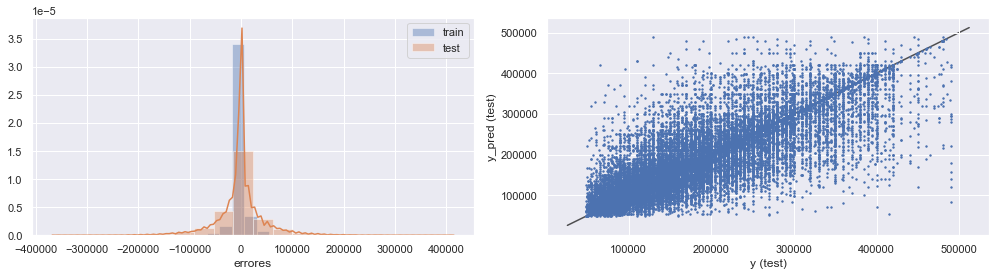

Modelo: Random Forest
Raíz del error cuadrático medio en Train: 19324.970251233033
Raíz del error cuadrático medio en Test: 37282.399991250655


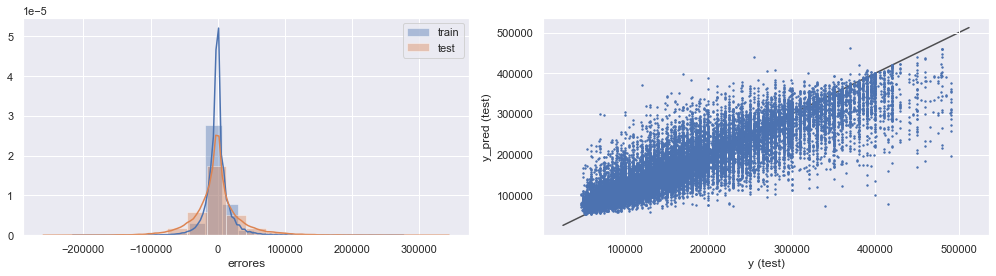

In [214]:
modelos = ['Proyecto 1', 'Random Forest']

for i, model in enumerate([proyecto1, forest]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print(f'Modelo: {modelos[i]}')

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (14,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

# PARTE C - Interpretación de modelos


De acuerdo a lo que el modelo permite, responde algunas o todas las siguientes preguntas:

¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no? Si usaste una regresión lineal con regularización, presta atención a los parámetros (pendientes) obtenidas. Si usaste un modelo de **ensamble en árboles**, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes. ¿En qué se diferencian esos árboles? ¿Por qué? Finalmente, responde, ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

* Utilicé un modelo de Random Forest (uno de los casos particulares de ensamble de árboles. 

In [215]:
forest.feature_importances_

array([2.08829455e-02, 1.67956918e-02, 5.48095779e-02, 6.79372088e-02,
       7.61602100e-02, 2.34035779e-03, 2.26730135e-03, 1.57878585e-03,
       4.50167592e-03, 6.27792173e-03, 3.79539068e-03, 2.34721205e-04,
       1.35502696e-04, 2.97445356e-03, 8.98482229e-04, 9.51663445e-04,
       3.21391947e-03, 9.06251960e-04, 3.92369119e-03, 1.07231315e-02,
       9.23097655e-04, 7.06601062e-04, 6.81106325e-04, 2.78651233e-03,
       3.03438474e-06, 7.98461979e-05, 4.13306460e-04, 5.66762862e-04,
       6.21702393e-04, 1.61607908e-03, 7.08677984e-04, 1.15737474e-03,
       1.20090635e-03, 6.33961091e-04, 4.89357757e-04, 2.92924125e-04,
       2.26822216e-03, 1.21591026e-03, 2.30059975e-04, 2.94936707e-03,
       2.70605212e-04, 8.96697620e-04, 6.68970408e-04, 1.90597527e-03,
       3.30939125e-03, 1.76761534e-03, 1.61846247e-03, 9.06578149e-04,
       9.92910079e-04, 5.60260370e-04, 9.53905485e-06, 1.10347214e-03,
       5.14076375e-04, 1.03330031e-03, 4.34618530e-04, 9.64104142e-04,
      

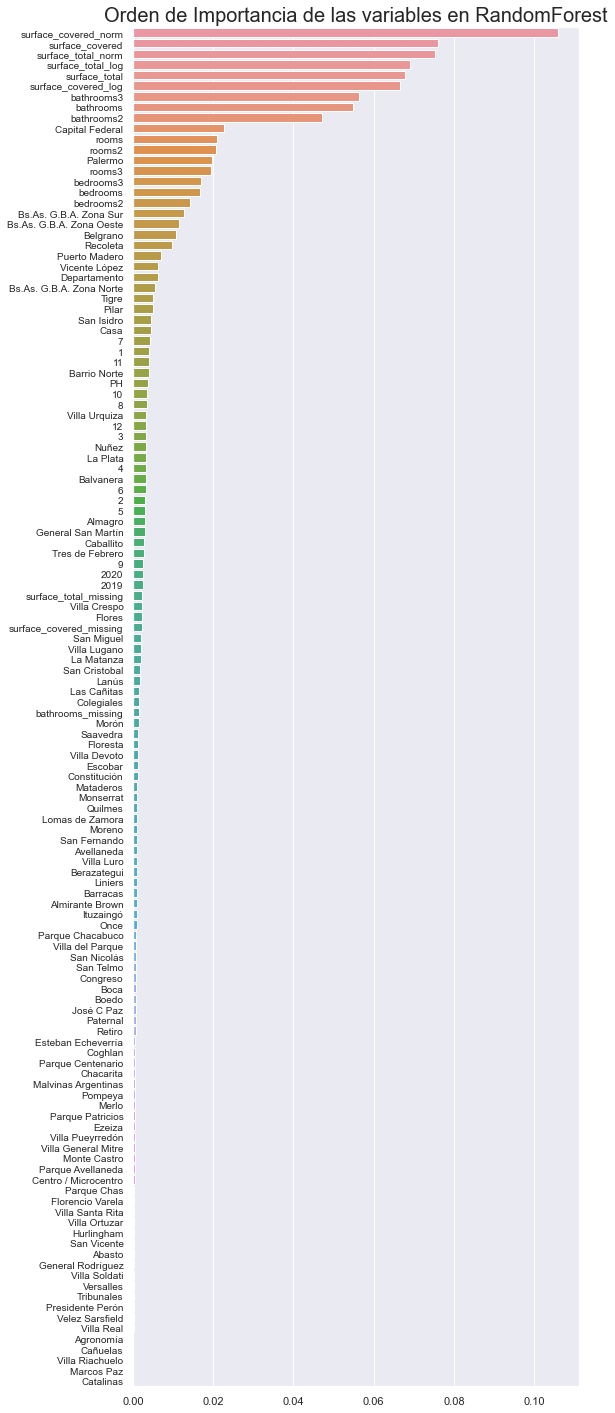

In [216]:
importances = forest.feature_importances_
columns = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (8,25))
plt.title("Orden de Importancia de las variables en RandomForest", fontsize= 20)
plt.yticks(rotation= 0, fontsize= 10, horizontalalignment= 'right')
sns.barplot(y=columns[indices], x=importances[indices])
plt.show()

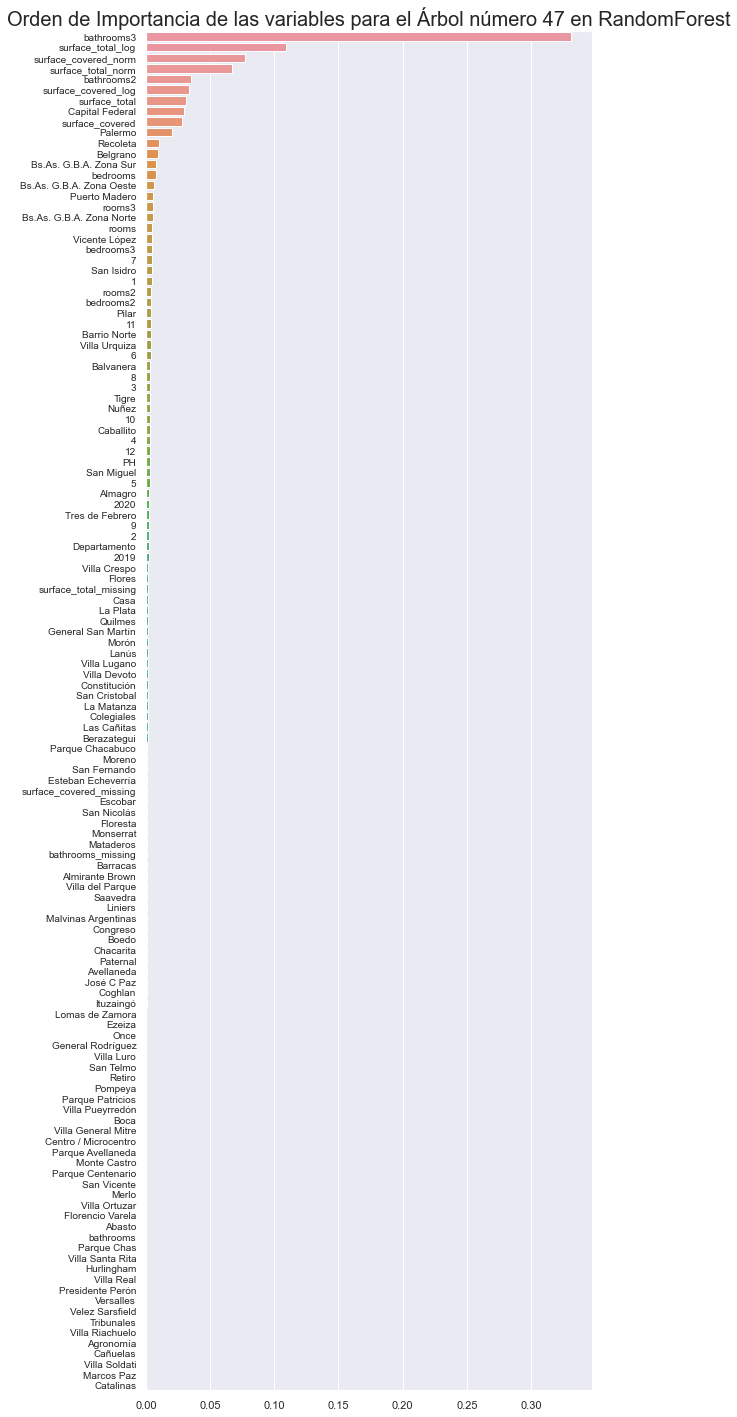

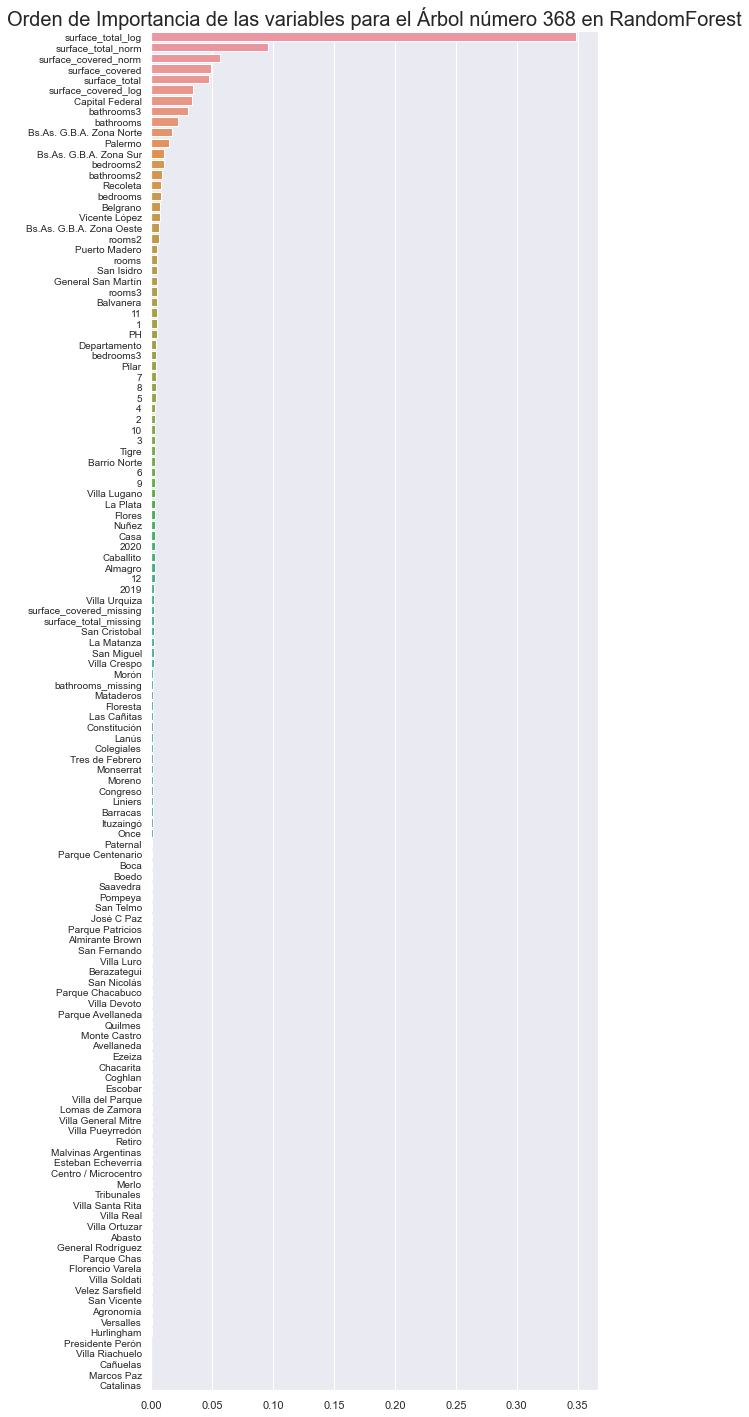

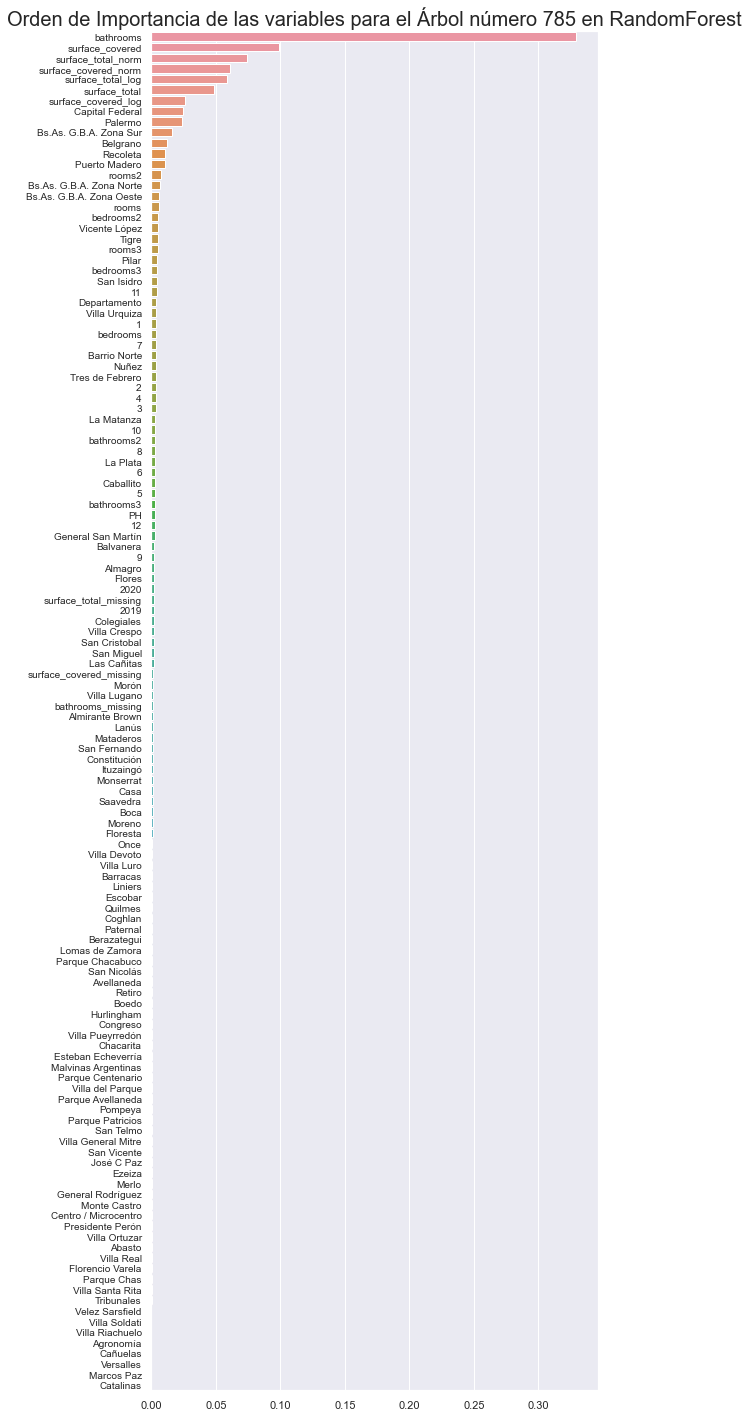

In [217]:
for i in [47,368,785]:
    importances = forest.estimators_[i].feature_importances_
    columns = X_train.columns
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize = (8,25))
    plt.title(f"Orden de Importancia de las variables para el Árbol número {i} en RandomForest", fontsize= 20)
    plt.yticks(rotation= 0, fontsize= 10, horizontalalignment= 'right')
    sns.barplot(y=columns[indices], x=importances[indices])
    plt.show()

**Consigna**: ¿En qué se diferencian esos árboles? ¿Por qué?

Un Forest se genera con múltiples cantidades de Árboles de Decisión, a cada árbol le pasamos un subconjunto del set de entrenamiento (intancias) y, a diferencia de otros métodos de ensamble, también le pasamos un subconjunto del total de features. Entonces todos los árboles son distintos, porque vieron distintas instancias y distintos atributos.

Es por ello que vemos como cambia la importancia de cada feature en los árboles presentados anteriormente.

**Consigna**: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

El Árbol que otorga mayor importancia a la variable surface_total_log es lo que esperaba ver. Pero que el resto de los árboles otorguen una importancia alta al feature "bathrooms" y "bathrooms3" (la cual es baños^3), si me llamó la atención.

**Consigna**: ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? ¿Dónde falla? ¿A qué se debe?

Creo que el sesgo mayor se nota en aquellas propiedades con precios altos. Esto puede que se deba a falta de información sobre algunas propiedades como:

* _Tiene o no Terraza_ (caso Departamentos)
* _Tiene o no Asador_
* _Tiene o no Pileta_
* _Tiene o no Quincho_
* _Distancia a lugares importantes_ como: playa, centros de las ciudades, lagos.
* _Costos fijos_
* _Antigüedad_
* _Remodelado o no_
* _Seguridad Privada_
* _Calidad de pisos, paredes, terminaciones_

# DESAFÍO OPCIONAL

## Proyecto 1:

**Consigna**: En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

**Respuesta**:
Para el desafío voy a calcular el precio promedio de departamentos de una habitación y un solo baño, por barrio para tener un proxy del valor de la ubicación en los precios

In [218]:
desafio = dataset_clean_personal[(dataset_clean_personal["bedrooms"] == 1) & 
                                 (dataset_clean_personal["property_type"] == "Departamento")
                                 & (dataset_clean_personal["bathrooms"] == 1)]

desafio.shape

(39400, 31)

In [219]:
desafio = desafio[desafio["surface_covered"] == 40]
desafio.shape

(2757, 31)

In [220]:
columns = ["price","l3"]
desafio = desafio[columns]

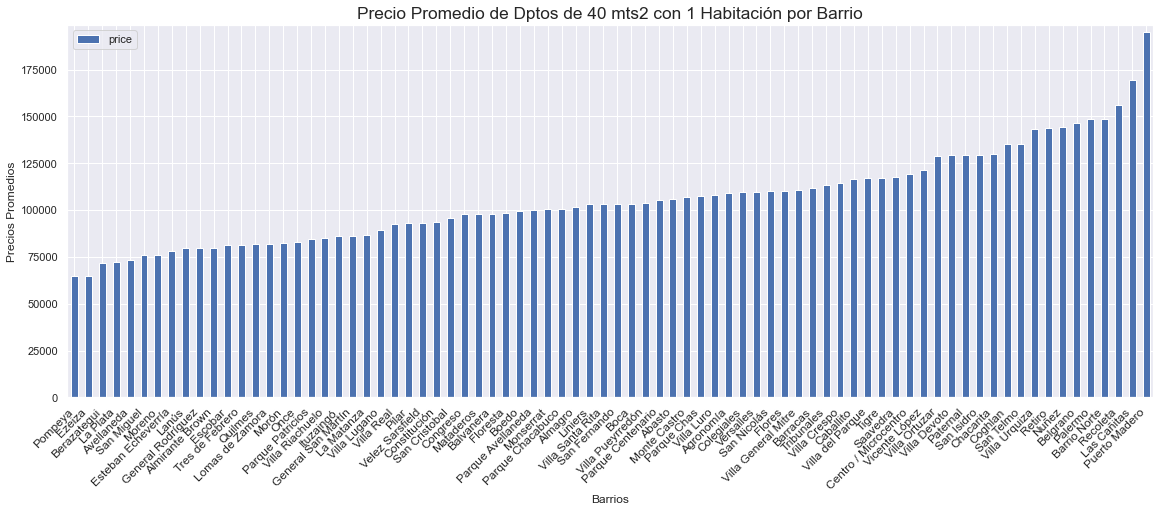

In [221]:
fig, ax = plt.subplots(figsize=(16,7), constrained_layout=True)

desafio.groupby("l3").mean().sort_values("price").plot(kind='bar', ax=ax)
plt.margins(0.02)
plt.ylabel('Precios Promedios')
plt.xlabel('Barrios')
plt.xticks(rotation= 45, fontsize= 12, horizontalalignment= 'right')
ax.set_title("Precio Promedio de Dptos de 40 mts2 con 1 Habitación por Barrio", fontsize= 'x-large')
plt.show()

Al analizar el gráfico se facilita la diferenciación de los precios promedios por barrio.

Hay una clara diferencia de cual es el barrio mas caro observado, mientras que los barrios con menor precio también reflejan una diferencia un tanto significativa frente al resto. Sin embargo, la diferencia entre los precios promedios de los restantes barrios es interesante.

Ahora bien, estos resultados pueden estar sesgados por dos motivos:

* Es probable que la muestra no sea de un tamaño que nos permita obterner respuestas contundentes. Al ser tan pocas observaciones, la media de los precios frente a cualquier valor adicional, podría variar en gran forma.
* No todos los barrios cuentan con representación con este tipo de departamentos, lo cual puede traer problemas al momentos de determinar el "barrio más accesible" o el "barrio más caro"

# Proyecto 2:

**Consigna**: Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización. ¿Qué clusters encuentras? ¿A qué pueden corresponder? Te dejamos preguntas que pueden servir como disparadoras: ¿qué barrios se parecen más entre sí?¿qué tipos de propiedades se parecen más entre sí?

In [225]:
desafio2 = dataset_clean_personal.drop(['start_date',
 'end_date',
 'created_on',
 'lat',
 'lon',
 'l1',
 'l2',
 'l3','currency',
 'title',
 'description','surface_total_log',
 'surface_covered_log',
 'price_log',
 'surface_total_norm',
 'surface_covered_norm',
 'price_norm',
 'rooms-intervalos',
 'surface_covered-intervalos',
 'surface_total-intervalos','operation_type','surface_total',
 'surface_covered'], axis=1)

In [226]:
pca = PCA(n_components=2)
X_trans2 = pca.fit_transform(desafio2.drop("property_type",axis=1))

X_trans2 = pd.DataFrame(X_trans2, index=desafio2.index)
X_trans2.shape

(117803, 2)

In [227]:
desafio2['property_type'] = desafio2['property_type'].map({"Departamento":0,"Casa":1,"PH":2})
desafio2['property_type'] 

11        0
12        0
15        0
16        0
17        0
         ..
127907    2
127908    2
130133    2
130315    2
132061    2
Name: property_type, Length: 117803, dtype: int64

In [228]:
desafio2["ID"] = np.arange(len(desafio2))
X_trans2["ID"] = np.arange(len(X_trans2))

In [229]:
columns=['property_type',"ID"]
desafio2 = desafio2[columns]
desafio2

property_type      ID
11                  0       0
12                  0       1
15                  0       2
16                  0       3
17                  0       4
...               ...     ...
127907              2  117798
127908              2  117799
130133              2  117800
130315              2  117801
132061              2  117802

[117803 rows x 2 columns]

In [230]:
X_trans2

0         1      ID
11     -25101.421392  0.999681       0
12     -59101.421390  0.689877       1
15      40898.578609  1.424690       2
16     -65101.421390  0.635206       3
17     -29101.421392  0.963233       4
...              ...       ...     ...
127907  43898.578621  0.081623  117798
127908  33898.578621 -0.009495  117799
130133  75898.578627 -0.836616  117800
130315 -92101.421389  0.404976  117801
132061 -94101.421352 -3.896393  117802

[117803 rows x 3 columns]

In [231]:
w = pd.concat([X_trans2,desafio2], axis=1)
w

0         1      ID  property_type      ID
11     -25101.421392  0.999681       0              0       0
12     -59101.421390  0.689877       1              0       1
15      40898.578609  1.424690       2              0       2
16     -65101.421390  0.635206       3              0       3
17     -29101.421392  0.963233       4              0       4
...              ...       ...     ...            ...     ...
127907  43898.578621  0.081623  117798              2  117798
127908  33898.578621 -0.009495  117799              2  117799
130133  75898.578627 -0.836616  117800              2  117800
130315 -92101.421389  0.404976  117801              2  117801
132061 -94101.421352 -3.896393  117802              2  117802

[117803 rows x 5 columns]

In [232]:
w=w.drop("ID", axis=1)

In [233]:
desafio2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117803 entries, 11 to 132061
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   property_type  117803 non-null  int64
 1   ID             117803 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 7.2 MB


In [234]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Armamos una mascara, con unos en los datos que son CORES.
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool)
    core_samples_mask_1[db_1.core_sample_indices_] = True
    # Plot result

    # Black removed and is used for noise instead.
    unique_labels = set(labels_1)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k)

        xy = X1[class_member_mask & core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X1[class_member_mask & ~core_samples_mask_1]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)
    plt.title('Estimated number of clusters: %d' % n_clusters_1)
    plt.show()
    return

In [235]:
X_d = w.drop("property_type",axis=1)
y_d = w["property_type"]
X_d

0         1
11     -25101.421392  0.999681
12     -59101.421390  0.689877
15      40898.578609  1.424690
16     -65101.421390  0.635206
17     -29101.421392  0.963233
...              ...       ...
127907  43898.578621  0.081623
127908  33898.578621 -0.009495
130133  75898.578627 -0.836616
130315 -92101.421389  0.404976
132061 -94101.421352 -3.896393

[117803 rows x 2 columns]

In [236]:
kmeans_1= KMeans(n_clusters=3, random_state=0)

kmeans_1.fit(X_d)

KMeans(n_clusters=3, random_state=0)

In [237]:
etiquetas_1 = kmeans_1.labels_
print(etiquetas_1.shape)

(117803,)


In [238]:
centros_1 = kmeans_1.cluster_centers_
print(centros_1)

[[ 1.52873310e+05  1.12335335e-01]
 [ 2.57298666e+04 -1.49639039e-01]
 [-6.62496422e+04  6.83252691e-02]]


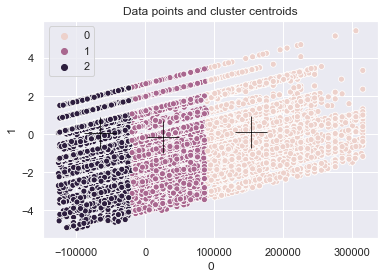

In [239]:
sns.scatterplot(X_d[0], X_d[1], hue = etiquetas_1)
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Data points and cluster centroids')
plt.show()

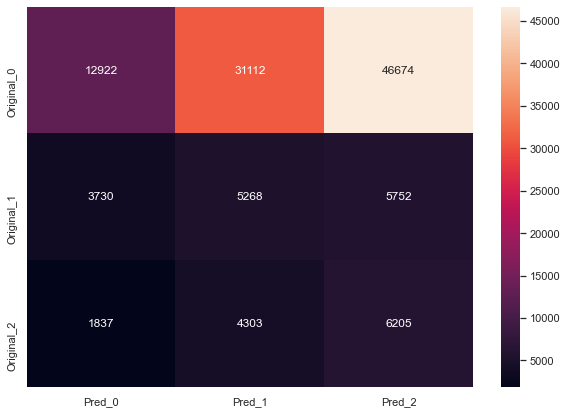

In [240]:
cm = confusion_matrix(y_d, etiquetas_1)
df_cm = pd.DataFrame(cm, index = [i for i in ['Original_0','Original_1','Original_2']],
                  columns = [i for i in ['Pred_0','Pred_1','Pred_2']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")

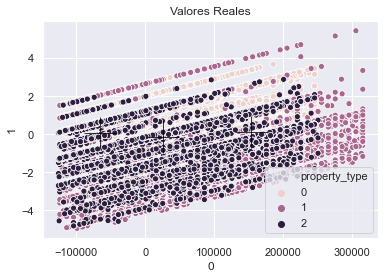

In [241]:
sns.scatterplot(w[0], w[1], hue = w["property_type"])
sns.scatterplot(centros_1[:, 0], centros_1[:, 1],color='black', marker="+", s=1000)
plt.title('Valores Reales')
plt.show()

La verdad que no encuentro grandes diferencias entre las propiedades, con lo cual se dificulta una clasificación con solo 2 componentes. Los departamentos son muy similares a los PH.

**Consigna a Rehacer luego de una primera entrega**:
    
* Luego de probar varios modelos y evaluarlos se pide ser crítico con los resultados. ¿Qué se podría hacer para mejorar?

Un modelo con error cuadrático medio de ~37.000 es un valor demasiado alto a mi parecer para implementarse en un negocio inmobiliario. 

La falta de algunas características que hacen a la diferencia de precios entre las propiedades, como las mencionadas anteriormente, pueden generar cierta desconfianza sobre el modelo desarrollado. 

Para renombrarlas aquí, son las siguientes:
* Tiene o no Terraza (caso Departamentos)
* Tiene o no Asador
* Tiene o no Pileta
* Tiene o no Quincho
* Distancia a lugares importantes como: playa, centros de las ciudades, lagos.
* Costos fijos
* Antigüedad
* Remodelado o no
* Seguridad Privada
* Calidad de pisos, paredes, terminaciones
    
Una posible mejora es realizar un binning a la variable "precio" (agrupar la variable en rangos) para estimar "rangos de precios" en lugar de estimar valores puntuales, lo cual facilitaría el trabajo de estimación al no requerir la precisión de devolver como resultado un número. Esto daría lugar a que el modelo de machine learning estime un rango posible de precios y luego que un tasador pueda establecer, de acuerdo a su expertise en el tema, un valor preciso dentro de este rango, dada la información faltante.

Una segunda posible mejora es aplicar mas adelante con herramientas de análisis de texto, lograr mayor cantidad de features que nos ayuden a reducir el error de predicción del precio de las propiedades.